# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 10 epochs - without early_stopping in FVC GT dataset NOT aligned',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl'],
        'src_files': ["src/*.py"]
    },
    'properties': {
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 68741
Process ID: 81427
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 10 '
                               'epochs - without early_stopping in FVC GT '
                               'dataset NOT aligned',
                'name': 'train_vgg16',
                'src_files': ['src/*.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f55a972ee50>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 200,
                      'learning_rate': 0.001,
                      'n_epochs': 200,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


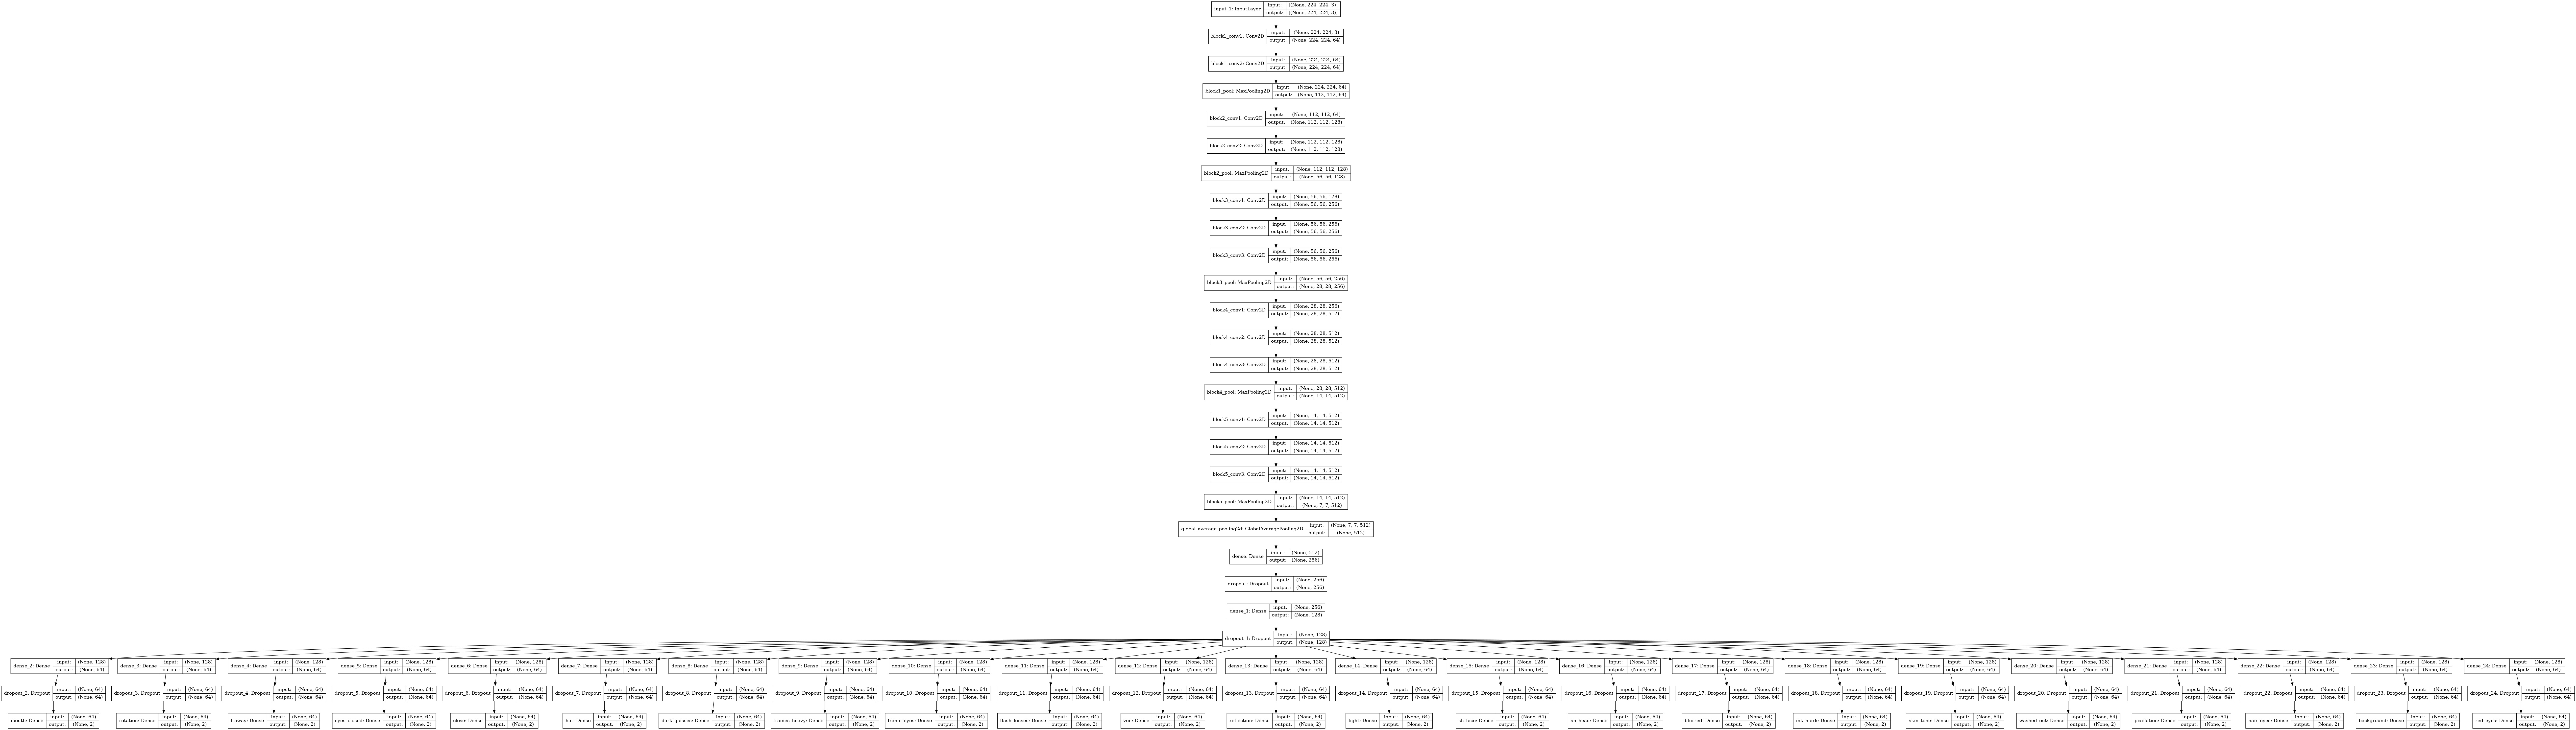

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [ ]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
Epoch 1/200
 2/77 [..............................] - ETA: 11s - loss: 1.5939 - mouth_loss: 0.6930 - rotation_loss: 0.6931 - l_away_loss: 0.6931 - eyes_closed_loss: 0.6930 - close_loss: 0.6929 - hat_loss: 0.6930 - dark_glasses_loss: 0.6929 - frames_heavy_loss: 0.6929 - frame_eyes_loss: 0.6931 - flash_lenses_loss: 0.6930 - veil_loss: 0.6929 - reflection_loss: 0.6932 - light_loss: 0.6930 - sh_face_loss: 0.6931 - sh_head_loss: 0.6931 - blurred_loss: 0.6929 - ink_mark_loss: 0.6929 - skin_tone_loss: 0.6931 - washed_out_loss: 0.6929 - pixelation_loss: 0.6929 - hair_eyes_loss: 0.6930 - background_loss: 0.6932 - red_eyes_loss: 0.6930 - mouth_accuracy: 0.3125 - rotation_accuracy: 0.3672 - l_away_accuracy: 0.3555 - eyes_closed_accuracy: 0.3008 - close_accuracy: 0.2734 - hat_accuracy: 0.3477 - dark_glasses_accuracy: 0.2969 - frames_heavy_accuracy: 0.2461 - frame_eyes_accuracy: 0.4023 - flash_lenses_accuracy: 0.3125 - veil_

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 4/77 [>.............................] - ETA: 3:04 - loss: 1.5933 - mouth_loss: 0.6929 - rotation_loss: 0.6928 - l_away_loss: 0.6929 - eyes_closed_loss: 0.6927 - close_loss: 0.6924 - hat_loss: 0.6927 - dark_glasses_loss: 0.6925 - frames_heavy_loss: 0.6924 - frame_eyes_loss: 0.6928 - flash_lenses_loss: 0.6927 - veil_loss: 0.6925 - reflection_loss: 0.6932 - light_loss: 0.6925 - sh_face_loss: 0.6930 - sh_head_loss: 0.6930 - blurred_loss: 0.6926 - ink_mark_loss: 0.6924 - skin_tone_loss: 0.6931 - washed_out_loss: 0.6924 - pixelation_loss: 0.6925 - hair_eyes_loss: 0.6927 - background_loss: 0.6931 - red_eyes_loss: 0.6927 - mouth_accuracy: 0.4229 - rotation_accuracy: 0.4759 - l_away_accuracy: 0.4645 - eyes_closed_accuracy: 0.4538 - close_accuracy: 0.4922 - hat_accuracy: 0.4922 - dark_glasses_accuracy: 0.4857 - frames_heavy_accuracy: 0.4727 - frame_eyes_accuracy: 0.5013 - flash_lenses_accuracy: 0.4616 - veil_accuracy: 0.4590 - reflection_accuracy: 0.4495 - light_accuracy: 0.5052 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 5/77 [>.............................] - ETA: 3:16 - loss: 1.5929 - mouth_loss: 0.6928 - rotation_loss: 0.6927 - l_away_loss: 0.6928 - eyes_closed_loss: 0.6926 - close_loss: 0.6922 - hat_loss: 0.6925 - dark_glasses_loss: 0.6923 - frames_heavy_loss: 0.6922 - frame_eyes_loss: 0.6927 - flash_lenses_loss: 0.6926 - veil_loss: 0.6923 - reflection_loss: 0.6932 - light_loss: 0.6923 - sh_face_loss: 0.6929 - sh_head_loss: 0.6929 - blurred_loss: 0.6924 - ink_mark_loss: 0.6921 - skin_tone_loss: 0.6931 - washed_out_loss: 0.6922 - pixelation_loss: 0.6923 - hair_eyes_loss: 0.6926 - background_loss: 0.6931 - red_eyes_loss: 0.6926 - mouth_accuracy: 0.4539 - rotation_accuracy: 0.5095 - l_away_accuracy: 0.4929 - eyes_closed_accuracy: 0.4949 - close_accuracy: 0.5538 - hat_accuracy: 0.5331 - dark_glasses_accuracy: 0.5360 - frames_heavy_accuracy: 0.5369 - frame_eyes_accuracy: 0.5310 - flash_lenses_accuracy: 0.5018 - veil_accuracy: 0.5166 - reflection_accuracy: 0.4571 - light_accuracy: 0.5560 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 7/77 [=>............................] - ETA: 3:43 - loss: 1.5923 - mouth_loss: 0.6926 - rotation_loss: 0.6924 - l_away_loss: 0.6926 - eyes_closed_loss: 0.6924 - close_loss: 0.6917 - hat_loss: 0.6922 - dark_glasses_loss: 0.6920 - frames_heavy_loss: 0.6916 - frame_eyes_loss: 0.6925 - flash_lenses_loss: 0.6923 - veil_loss: 0.6919 - reflection_loss: 0.6932 - light_loss: 0.6919 - sh_face_loss: 0.6929 - sh_head_loss: 0.6928 - blurred_loss: 0.6920 - ink_mark_loss: 0.6916 - skin_tone_loss: 0.6931 - washed_out_loss: 0.6917 - pixelation_loss: 0.6919 - hair_eyes_loss: 0.6923 - background_loss: 0.6931 - red_eyes_loss: 0.6924 - mouth_accuracy: 0.5008 - rotation_accuracy: 0.5567 - l_away_accuracy: 0.5294 - eyes_closed_accuracy: 0.5498 - close_accuracy: 0.6367 - hat_accuracy: 0.5914 - dark_glasses_accuracy: 0.6029 - frames_heavy_accuracy: 0.6233 - frame_eyes_accuracy: 0.5691 - flash_lenses_accuracy: 0.5555 - veil_accuracy: 0.5950 - reflection_accuracy: 0.4674 - light_accuracy: 0.6280 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 8/77 [==>...........................] - ETA: 3:42 - loss: 1.5920 - mouth_loss: 0.6925 - rotation_loss: 0.6923 - l_away_loss: 0.6925 - eyes_closed_loss: 0.6922 - close_loss: 0.6914 - hat_loss: 0.6920 - dark_glasses_loss: 0.6918 - frames_heavy_loss: 0.6914 - frame_eyes_loss: 0.6924 - flash_lenses_loss: 0.6922 - veil_loss: 0.6916 - reflection_loss: 0.6932 - light_loss: 0.6917 - sh_face_loss: 0.6928 - sh_head_loss: 0.6927 - blurred_loss: 0.6919 - ink_mark_loss: 0.6913 - skin_tone_loss: 0.6931 - washed_out_loss: 0.6914 - pixelation_loss: 0.6916 - hair_eyes_loss: 0.6922 - background_loss: 0.6931 - red_eyes_loss: 0.6923 - mouth_accuracy: 0.5181 - rotation_accuracy: 0.5743 - l_away_accuracy: 0.5421 - eyes_closed_accuracy: 0.5685 - close_accuracy: 0.6663 - hat_accuracy: 0.6134 - dark_glasses_accuracy: 0.6266 - frames_heavy_accuracy: 0.6540 - frame_eyes_accuracy: 0.5817 - flash_lenses_accuracy: 0.5737 - veil_accuracy: 0.6237 - reflection_accuracy: 0.4707 - light_accuracy: 0.6538 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 3:45 - loss: 1.5913 - mouth_loss: 0.6924 - rotation_loss: 0.6921 - l_away_loss: 0.6924 - eyes_closed_loss: 0.6920 - close_loss: 0.6909 - hat_loss: 0.6916 - dark_glasses_loss: 0.6914 - frames_heavy_loss: 0.6908 - frame_eyes_loss: 0.6923 - flash_lenses_loss: 0.6919 - veil_loss: 0.6912 - reflection_loss: 0.6932 - light_loss: 0.6912 - sh_face_loss: 0.6928 - sh_head_loss: 0.6926 - blurred_loss: 0.6915 - ink_mark_loss: 0.6908 - skin_tone_loss: 0.6930 - washed_out_loss: 0.6909 - pixelation_loss: 0.6912 - hair_eyes_loss: 0.6918 - background_loss: 0.6931 - red_eyes_loss: 0.6920 - mouth_accuracy: 0.5452 - rotation_accuracy: 0.5989 - l_away_accuracy: 0.5628 - eyes_closed_accuracy: 0.5980 - close_accuracy: 0.7112 - hat_accuracy: 0.6461 - dark_glasses_accuracy: 0.6626 - frames_heavy_accuracy: 0.7008 - frame_eyes_accuracy: 0.5989 - flash_lenses_accuracy: 0.6018 - veil_accuracy: 0.6667 - reflection_accuracy: 0.4767 - light_accuracy: 0.6921 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


11/77 [===>..........................] - ETA: 3:46 - loss: 1.5909 - mouth_loss: 0.6923 - rotation_loss: 0.6920 - l_away_loss: 0.6923 - eyes_closed_loss: 0.6918 - close_loss: 0.6906 - hat_loss: 0.6914 - dark_glasses_loss: 0.6912 - frames_heavy_loss: 0.6906 - frame_eyes_loss: 0.6922 - flash_lenses_loss: 0.6918 - veil_loss: 0.6909 - reflection_loss: 0.6932 - light_loss: 0.6910 - sh_face_loss: 0.6927 - sh_head_loss: 0.6925 - blurred_loss: 0.6913 - ink_mark_loss: 0.6905 - skin_tone_loss: 0.6930 - washed_out_loss: 0.6906 - pixelation_loss: 0.6909 - hair_eyes_loss: 0.6917 - background_loss: 0.6931 - red_eyes_loss: 0.6919 - mouth_accuracy: 0.5559 - rotation_accuracy: 0.6080 - l_away_accuracy: 0.5706 - eyes_closed_accuracy: 0.6098 - close_accuracy: 0.7288 - hat_accuracy: 0.6595 - dark_glasses_accuracy: 0.6769 - frames_heavy_accuracy: 0.7192 - frame_eyes_accuracy: 0.6056 - flash_lenses_accuracy: 0.6135 - veil_accuracy: 0.6835 - reflection_accuracy: 0.4796 - light_accuracy: 0.7074 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


12/77 [===>..........................] - ETA: 3:44 - loss: 1.5905 - mouth_loss: 0.6921 - rotation_loss: 0.6918 - l_away_loss: 0.6921 - eyes_closed_loss: 0.6917 - close_loss: 0.6903 - hat_loss: 0.6912 - dark_glasses_loss: 0.6909 - frames_heavy_loss: 0.6902 - frame_eyes_loss: 0.6921 - flash_lenses_loss: 0.6916 - veil_loss: 0.6907 - reflection_loss: 0.6932 - light_loss: 0.6908 - sh_face_loss: 0.6927 - sh_head_loss: 0.6924 - blurred_loss: 0.6911 - ink_mark_loss: 0.6902 - skin_tone_loss: 0.6930 - washed_out_loss: 0.6903 - pixelation_loss: 0.6907 - hair_eyes_loss: 0.6915 - background_loss: 0.6931 - red_eyes_loss: 0.6917 - mouth_accuracy: 0.5658 - rotation_accuracy: 0.6163 - l_away_accuracy: 0.5782 - eyes_closed_accuracy: 0.6205 - close_accuracy: 0.7441 - hat_accuracy: 0.6711 - dark_glasses_accuracy: 0.6893 - frames_heavy_accuracy: 0.7352 - frame_eyes_accuracy: 0.6119 - flash_lenses_accuracy: 0.6231 - veil_accuracy: 0.6979 - reflection_accuracy: 0.4820 - light_accuracy: 0.7206 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


14/77 [====>.........................] - ETA: 3:39 - loss: 1.5896 - mouth_loss: 0.6919 - rotation_loss: 0.6915 - l_away_loss: 0.6919 - eyes_closed_loss: 0.6913 - close_loss: 0.6896 - hat_loss: 0.6907 - dark_glasses_loss: 0.6904 - frames_heavy_loss: 0.6895 - frame_eyes_loss: 0.6919 - flash_lenses_loss: 0.6913 - veil_loss: 0.6901 - reflection_loss: 0.6932 - light_loss: 0.6902 - sh_face_loss: 0.6926 - sh_head_loss: 0.6923 - blurred_loss: 0.6906 - ink_mark_loss: 0.6894 - skin_tone_loss: 0.6930 - washed_out_loss: 0.6896 - pixelation_loss: 0.6900 - hair_eyes_loss: 0.6911 - background_loss: 0.6931 - red_eyes_loss: 0.6914 - mouth_accuracy: 0.5818 - rotation_accuracy: 0.6306 - l_away_accuracy: 0.5908 - eyes_closed_accuracy: 0.6379 - close_accuracy: 0.7693 - hat_accuracy: 0.6906 - dark_glasses_accuracy: 0.7095 - frames_heavy_accuracy: 0.7618 - frame_eyes_accuracy: 0.6218 - flash_lenses_accuracy: 0.6389 - veil_accuracy: 0.7213 - reflection_accuracy: 0.4852 - light_accuracy: 0.7426 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


15/77 [====>.........................] - ETA: 3:36 - loss: 1.5891 - mouth_loss: 0.6917 - rotation_loss: 0.6913 - l_away_loss: 0.6917 - eyes_closed_loss: 0.6911 - close_loss: 0.6891 - hat_loss: 0.6904 - dark_glasses_loss: 0.6901 - frames_heavy_loss: 0.6891 - frame_eyes_loss: 0.6917 - flash_lenses_loss: 0.6911 - veil_loss: 0.6897 - reflection_loss: 0.6931 - light_loss: 0.6898 - sh_face_loss: 0.6925 - sh_head_loss: 0.6922 - blurred_loss: 0.6902 - ink_mark_loss: 0.6890 - skin_tone_loss: 0.6929 - washed_out_loss: 0.6891 - pixelation_loss: 0.6897 - hair_eyes_loss: 0.6908 - background_loss: 0.6930 - red_eyes_loss: 0.6911 - mouth_accuracy: 0.5884 - rotation_accuracy: 0.6371 - l_away_accuracy: 0.5962 - eyes_closed_accuracy: 0.6452 - close_accuracy: 0.7799 - hat_accuracy: 0.6986 - dark_glasses_accuracy: 0.7178 - frames_heavy_accuracy: 0.7729 - frame_eyes_accuracy: 0.6259 - flash_lenses_accuracy: 0.6452 - veil_accuracy: 0.7313 - reflection_accuracy: 0.4865 - light_accuracy: 0.7519 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


17/77 [=====>........................] - ETA: 3:32 - loss: 1.5876 - mouth_loss: 0.6913 - rotation_loss: 0.6907 - l_away_loss: 0.6913 - eyes_closed_loss: 0.6904 - close_loss: 0.6880 - hat_loss: 0.6896 - dark_glasses_loss: 0.6892 - frames_heavy_loss: 0.6879 - frame_eyes_loss: 0.6913 - flash_lenses_loss: 0.6906 - veil_loss: 0.6888 - reflection_loss: 0.6931 - light_loss: 0.6888 - sh_face_loss: 0.6925 - sh_head_loss: 0.6920 - blurred_loss: 0.6894 - ink_mark_loss: 0.6878 - skin_tone_loss: 0.6929 - washed_out_loss: 0.6880 - pixelation_loss: 0.6887 - hair_eyes_loss: 0.6901 - background_loss: 0.6930 - red_eyes_loss: 0.6905 - mouth_accuracy: 0.5999 - rotation_accuracy: 0.6480 - l_away_accuracy: 0.6057 - eyes_closed_accuracy: 0.6580 - close_accuracy: 0.7979 - hat_accuracy: 0.7123 - dark_glasses_accuracy: 0.7322 - frames_heavy_accuracy: 0.7920 - frame_eyes_accuracy: 0.6326 - flash_lenses_accuracy: 0.6557 - veil_accuracy: 0.7479 - reflection_accuracy: 0.4884 - light_accuracy: 0.7674 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


18/77 [======>.......................] - ETA: 3:30 - loss: 1.5867 - mouth_loss: 0.6911 - rotation_loss: 0.6904 - l_away_loss: 0.6910 - eyes_closed_loss: 0.6900 - close_loss: 0.6873 - hat_loss: 0.6891 - dark_glasses_loss: 0.6886 - frames_heavy_loss: 0.6871 - frame_eyes_loss: 0.6911 - flash_lenses_loss: 0.6902 - veil_loss: 0.6883 - reflection_loss: 0.6931 - light_loss: 0.6882 - sh_face_loss: 0.6924 - sh_head_loss: 0.6918 - blurred_loss: 0.6888 - ink_mark_loss: 0.6870 - skin_tone_loss: 0.6929 - washed_out_loss: 0.6873 - pixelation_loss: 0.6880 - hair_eyes_loss: 0.6897 - background_loss: 0.6930 - red_eyes_loss: 0.6901 - mouth_accuracy: 0.6049 - rotation_accuracy: 0.6527 - l_away_accuracy: 0.6101 - eyes_closed_accuracy: 0.6637 - close_accuracy: 0.8056 - hat_accuracy: 0.7181 - dark_glasses_accuracy: 0.7384 - frames_heavy_accuracy: 0.8002 - frame_eyes_accuracy: 0.6354 - flash_lenses_accuracy: 0.6604 - veil_accuracy: 0.7550 - reflection_accuracy: 0.4894 - light_accuracy: 0.7741 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


19/77 [======>.......................] - ETA: 3:28 - loss: 1.5855 - mouth_loss: 0.6908 - rotation_loss: 0.6899 - l_away_loss: 0.6906 - eyes_closed_loss: 0.6895 - close_loss: 0.6864 - hat_loss: 0.6885 - dark_glasses_loss: 0.6880 - frames_heavy_loss: 0.6862 - frame_eyes_loss: 0.6908 - flash_lenses_loss: 0.6897 - veil_loss: 0.6875 - reflection_loss: 0.6931 - light_loss: 0.6875 - sh_face_loss: 0.6923 - sh_head_loss: 0.6916 - blurred_loss: 0.6881 - ink_mark_loss: 0.6861 - skin_tone_loss: 0.6929 - washed_out_loss: 0.6864 - pixelation_loss: 0.6872 - hair_eyes_loss: 0.6892 - background_loss: 0.6930 - red_eyes_loss: 0.6896 - mouth_accuracy: 0.6094 - rotation_accuracy: 0.6571 - l_away_accuracy: 0.6142 - eyes_closed_accuracy: 0.6689 - close_accuracy: 0.8127 - hat_accuracy: 0.7235 - dark_glasses_accuracy: 0.7441 - frames_heavy_accuracy: 0.8078 - frame_eyes_accuracy: 0.6382 - flash_lenses_accuracy: 0.6648 - veil_accuracy: 0.7616 - reflection_accuracy: 0.4904 - light_accuracy: 0.7800 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


21/77 [=======>......................] - ETA: 3:24 - loss: 1.5824 - mouth_loss: 0.6899 - rotation_loss: 0.6889 - l_away_loss: 0.6898 - eyes_closed_loss: 0.6881 - close_loss: 0.6840 - hat_loss: 0.6869 - dark_glasses_loss: 0.6860 - frames_heavy_loss: 0.6837 - frame_eyes_loss: 0.6899 - flash_lenses_loss: 0.6884 - veil_loss: 0.6855 - reflection_loss: 0.6931 - light_loss: 0.6856 - sh_face_loss: 0.6921 - sh_head_loss: 0.6913 - blurred_loss: 0.6863 - ink_mark_loss: 0.6836 - skin_tone_loss: 0.6928 - washed_out_loss: 0.6839 - pixelation_loss: 0.6852 - hair_eyes_loss: 0.6879 - background_loss: 0.6930 - red_eyes_loss: 0.6883 - mouth_accuracy: 0.6172 - rotation_accuracy: 0.6645 - l_away_accuracy: 0.6212 - eyes_closed_accuracy: 0.6781 - close_accuracy: 0.8252 - hat_accuracy: 0.7329 - dark_glasses_accuracy: 0.7544 - frames_heavy_accuracy: 0.8211 - frame_eyes_accuracy: 0.6430 - flash_lenses_accuracy: 0.6728 - veil_accuracy: 0.7732 - reflection_accuracy: 0.4922 - light_accuracy: 0.7903 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


22/77 [=======>......................] - ETA: 3:21 - loss: 1.5804 - mouth_loss: 0.6894 - rotation_loss: 0.6882 - l_away_loss: 0.6893 - eyes_closed_loss: 0.6872 - close_loss: 0.6824 - hat_loss: 0.6858 - dark_glasses_loss: 0.6848 - frames_heavy_loss: 0.6820 - frame_eyes_loss: 0.6894 - flash_lenses_loss: 0.6875 - veil_loss: 0.6842 - reflection_loss: 0.6931 - light_loss: 0.6842 - sh_face_loss: 0.6920 - sh_head_loss: 0.6911 - blurred_loss: 0.6852 - ink_mark_loss: 0.6820 - skin_tone_loss: 0.6928 - washed_out_loss: 0.6823 - pixelation_loss: 0.6839 - hair_eyes_loss: 0.6869 - background_loss: 0.6930 - red_eyes_loss: 0.6874 - mouth_accuracy: 0.6209 - rotation_accuracy: 0.6676 - l_away_accuracy: 0.6241 - eyes_closed_accuracy: 0.6822 - close_accuracy: 0.8308 - hat_accuracy: 0.7371 - dark_glasses_accuracy: 0.7590 - frames_heavy_accuracy: 0.8270 - frame_eyes_accuracy: 0.6451 - flash_lenses_accuracy: 0.6765 - veil_accuracy: 0.7784 - reflection_accuracy: 0.4930 - light_accuracy: 0.7949 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


23/77 [=======>......................] - ETA: 3:18 - loss: 1.5781 - mouth_loss: 0.6888 - rotation_loss: 0.6873 - l_away_loss: 0.6888 - eyes_closed_loss: 0.6862 - close_loss: 0.6806 - hat_loss: 0.6847 - dark_glasses_loss: 0.6834 - frames_heavy_loss: 0.6801 - frame_eyes_loss: 0.6889 - flash_lenses_loss: 0.6865 - veil_loss: 0.6826 - reflection_loss: 0.6931 - light_loss: 0.6826 - sh_face_loss: 0.6919 - sh_head_loss: 0.6909 - blurred_loss: 0.6838 - ink_mark_loss: 0.6800 - skin_tone_loss: 0.6927 - washed_out_loss: 0.6804 - pixelation_loss: 0.6824 - hair_eyes_loss: 0.6858 - background_loss: 0.6930 - red_eyes_loss: 0.6865 - mouth_accuracy: 0.6241 - rotation_accuracy: 0.6706 - l_away_accuracy: 0.6267 - eyes_closed_accuracy: 0.6859 - close_accuracy: 0.8359 - hat_accuracy: 0.7409 - dark_glasses_accuracy: 0.7632 - frames_heavy_accuracy: 0.8325 - frame_eyes_accuracy: 0.6469 - flash_lenses_accuracy: 0.6800 - veil_accuracy: 0.7833 - reflection_accuracy: 0.4940 - light_accuracy: 0.7992 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


25/77 [========>.....................] - ETA: 3:12 - loss: 1.5724 - mouth_loss: 0.6874 - rotation_loss: 0.6854 - l_away_loss: 0.6879 - eyes_closed_loss: 0.6840 - close_loss: 0.6758 - hat_loss: 0.6816 - dark_glasses_loss: 0.6798 - frames_heavy_loss: 0.6751 - frame_eyes_loss: 0.6875 - flash_lenses_loss: 0.6838 - veil_loss: 0.6784 - reflection_loss: 0.6931 - light_loss: 0.6787 - sh_face_loss: 0.6916 - sh_head_loss: 0.6906 - blurred_loss: 0.6808 - ink_mark_loss: 0.6751 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6755 - pixelation_loss: 0.6786 - hair_eyes_loss: 0.6834 - background_loss: 0.6929 - red_eyes_loss: 0.6843 - mouth_accuracy: 0.6301 - rotation_accuracy: 0.6759 - l_away_accuracy: 0.6310 - eyes_closed_accuracy: 0.6924 - close_accuracy: 0.8452 - hat_accuracy: 0.7478 - dark_glasses_accuracy: 0.7708 - frames_heavy_accuracy: 0.8423 - frame_eyes_accuracy: 0.6503 - flash_lenses_accuracy: 0.6866 - veil_accuracy: 0.7923 - reflection_accuracy: 0.4960 - light_accuracy: 0.8067 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


26/77 [=========>....................] - ETA: 3:09 - loss: 1.5689 - mouth_loss: 0.6863 - rotation_loss: 0.6845 - l_away_loss: 0.6874 - eyes_closed_loss: 0.6827 - close_loss: 0.6728 - hat_loss: 0.6800 - dark_glasses_loss: 0.6776 - frames_heavy_loss: 0.6720 - frame_eyes_loss: 0.6868 - flash_lenses_loss: 0.6821 - veil_loss: 0.6759 - reflection_loss: 0.6931 - light_loss: 0.6763 - sh_face_loss: 0.6915 - sh_head_loss: 0.6904 - blurred_loss: 0.6790 - ink_mark_loss: 0.6720 - skin_tone_loss: 0.6925 - washed_out_loss: 0.6725 - pixelation_loss: 0.6761 - hair_eyes_loss: 0.6820 - background_loss: 0.6929 - red_eyes_loss: 0.6831 - mouth_accuracy: 0.6330 - rotation_accuracy: 0.6781 - l_away_accuracy: 0.6330 - eyes_closed_accuracy: 0.6954 - close_accuracy: 0.8494 - hat_accuracy: 0.7509 - dark_glasses_accuracy: 0.7743 - frames_heavy_accuracy: 0.8468 - frame_eyes_accuracy: 0.6519 - flash_lenses_accuracy: 0.6896 - veil_accuracy: 0.7964 - reflection_accuracy: 0.4969 - light_accuracy: 0.8101 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


27/77 [=========>....................] - ETA: 3:06 - loss: 1.5652 - mouth_loss: 0.6854 - rotation_loss: 0.6835 - l_away_loss: 0.6869 - eyes_closed_loss: 0.6814 - close_loss: 0.6693 - hat_loss: 0.6778 - dark_glasses_loss: 0.6753 - frames_heavy_loss: 0.6685 - frame_eyes_loss: 0.6861 - flash_lenses_loss: 0.6805 - veil_loss: 0.6732 - reflection_loss: 0.6931 - light_loss: 0.6735 - sh_face_loss: 0.6914 - sh_head_loss: 0.6903 - blurred_loss: 0.6770 - ink_mark_loss: 0.6685 - skin_tone_loss: 0.6925 - washed_out_loss: 0.6690 - pixelation_loss: 0.6735 - hair_eyes_loss: 0.6804 - background_loss: 0.6929 - red_eyes_loss: 0.6820 - mouth_accuracy: 0.6357 - rotation_accuracy: 0.6803 - l_away_accuracy: 0.6347 - eyes_closed_accuracy: 0.6980 - close_accuracy: 0.8533 - hat_accuracy: 0.7539 - dark_glasses_accuracy: 0.7775 - frames_heavy_accuracy: 0.8510 - frame_eyes_accuracy: 0.6533 - flash_lenses_accuracy: 0.6925 - veil_accuracy: 0.8003 - reflection_accuracy: 0.4978 - light_accuracy: 0.8133 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


29/77 [==========>...................] - ETA: 3:01 - loss: 1.5571 - mouth_loss: 0.6833 - rotation_loss: 0.6815 - l_away_loss: 0.6864 - eyes_closed_loss: 0.6789 - close_loss: 0.6616 - hat_loss: 0.6733 - dark_glasses_loss: 0.6703 - frames_heavy_loss: 0.6605 - frame_eyes_loss: 0.6849 - flash_lenses_loss: 0.6776 - veil_loss: 0.6668 - reflection_loss: 0.6931 - light_loss: 0.6678 - sh_face_loss: 0.6912 - sh_head_loss: 0.6902 - blurred_loss: 0.6723 - ink_mark_loss: 0.6604 - skin_tone_loss: 0.6925 - washed_out_loss: 0.6610 - pixelation_loss: 0.6672 - hair_eyes_loss: 0.6772 - background_loss: 0.6929 - red_eyes_loss: 0.6797 - mouth_accuracy: 0.6411 - rotation_accuracy: 0.6841 - l_away_accuracy: 0.6376 - eyes_closed_accuracy: 0.7028 - close_accuracy: 0.8605 - hat_accuracy: 0.7595 - dark_glasses_accuracy: 0.7833 - frames_heavy_accuracy: 0.8586 - frame_eyes_accuracy: 0.6560 - flash_lenses_accuracy: 0.6977 - veil_accuracy: 0.8075 - reflection_accuracy: 0.4990 - light_accuracy: 0.8190 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


30/77 [==========>...................] - ETA: 2:56 - loss: 1.5527 - mouth_loss: 0.6824 - rotation_loss: 0.6807 - l_away_loss: 0.6861 - eyes_closed_loss: 0.6776 - close_loss: 0.6573 - hat_loss: 0.6710 - dark_glasses_loss: 0.6678 - frames_heavy_loss: 0.6561 - frame_eyes_loss: 0.6842 - flash_lenses_loss: 0.6762 - veil_loss: 0.6633 - reflection_loss: 0.6931 - light_loss: 0.6648 - sh_face_loss: 0.6910 - sh_head_loss: 0.6900 - blurred_loss: 0.6697 - ink_mark_loss: 0.6559 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6565 - pixelation_loss: 0.6641 - hair_eyes_loss: 0.6755 - background_loss: 0.6928 - red_eyes_loss: 0.6784 - mouth_accuracy: 0.6436 - rotation_accuracy: 0.6858 - l_away_accuracy: 0.6389 - eyes_closed_accuracy: 0.7051 - close_accuracy: 0.8638 - hat_accuracy: 0.7621 - dark_glasses_accuracy: 0.7860 - frames_heavy_accuracy: 0.8620 - frame_eyes_accuracy: 0.6573 - flash_lenses_accuracy: 0.7001 - veil_accuracy: 0.8108 - reflection_accuracy: 0.4994 - light_accuracy: 0.8217 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


31/77 [===========>..................] - ETA: 2:54 - loss: 1.5483 - mouth_loss: 0.6815 - rotation_loss: 0.6800 - l_away_loss: 0.6859 - eyes_closed_loss: 0.6763 - close_loss: 0.6528 - hat_loss: 0.6688 - dark_glasses_loss: 0.6654 - frames_heavy_loss: 0.6515 - frame_eyes_loss: 0.6836 - flash_lenses_loss: 0.6745 - veil_loss: 0.6598 - reflection_loss: 0.6931 - light_loss: 0.6619 - sh_face_loss: 0.6909 - sh_head_loss: 0.6899 - blurred_loss: 0.6670 - ink_mark_loss: 0.6512 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6519 - pixelation_loss: 0.6608 - hair_eyes_loss: 0.6738 - background_loss: 0.6928 - red_eyes_loss: 0.6772 - mouth_accuracy: 0.6460 - rotation_accuracy: 0.6874 - l_away_accuracy: 0.6401 - eyes_closed_accuracy: 0.7072 - close_accuracy: 0.8669 - hat_accuracy: 0.7646 - dark_glasses_accuracy: 0.7886 - frames_heavy_accuracy: 0.8653 - frame_eyes_accuracy: 0.6584 - flash_lenses_accuracy: 0.7025 - veil_accuracy: 0.8140 - reflection_accuracy: 0.4999 - light_accuracy: 0.8241 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


33/77 [===========>..................] - ETA: 2:47 - loss: 1.5393 - mouth_loss: 0.6797 - rotation_loss: 0.6785 - l_away_loss: 0.6857 - eyes_closed_loss: 0.6738 - close_loss: 0.6433 - hat_loss: 0.6643 - dark_glasses_loss: 0.6605 - frames_heavy_loss: 0.6417 - frame_eyes_loss: 0.6825 - flash_lenses_loss: 0.6715 - veil_loss: 0.6531 - reflection_loss: 0.6931 - light_loss: 0.6559 - sh_face_loss: 0.6906 - sh_head_loss: 0.6897 - blurred_loss: 0.6616 - ink_mark_loss: 0.6412 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6420 - pixelation_loss: 0.6537 - hair_eyes_loss: 0.6705 - background_loss: 0.6928 - red_eyes_loss: 0.6748 - mouth_accuracy: 0.6506 - rotation_accuracy: 0.6903 - l_away_accuracy: 0.6422 - eyes_closed_accuracy: 0.7111 - close_accuracy: 0.8727 - hat_accuracy: 0.7692 - dark_glasses_accuracy: 0.7932 - frames_heavy_accuracy: 0.8714 - frame_eyes_accuracy: 0.6606 - flash_lenses_accuracy: 0.7070 - veil_accuracy: 0.8198 - reflection_accuracy: 0.5009 - light_accuracy: 0.8286 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


34/77 [============>.................] - ETA: 2:43 - loss: 1.5347 - mouth_loss: 0.6786 - rotation_loss: 0.6776 - l_away_loss: 0.6855 - eyes_closed_loss: 0.6726 - close_loss: 0.6383 - hat_loss: 0.6619 - dark_glasses_loss: 0.6581 - frames_heavy_loss: 0.6366 - frame_eyes_loss: 0.6820 - flash_lenses_loss: 0.6699 - veil_loss: 0.6498 - reflection_loss: 0.6931 - light_loss: 0.6530 - sh_face_loss: 0.6904 - sh_head_loss: 0.6895 - blurred_loss: 0.6589 - ink_mark_loss: 0.6361 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6369 - pixelation_loss: 0.6500 - hair_eyes_loss: 0.6689 - background_loss: 0.6927 - red_eyes_loss: 0.6735 - mouth_accuracy: 0.6528 - rotation_accuracy: 0.6917 - l_away_accuracy: 0.6432 - eyes_closed_accuracy: 0.7129 - close_accuracy: 0.8754 - hat_accuracy: 0.7713 - dark_glasses_accuracy: 0.7953 - frames_heavy_accuracy: 0.8742 - frame_eyes_accuracy: 0.6615 - flash_lenses_accuracy: 0.7090 - veil_accuracy: 0.8225 - reflection_accuracy: 0.5015 - light_accuracy: 0.8307 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


35/77 [============>.................] - ETA: 2:39 - loss: 1.5300 - mouth_loss: 0.6777 - rotation_loss: 0.6766 - l_away_loss: 0.6852 - eyes_closed_loss: 0.6712 - close_loss: 0.6334 - hat_loss: 0.6596 - dark_glasses_loss: 0.6556 - frames_heavy_loss: 0.6314 - frame_eyes_loss: 0.6814 - flash_lenses_loss: 0.6684 - veil_loss: 0.6465 - reflection_loss: 0.6931 - light_loss: 0.6500 - sh_face_loss: 0.6903 - sh_head_loss: 0.6894 - blurred_loss: 0.6563 - ink_mark_loss: 0.6308 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6317 - pixelation_loss: 0.6464 - hair_eyes_loss: 0.6671 - background_loss: 0.6927 - red_eyes_loss: 0.6722 - mouth_accuracy: 0.6549 - rotation_accuracy: 0.6930 - l_away_accuracy: 0.6442 - eyes_closed_accuracy: 0.7147 - close_accuracy: 0.8779 - hat_accuracy: 0.7734 - dark_glasses_accuracy: 0.7974 - frames_heavy_accuracy: 0.8769 - frame_eyes_accuracy: 0.6624 - flash_lenses_accuracy: 0.7110 - veil_accuracy: 0.8250 - reflection_accuracy: 0.5021 - light_accuracy: 0.8327 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


37/77 [=============>................] - ETA: 2:32 - loss: 1.5206 - mouth_loss: 0.6762 - rotation_loss: 0.6746 - l_away_loss: 0.6845 - eyes_closed_loss: 0.6684 - close_loss: 0.6233 - hat_loss: 0.6550 - dark_glasses_loss: 0.6505 - frames_heavy_loss: 0.6209 - frame_eyes_loss: 0.6801 - flash_lenses_loss: 0.6655 - veil_loss: 0.6404 - reflection_loss: 0.6931 - light_loss: 0.6438 - sh_face_loss: 0.6899 - sh_head_loss: 0.6890 - blurred_loss: 0.6512 - ink_mark_loss: 0.6203 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6212 - pixelation_loss: 0.6395 - hair_eyes_loss: 0.6636 - background_loss: 0.6927 - red_eyes_loss: 0.6695 - mouth_accuracy: 0.6585 - rotation_accuracy: 0.6956 - l_away_accuracy: 0.6460 - eyes_closed_accuracy: 0.7180 - close_accuracy: 0.8826 - hat_accuracy: 0.7772 - dark_glasses_accuracy: 0.8013 - frames_heavy_accuracy: 0.8819 - frame_eyes_accuracy: 0.6644 - flash_lenses_accuracy: 0.7146 - veil_accuracy: 0.8297 - reflection_accuracy: 0.5032 - light_accuracy: 0.8364 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


38/77 [=============>................] - ETA: 2:28 - loss: 1.5159 - mouth_loss: 0.6755 - rotation_loss: 0.6736 - l_away_loss: 0.6841 - eyes_closed_loss: 0.6669 - close_loss: 0.6182 - hat_loss: 0.6527 - dark_glasses_loss: 0.6479 - frames_heavy_loss: 0.6157 - frame_eyes_loss: 0.6794 - flash_lenses_loss: 0.6639 - veil_loss: 0.6374 - reflection_loss: 0.6931 - light_loss: 0.6406 - sh_face_loss: 0.6898 - sh_head_loss: 0.6888 - blurred_loss: 0.6487 - ink_mark_loss: 0.6149 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6159 - pixelation_loss: 0.6363 - hair_eyes_loss: 0.6619 - background_loss: 0.6927 - red_eyes_loss: 0.6680 - mouth_accuracy: 0.6600 - rotation_accuracy: 0.6968 - l_away_accuracy: 0.6470 - eyes_closed_accuracy: 0.7196 - close_accuracy: 0.8849 - hat_accuracy: 0.7790 - dark_glasses_accuracy: 0.8031 - frames_heavy_accuracy: 0.8842 - frame_eyes_accuracy: 0.6654 - flash_lenses_accuracy: 0.7163 - veil_accuracy: 0.8318 - reflection_accuracy: 0.5037 - light_accuracy: 0.8382 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


40/77 [==============>...............] - ETA: 2:21 - loss: 1.5066 - mouth_loss: 0.6743 - rotation_loss: 0.6714 - l_away_loss: 0.6832 - eyes_closed_loss: 0.6640 - close_loss: 0.6083 - hat_loss: 0.6483 - dark_glasses_loss: 0.6427 - frames_heavy_loss: 0.6053 - frame_eyes_loss: 0.6779 - flash_lenses_loss: 0.6607 - veil_loss: 0.6318 - reflection_loss: 0.6931 - light_loss: 0.6345 - sh_face_loss: 0.6895 - sh_head_loss: 0.6885 - blurred_loss: 0.6436 - ink_mark_loss: 0.6043 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6056 - pixelation_loss: 0.6299 - hair_eyes_loss: 0.6586 - background_loss: 0.6927 - red_eyes_loss: 0.6652 - mouth_accuracy: 0.6630 - rotation_accuracy: 0.6992 - l_away_accuracy: 0.6486 - eyes_closed_accuracy: 0.7227 - close_accuracy: 0.8890 - hat_accuracy: 0.7823 - dark_glasses_accuracy: 0.8065 - frames_heavy_accuracy: 0.8885 - frame_eyes_accuracy: 0.6672 - flash_lenses_accuracy: 0.7196 - veil_accuracy: 0.8358 - reflection_accuracy: 0.5044 - light_accuracy: 0.8414 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


41/77 [==============>...............] - ETA: 2:17 - loss: 1.5020 - mouth_loss: 0.6737 - rotation_loss: 0.6704 - l_away_loss: 0.6828 - eyes_closed_loss: 0.6626 - close_loss: 0.6034 - hat_loss: 0.6460 - dark_glasses_loss: 0.6401 - frames_heavy_loss: 0.6001 - frame_eyes_loss: 0.6772 - flash_lenses_loss: 0.6592 - veil_loss: 0.6290 - reflection_loss: 0.6931 - light_loss: 0.6317 - sh_face_loss: 0.6894 - sh_head_loss: 0.6883 - blurred_loss: 0.6412 - ink_mark_loss: 0.5990 - skin_tone_loss: 0.6926 - washed_out_loss: 0.6005 - pixelation_loss: 0.6267 - hair_eyes_loss: 0.6569 - background_loss: 0.6926 - red_eyes_loss: 0.6638 - mouth_accuracy: 0.6643 - rotation_accuracy: 0.7003 - l_away_accuracy: 0.6494 - eyes_closed_accuracy: 0.7240 - close_accuracy: 0.8909 - hat_accuracy: 0.7839 - dark_glasses_accuracy: 0.8081 - frames_heavy_accuracy: 0.8906 - frame_eyes_accuracy: 0.6680 - flash_lenses_accuracy: 0.7211 - veil_accuracy: 0.8376 - reflection_accuracy: 0.5048 - light_accuracy: 0.8428 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


43/77 [===============>..............] - ETA: 2:09 - loss: 1.4931 - mouth_loss: 0.6725 - rotation_loss: 0.6684 - l_away_loss: 0.6820 - eyes_closed_loss: 0.6598 - close_loss: 0.5936 - hat_loss: 0.6418 - dark_glasses_loss: 0.6352 - frames_heavy_loss: 0.5899 - frame_eyes_loss: 0.6759 - flash_lenses_loss: 0.6563 - veil_loss: 0.6233 - reflection_loss: 0.6931 - light_loss: 0.6261 - sh_face_loss: 0.6892 - sh_head_loss: 0.6879 - blurred_loss: 0.6364 - ink_mark_loss: 0.5886 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5903 - pixelation_loss: 0.6205 - hair_eyes_loss: 0.6536 - background_loss: 0.6926 - red_eyes_loss: 0.6611 - mouth_accuracy: 0.6670 - rotation_accuracy: 0.7023 - l_away_accuracy: 0.6510 - eyes_closed_accuracy: 0.7267 - close_accuracy: 0.8946 - hat_accuracy: 0.7868 - dark_glasses_accuracy: 0.8110 - frames_heavy_accuracy: 0.8944 - frame_eyes_accuracy: 0.6697 - flash_lenses_accuracy: 0.7239 - veil_accuracy: 0.8411 - reflection_accuracy: 0.5054 - light_accuracy: 0.8454 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


44/77 [================>.............] - ETA: 2:06 - loss: 1.4886 - mouth_loss: 0.6719 - rotation_loss: 0.6674 - l_away_loss: 0.6815 - eyes_closed_loss: 0.6584 - close_loss: 0.5888 - hat_loss: 0.6397 - dark_glasses_loss: 0.6328 - frames_heavy_loss: 0.5849 - frame_eyes_loss: 0.6752 - flash_lenses_loss: 0.6549 - veil_loss: 0.6205 - reflection_loss: 0.6931 - light_loss: 0.6234 - sh_face_loss: 0.6891 - sh_head_loss: 0.6877 - blurred_loss: 0.6340 - ink_mark_loss: 0.5834 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5852 - pixelation_loss: 0.6174 - hair_eyes_loss: 0.6519 - background_loss: 0.6926 - red_eyes_loss: 0.6598 - mouth_accuracy: 0.6683 - rotation_accuracy: 0.7033 - l_away_accuracy: 0.6517 - eyes_closed_accuracy: 0.7279 - close_accuracy: 0.8963 - hat_accuracy: 0.7881 - dark_glasses_accuracy: 0.8124 - frames_heavy_accuracy: 0.8962 - frame_eyes_accuracy: 0.6704 - flash_lenses_accuracy: 0.7252 - veil_accuracy: 0.8428 - reflection_accuracy: 0.5058 - light_accuracy: 0.8467 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


45/77 [================>.............] - ETA: 2:02 - loss: 1.4842 - mouth_loss: 0.6713 - rotation_loss: 0.6664 - l_away_loss: 0.6811 - eyes_closed_loss: 0.6571 - close_loss: 0.5840 - hat_loss: 0.6377 - dark_glasses_loss: 0.6305 - frames_heavy_loss: 0.5799 - frame_eyes_loss: 0.6745 - flash_lenses_loss: 0.6535 - veil_loss: 0.6177 - reflection_loss: 0.6931 - light_loss: 0.6207 - sh_face_loss: 0.6890 - sh_head_loss: 0.6875 - blurred_loss: 0.6316 - ink_mark_loss: 0.5783 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5802 - pixelation_loss: 0.6144 - hair_eyes_loss: 0.6503 - background_loss: 0.6926 - red_eyes_loss: 0.6585 - mouth_accuracy: 0.6695 - rotation_accuracy: 0.7042 - l_away_accuracy: 0.6524 - eyes_closed_accuracy: 0.7291 - close_accuracy: 0.8979 - hat_accuracy: 0.7894 - dark_glasses_accuracy: 0.8136 - frames_heavy_accuracy: 0.8979 - frame_eyes_accuracy: 0.6712 - flash_lenses_accuracy: 0.7265 - veil_accuracy: 0.8444 - reflection_accuracy: 0.5061 - light_accuracy: 0.8479 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


47/77 [=================>............] - ETA: 1:54 - loss: 1.4757 - mouth_loss: 0.6703 - rotation_loss: 0.6645 - l_away_loss: 0.6803 - eyes_closed_loss: 0.6545 - close_loss: 0.5748 - hat_loss: 0.6337 - dark_glasses_loss: 0.6259 - frames_heavy_loss: 0.5701 - frame_eyes_loss: 0.6732 - flash_lenses_loss: 0.6510 - veil_loss: 0.6121 - reflection_loss: 0.6931 - light_loss: 0.6152 - sh_face_loss: 0.6888 - sh_head_loss: 0.6871 - blurred_loss: 0.6270 - ink_mark_loss: 0.5683 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5704 - pixelation_loss: 0.6087 - hair_eyes_loss: 0.6470 - background_loss: 0.6925 - red_eyes_loss: 0.6561 - mouth_accuracy: 0.6716 - rotation_accuracy: 0.7059 - l_away_accuracy: 0.6535 - eyes_closed_accuracy: 0.7313 - close_accuracy: 0.9010 - hat_accuracy: 0.7919 - dark_glasses_accuracy: 0.8160 - frames_heavy_accuracy: 0.9012 - frame_eyes_accuracy: 0.6726 - flash_lenses_accuracy: 0.7287 - veil_accuracy: 0.8474 - reflection_accuracy: 0.5067 - light_accuracy: 0.8502 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


48/77 [=================>............] - ETA: 1:51 - loss: 1.4716 - mouth_loss: 0.6698 - rotation_loss: 0.6636 - l_away_loss: 0.6799 - eyes_closed_loss: 0.6533 - close_loss: 0.5703 - hat_loss: 0.6318 - dark_glasses_loss: 0.6238 - frames_heavy_loss: 0.5653 - frame_eyes_loss: 0.6726 - flash_lenses_loss: 0.6498 - veil_loss: 0.6094 - reflection_loss: 0.6931 - light_loss: 0.6125 - sh_face_loss: 0.6886 - sh_head_loss: 0.6869 - blurred_loss: 0.6248 - ink_mark_loss: 0.5634 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5656 - pixelation_loss: 0.6059 - hair_eyes_loss: 0.6453 - background_loss: 0.6925 - red_eyes_loss: 0.6549 - mouth_accuracy: 0.6726 - rotation_accuracy: 0.7068 - l_away_accuracy: 0.6540 - eyes_closed_accuracy: 0.7322 - close_accuracy: 0.9025 - hat_accuracy: 0.7931 - dark_glasses_accuracy: 0.8171 - frames_heavy_accuracy: 0.9028 - frame_eyes_accuracy: 0.6733 - flash_lenses_accuracy: 0.7297 - veil_accuracy: 0.8488 - reflection_accuracy: 0.5070 - light_accuracy: 0.8513 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


49/77 [==================>...........] - ETA: 1:47 - loss: 1.4675 - mouth_loss: 0.6693 - rotation_loss: 0.6627 - l_away_loss: 0.6796 - eyes_closed_loss: 0.6521 - close_loss: 0.5659 - hat_loss: 0.6299 - dark_glasses_loss: 0.6216 - frames_heavy_loss: 0.5605 - frame_eyes_loss: 0.6719 - flash_lenses_loss: 0.6486 - veil_loss: 0.6067 - reflection_loss: 0.6931 - light_loss: 0.6099 - sh_face_loss: 0.6885 - sh_head_loss: 0.6867 - blurred_loss: 0.6227 - ink_mark_loss: 0.5585 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5608 - pixelation_loss: 0.6031 - hair_eyes_loss: 0.6437 - background_loss: 0.6925 - red_eyes_loss: 0.6538 - mouth_accuracy: 0.6735 - rotation_accuracy: 0.7076 - l_away_accuracy: 0.6545 - eyes_closed_accuracy: 0.7332 - close_accuracy: 0.9039 - hat_accuracy: 0.7942 - dark_glasses_accuracy: 0.8181 - frames_heavy_accuracy: 0.9043 - frame_eyes_accuracy: 0.6740 - flash_lenses_accuracy: 0.7308 - veil_accuracy: 0.8502 - reflection_accuracy: 0.5072 - light_accuracy: 0.8523 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


51/77 [==================>...........] - ETA: 1:40 - loss: 1.4594 - mouth_loss: 0.6683 - rotation_loss: 0.6609 - l_away_loss: 0.6788 - eyes_closed_loss: 0.6498 - close_loss: 0.5572 - hat_loss: 0.6261 - dark_glasses_loss: 0.6174 - frames_heavy_loss: 0.5512 - frame_eyes_loss: 0.6707 - flash_lenses_loss: 0.6462 - veil_loss: 0.6013 - reflection_loss: 0.6931 - light_loss: 0.6047 - sh_face_loss: 0.6883 - sh_head_loss: 0.6863 - blurred_loss: 0.6186 - ink_mark_loss: 0.5490 - skin_tone_loss: 0.6925 - washed_out_loss: 0.5516 - pixelation_loss: 0.5976 - hair_eyes_loss: 0.6407 - background_loss: 0.6925 - red_eyes_loss: 0.6516 - mouth_accuracy: 0.6754 - rotation_accuracy: 0.7091 - l_away_accuracy: 0.6554 - eyes_closed_accuracy: 0.7349 - close_accuracy: 0.9066 - hat_accuracy: 0.7964 - dark_glasses_accuracy: 0.8201 - frames_heavy_accuracy: 0.9071 - frame_eyes_accuracy: 0.6752 - flash_lenses_accuracy: 0.7327 - veil_accuracy: 0.8528 - reflection_accuracy: 0.5076 - light_accuracy: 0.8543 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


52/77 [===================>..........] - ETA: 1:36 - loss: 1.4555 - mouth_loss: 0.6678 - rotation_loss: 0.6601 - l_away_loss: 0.6784 - eyes_closed_loss: 0.6487 - close_loss: 0.5530 - hat_loss: 0.6243 - dark_glasses_loss: 0.6153 - frames_heavy_loss: 0.5466 - frame_eyes_loss: 0.6701 - flash_lenses_loss: 0.6451 - veil_loss: 0.5986 - reflection_loss: 0.6931 - light_loss: 0.6021 - sh_face_loss: 0.6882 - sh_head_loss: 0.6861 - blurred_loss: 0.6165 - ink_mark_loss: 0.5444 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5472 - pixelation_loss: 0.5950 - hair_eyes_loss: 0.6392 - background_loss: 0.6925 - red_eyes_loss: 0.6505 - mouth_accuracy: 0.6763 - rotation_accuracy: 0.7098 - l_away_accuracy: 0.6558 - eyes_closed_accuracy: 0.7357 - close_accuracy: 0.9079 - hat_accuracy: 0.7975 - dark_glasses_accuracy: 0.8211 - frames_heavy_accuracy: 0.9085 - frame_eyes_accuracy: 0.6757 - flash_lenses_accuracy: 0.7336 - veil_accuracy: 0.8541 - reflection_accuracy: 0.5078 - light_accuracy: 0.8553 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


53/77 [===================>..........] - ETA: 1:32 - loss: 1.4517 - mouth_loss: 0.6674 - rotation_loss: 0.6592 - l_away_loss: 0.6781 - eyes_closed_loss: 0.6477 - close_loss: 0.5489 - hat_loss: 0.6225 - dark_glasses_loss: 0.6133 - frames_heavy_loss: 0.5421 - frame_eyes_loss: 0.6696 - flash_lenses_loss: 0.6439 - veil_loss: 0.5960 - reflection_loss: 0.6931 - light_loss: 0.5995 - sh_face_loss: 0.6881 - sh_head_loss: 0.6859 - blurred_loss: 0.6146 - ink_mark_loss: 0.5398 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5427 - pixelation_loss: 0.5923 - hair_eyes_loss: 0.6378 - background_loss: 0.6924 - red_eyes_loss: 0.6495 - mouth_accuracy: 0.6772 - rotation_accuracy: 0.7105 - l_away_accuracy: 0.6562 - eyes_closed_accuracy: 0.7365 - close_accuracy: 0.9091 - hat_accuracy: 0.7985 - dark_glasses_accuracy: 0.8220 - frames_heavy_accuracy: 0.9098 - frame_eyes_accuracy: 0.6762 - flash_lenses_accuracy: 0.7345 - veil_accuracy: 0.8553 - reflection_accuracy: 0.5079 - light_accuracy: 0.8562 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


55/77 [====================>.........] - ETA: 1:25 - loss: 1.4442 - mouth_loss: 0.6665 - rotation_loss: 0.6575 - l_away_loss: 0.6774 - eyes_closed_loss: 0.6456 - close_loss: 0.5408 - hat_loss: 0.6191 - dark_glasses_loss: 0.6094 - frames_heavy_loss: 0.5332 - frame_eyes_loss: 0.6685 - flash_lenses_loss: 0.6417 - veil_loss: 0.5909 - reflection_loss: 0.6931 - light_loss: 0.5945 - sh_face_loss: 0.6879 - sh_head_loss: 0.6855 - blurred_loss: 0.6107 - ink_mark_loss: 0.5308 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5341 - pixelation_loss: 0.5872 - hair_eyes_loss: 0.6349 - background_loss: 0.6924 - red_eyes_loss: 0.6476 - mouth_accuracy: 0.6788 - rotation_accuracy: 0.7117 - l_away_accuracy: 0.6570 - eyes_closed_accuracy: 0.7379 - close_accuracy: 0.9114 - hat_accuracy: 0.8004 - dark_glasses_accuracy: 0.8237 - frames_heavy_accuracy: 0.9123 - frame_eyes_accuracy: 0.6771 - flash_lenses_accuracy: 0.7362 - veil_accuracy: 0.8576 - reflection_accuracy: 0.5082 - light_accuracy: 0.8580 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


56/77 [====================>.........] - ETA: 1:21 - loss: 1.4405 - mouth_loss: 0.6660 - rotation_loss: 0.6567 - l_away_loss: 0.6771 - eyes_closed_loss: 0.6445 - close_loss: 0.5369 - hat_loss: 0.6175 - dark_glasses_loss: 0.6074 - frames_heavy_loss: 0.5289 - frame_eyes_loss: 0.6680 - flash_lenses_loss: 0.6406 - veil_loss: 0.5883 - reflection_loss: 0.6931 - light_loss: 0.5921 - sh_face_loss: 0.6879 - sh_head_loss: 0.6853 - blurred_loss: 0.6088 - ink_mark_loss: 0.5264 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5298 - pixelation_loss: 0.5846 - hair_eyes_loss: 0.6334 - background_loss: 0.6924 - red_eyes_loss: 0.6466 - mouth_accuracy: 0.6796 - rotation_accuracy: 0.7123 - l_away_accuracy: 0.6573 - eyes_closed_accuracy: 0.7387 - close_accuracy: 0.9126 - hat_accuracy: 0.8012 - dark_glasses_accuracy: 0.8245 - frames_heavy_accuracy: 0.9135 - frame_eyes_accuracy: 0.6776 - flash_lenses_accuracy: 0.7371 - veil_accuracy: 0.8588 - reflection_accuracy: 0.5084 - light_accuracy: 0.8589 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


57/77 [=====================>........] - ETA: 1:17 - loss: 1.4369 - mouth_loss: 0.6656 - rotation_loss: 0.6560 - l_away_loss: 0.6767 - eyes_closed_loss: 0.6435 - close_loss: 0.5330 - hat_loss: 0.6158 - dark_glasses_loss: 0.6055 - frames_heavy_loss: 0.5246 - frame_eyes_loss: 0.6675 - flash_lenses_loss: 0.6395 - veil_loss: 0.5859 - reflection_loss: 0.6931 - light_loss: 0.5896 - sh_face_loss: 0.6878 - sh_head_loss: 0.6851 - blurred_loss: 0.6070 - ink_mark_loss: 0.5221 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5257 - pixelation_loss: 0.5822 - hair_eyes_loss: 0.6320 - background_loss: 0.6924 - red_eyes_loss: 0.6456 - mouth_accuracy: 0.6804 - rotation_accuracy: 0.7129 - l_away_accuracy: 0.6577 - eyes_closed_accuracy: 0.7394 - close_accuracy: 0.9136 - hat_accuracy: 0.8021 - dark_glasses_accuracy: 0.8253 - frames_heavy_accuracy: 0.9147 - frame_eyes_accuracy: 0.6780 - flash_lenses_accuracy: 0.7378 - veil_accuracy: 0.8598 - reflection_accuracy: 0.5086 - light_accuracy: 0.8597 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


59/77 [=====================>........] - ETA: 1:10 - loss: 1.4298 - mouth_loss: 0.6648 - rotation_loss: 0.6544 - l_away_loss: 0.6759 - eyes_closed_loss: 0.6414 - close_loss: 0.5255 - hat_loss: 0.6127 - dark_glasses_loss: 0.6018 - frames_heavy_loss: 0.5163 - frame_eyes_loss: 0.6664 - flash_lenses_loss: 0.6374 - veil_loss: 0.5811 - reflection_loss: 0.6931 - light_loss: 0.5849 - sh_face_loss: 0.6876 - sh_head_loss: 0.6848 - blurred_loss: 0.6034 - ink_mark_loss: 0.5137 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5175 - pixelation_loss: 0.5772 - hair_eyes_loss: 0.6293 - background_loss: 0.6924 - red_eyes_loss: 0.6436 - mouth_accuracy: 0.6818 - rotation_accuracy: 0.7140 - l_away_accuracy: 0.6584 - eyes_closed_accuracy: 0.7407 - close_accuracy: 0.9157 - hat_accuracy: 0.8037 - dark_glasses_accuracy: 0.8268 - frames_heavy_accuracy: 0.9169 - frame_eyes_accuracy: 0.6788 - flash_lenses_accuracy: 0.7393 - veil_accuracy: 0.8619 - reflection_accuracy: 0.5088 - light_accuracy: 0.8613 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


60/77 [======================>.......] - ETA: 1:06 - loss: 1.4263 - mouth_loss: 0.6644 - rotation_loss: 0.6536 - l_away_loss: 0.6756 - eyes_closed_loss: 0.6404 - close_loss: 0.5219 - hat_loss: 0.6111 - dark_glasses_loss: 0.6000 - frames_heavy_loss: 0.5123 - frame_eyes_loss: 0.6658 - flash_lenses_loss: 0.6364 - veil_loss: 0.5788 - reflection_loss: 0.6931 - light_loss: 0.5825 - sh_face_loss: 0.6875 - sh_head_loss: 0.6846 - blurred_loss: 0.6017 - ink_mark_loss: 0.5095 - skin_tone_loss: 0.6924 - washed_out_loss: 0.5136 - pixelation_loss: 0.5747 - hair_eyes_loss: 0.6280 - background_loss: 0.6924 - red_eyes_loss: 0.6426 - mouth_accuracy: 0.6825 - rotation_accuracy: 0.7145 - l_away_accuracy: 0.6587 - eyes_closed_accuracy: 0.7413 - close_accuracy: 0.9167 - hat_accuracy: 0.8045 - dark_glasses_accuracy: 0.8275 - frames_heavy_accuracy: 0.9180 - frame_eyes_accuracy: 0.6792 - flash_lenses_accuracy: 0.7401 - veil_accuracy: 0.8629 - reflection_accuracy: 0.5090 - light_accuracy: 0.8620 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


61/77 [======================>.......] - ETA: 1:02 - loss: 1.4229 - mouth_loss: 0.6640 - rotation_loss: 0.6528 - l_away_loss: 0.6752 - eyes_closed_loss: 0.6394 - close_loss: 0.5183 - hat_loss: 0.6096 - dark_glasses_loss: 0.5982 - frames_heavy_loss: 0.5083 - frame_eyes_loss: 0.6653 - flash_lenses_loss: 0.6353 - veil_loss: 0.5765 - reflection_loss: 0.6931 - light_loss: 0.5802 - sh_face_loss: 0.6874 - sh_head_loss: 0.6845 - blurred_loss: 0.6000 - ink_mark_loss: 0.5055 - skin_tone_loss: 0.6923 - washed_out_loss: 0.5097 - pixelation_loss: 0.5723 - hair_eyes_loss: 0.6266 - background_loss: 0.6924 - red_eyes_loss: 0.6417 - mouth_accuracy: 0.6831 - rotation_accuracy: 0.7151 - l_away_accuracy: 0.6591 - eyes_closed_accuracy: 0.7420 - close_accuracy: 0.9176 - hat_accuracy: 0.8052 - dark_glasses_accuracy: 0.8282 - frames_heavy_accuracy: 0.9190 - frame_eyes_accuracy: 0.6796 - flash_lenses_accuracy: 0.7407 - veil_accuracy: 0.8638 - reflection_accuracy: 0.5091 - light_accuracy: 0.8628 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


62/77 [=======================>......] - ETA: 58s - loss: 1.4195 - mouth_loss: 0.6636 - rotation_loss: 0.6520 - l_away_loss: 0.6749 - eyes_closed_loss: 0.6384 - close_loss: 0.5148 - hat_loss: 0.6082 - dark_glasses_loss: 0.5965 - frames_heavy_loss: 0.5044 - frame_eyes_loss: 0.6647 - flash_lenses_loss: 0.6343 - veil_loss: 0.5742 - reflection_loss: 0.6931 - light_loss: 0.5780 - sh_face_loss: 0.6874 - sh_head_loss: 0.6843 - blurred_loss: 0.5983 - ink_mark_loss: 0.5015 - skin_tone_loss: 0.6923 - washed_out_loss: 0.5059 - pixelation_loss: 0.5699 - hair_eyes_loss: 0.6253 - background_loss: 0.6924 - red_eyes_loss: 0.6407 - mouth_accuracy: 0.6837 - rotation_accuracy: 0.7156 - l_away_accuracy: 0.6594 - eyes_closed_accuracy: 0.7426 - close_accuracy: 0.9185 - hat_accuracy: 0.8060 - dark_glasses_accuracy: 0.8289 - frames_heavy_accuracy: 0.9200 - frame_eyes_accuracy: 0.6800 - flash_lenses_accuracy: 0.7414 - veil_accuracy: 0.8647 - reflection_accuracy: 0.5093 - light_accuracy: 0.8635 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


64/77 [=======================>......] - ETA: 50s - loss: 1.4129 - mouth_loss: 0.6628 - rotation_loss: 0.6505 - l_away_loss: 0.6741 - eyes_closed_loss: 0.6365 - close_loss: 0.5080 - hat_loss: 0.6054 - dark_glasses_loss: 0.5931 - frames_heavy_loss: 0.4968 - frame_eyes_loss: 0.6637 - flash_lenses_loss: 0.6324 - veil_loss: 0.5698 - reflection_loss: 0.6931 - light_loss: 0.5735 - sh_face_loss: 0.6872 - sh_head_loss: 0.6840 - blurred_loss: 0.5949 - ink_mark_loss: 0.4937 - skin_tone_loss: 0.6923 - washed_out_loss: 0.4985 - pixelation_loss: 0.5652 - hair_eyes_loss: 0.6226 - background_loss: 0.6924 - red_eyes_loss: 0.6389 - mouth_accuracy: 0.6850 - rotation_accuracy: 0.7166 - l_away_accuracy: 0.6600 - eyes_closed_accuracy: 0.7437 - close_accuracy: 0.9203 - hat_accuracy: 0.8073 - dark_glasses_accuracy: 0.8301 - frames_heavy_accuracy: 0.9219 - frame_eyes_accuracy: 0.6807 - flash_lenses_accuracy: 0.7427 - veil_accuracy: 0.8665 - reflection_accuracy: 0.5096 - light_accuracy: 0.8649 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


65/77 [========================>.....] - ETA: 46s - loss: 1.4097 - mouth_loss: 0.6625 - rotation_loss: 0.6498 - l_away_loss: 0.6738 - eyes_closed_loss: 0.6356 - close_loss: 0.5047 - hat_loss: 0.6040 - dark_glasses_loss: 0.5914 - frames_heavy_loss: 0.4931 - frame_eyes_loss: 0.6632 - flash_lenses_loss: 0.6314 - veil_loss: 0.5676 - reflection_loss: 0.6931 - light_loss: 0.5714 - sh_face_loss: 0.6871 - sh_head_loss: 0.6839 - blurred_loss: 0.5933 - ink_mark_loss: 0.4899 - skin_tone_loss: 0.6923 - washed_out_loss: 0.4950 - pixelation_loss: 0.5629 - hair_eyes_loss: 0.6215 - background_loss: 0.6924 - red_eyes_loss: 0.6380 - mouth_accuracy: 0.6856 - rotation_accuracy: 0.7171 - l_away_accuracy: 0.6603 - eyes_closed_accuracy: 0.7442 - close_accuracy: 0.9212 - hat_accuracy: 0.8080 - dark_glasses_accuracy: 0.8307 - frames_heavy_accuracy: 0.9228 - frame_eyes_accuracy: 0.6811 - flash_lenses_accuracy: 0.7433 - veil_accuracy: 0.8674 - reflection_accuracy: 0.5098 - light_accuracy: 0.8655 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


67/77 [=========================>....] - ETA: 39s - loss: 1.4035 - mouth_loss: 0.6618 - rotation_loss: 0.6483 - l_away_loss: 0.6731 - eyes_closed_loss: 0.6338 - close_loss: 0.4982 - hat_loss: 0.6013 - dark_glasses_loss: 0.5880 - frames_heavy_loss: 0.4860 - frame_eyes_loss: 0.6622 - flash_lenses_loss: 0.6296 - veil_loss: 0.5634 - reflection_loss: 0.6931 - light_loss: 0.5671 - sh_face_loss: 0.6869 - sh_head_loss: 0.6836 - blurred_loss: 0.5901 - ink_mark_loss: 0.4824 - skin_tone_loss: 0.6922 - washed_out_loss: 0.4879 - pixelation_loss: 0.5583 - hair_eyes_loss: 0.6191 - background_loss: 0.6924 - red_eyes_loss: 0.6364 - mouth_accuracy: 0.6867 - rotation_accuracy: 0.7180 - l_away_accuracy: 0.6608 - eyes_closed_accuracy: 0.7452 - close_accuracy: 0.9228 - hat_accuracy: 0.8093 - dark_glasses_accuracy: 0.8319 - frames_heavy_accuracy: 0.9246 - frame_eyes_accuracy: 0.6817 - flash_lenses_accuracy: 0.7444 - veil_accuracy: 0.8690 - reflection_accuracy: 0.5101 - light_accuracy: 0.8668 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


68/77 [=========================>....] - ETA: 35s - loss: 1.4005 - mouth_loss: 0.6614 - rotation_loss: 0.6476 - l_away_loss: 0.6728 - eyes_closed_loss: 0.6329 - close_loss: 0.4950 - hat_loss: 0.5999 - dark_glasses_loss: 0.5864 - frames_heavy_loss: 0.4825 - frame_eyes_loss: 0.6617 - flash_lenses_loss: 0.6288 - veil_loss: 0.5613 - reflection_loss: 0.6931 - light_loss: 0.5651 - sh_face_loss: 0.6868 - sh_head_loss: 0.6835 - blurred_loss: 0.5885 - ink_mark_loss: 0.4788 - skin_tone_loss: 0.6922 - washed_out_loss: 0.4845 - pixelation_loss: 0.5560 - hair_eyes_loss: 0.6179 - background_loss: 0.6924 - red_eyes_loss: 0.6355 - mouth_accuracy: 0.6872 - rotation_accuracy: 0.7185 - l_away_accuracy: 0.6611 - eyes_closed_accuracy: 0.7457 - close_accuracy: 0.9236 - hat_accuracy: 0.8099 - dark_glasses_accuracy: 0.8325 - frames_heavy_accuracy: 0.9254 - frame_eyes_accuracy: 0.6821 - flash_lenses_accuracy: 0.7450 - veil_accuracy: 0.8698 - reflection_accuracy: 0.5102 - light_accuracy: 0.8674 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


70/77 [==========================>...] - ETA: 27s - loss: 1.3945 - mouth_loss: 0.6607 - rotation_loss: 0.6462 - l_away_loss: 0.6721 - eyes_closed_loss: 0.6312 - close_loss: 0.4889 - hat_loss: 0.5974 - dark_glasses_loss: 0.5831 - frames_heavy_loss: 0.4756 - frame_eyes_loss: 0.6607 - flash_lenses_loss: 0.6271 - veil_loss: 0.5573 - reflection_loss: 0.6931 - light_loss: 0.5610 - sh_face_loss: 0.6867 - sh_head_loss: 0.6832 - blurred_loss: 0.5853 - ink_mark_loss: 0.4717 - skin_tone_loss: 0.6922 - washed_out_loss: 0.4778 - pixelation_loss: 0.5516 - hair_eyes_loss: 0.6156 - background_loss: 0.6924 - red_eyes_loss: 0.6339 - mouth_accuracy: 0.6882 - rotation_accuracy: 0.7193 - l_away_accuracy: 0.6615 - eyes_closed_accuracy: 0.7466 - close_accuracy: 0.9251 - hat_accuracy: 0.8110 - dark_glasses_accuracy: 0.8336 - frames_heavy_accuracy: 0.9271 - frame_eyes_accuracy: 0.6827 - flash_lenses_accuracy: 0.7459 - veil_accuracy: 0.8713 - reflection_accuracy: 0.5105 - light_accuracy: 0.8686 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


71/77 [==========================>...] - ETA: 23s - loss: 1.3916 - mouth_loss: 0.6604 - rotation_loss: 0.6455 - l_away_loss: 0.6718 - eyes_closed_loss: 0.6303 - close_loss: 0.4858 - hat_loss: 0.5961 - dark_glasses_loss: 0.5815 - frames_heavy_loss: 0.4723 - frame_eyes_loss: 0.6602 - flash_lenses_loss: 0.6263 - veil_loss: 0.5553 - reflection_loss: 0.6931 - light_loss: 0.5591 - sh_face_loss: 0.6866 - sh_head_loss: 0.6831 - blurred_loss: 0.5838 - ink_mark_loss: 0.4682 - skin_tone_loss: 0.6922 - washed_out_loss: 0.4746 - pixelation_loss: 0.5494 - hair_eyes_loss: 0.6144 - background_loss: 0.6924 - red_eyes_loss: 0.6331 - mouth_accuracy: 0.6887 - rotation_accuracy: 0.7198 - l_away_accuracy: 0.6618 - eyes_closed_accuracy: 0.7471 - close_accuracy: 0.9258 - hat_accuracy: 0.8116 - dark_glasses_accuracy: 0.8342 - frames_heavy_accuracy: 0.9279 - frame_eyes_accuracy: 0.6830 - flash_lenses_accuracy: 0.7464 - veil_accuracy: 0.8720 - reflection_accuracy: 0.5107 - light_accuracy: 0.8692 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


72/77 [===========================>..] - ETA: 19s - loss: 1.3887 - mouth_loss: 0.6601 - rotation_loss: 0.6449 - l_away_loss: 0.6714 - eyes_closed_loss: 0.6295 - close_loss: 0.4829 - hat_loss: 0.5949 - dark_glasses_loss: 0.5800 - frames_heavy_loss: 0.4690 - frame_eyes_loss: 0.6598 - flash_lenses_loss: 0.6255 - veil_loss: 0.5533 - reflection_loss: 0.6931 - light_loss: 0.5571 - sh_face_loss: 0.6865 - sh_head_loss: 0.6830 - blurred_loss: 0.5823 - ink_mark_loss: 0.4648 - skin_tone_loss: 0.6921 - washed_out_loss: 0.4713 - pixelation_loss: 0.5473 - hair_eyes_loss: 0.6133 - background_loss: 0.6924 - red_eyes_loss: 0.6323 - mouth_accuracy: 0.6891 - rotation_accuracy: 0.7202 - l_away_accuracy: 0.6620 - eyes_closed_accuracy: 0.7475 - close_accuracy: 0.9265 - hat_accuracy: 0.8121 - dark_glasses_accuracy: 0.8347 - frames_heavy_accuracy: 0.9286 - frame_eyes_accuracy: 0.6833 - flash_lenses_accuracy: 0.7469 - veil_accuracy: 0.8727 - reflection_accuracy: 0.5109 - light_accuracy: 0.8697 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


74/77 [===========================>..] - ETA: 11s - loss: 1.3830 - mouth_loss: 0.6594 - rotation_loss: 0.6436 - l_away_loss: 0.6708 - eyes_closed_loss: 0.6278 - close_loss: 0.4771 - hat_loss: 0.5926 - dark_glasses_loss: 0.5769 - frames_heavy_loss: 0.4626 - frame_eyes_loss: 0.6589 - flash_lenses_loss: 0.6239 - veil_loss: 0.5495 - reflection_loss: 0.6931 - light_loss: 0.5533 - sh_face_loss: 0.6863 - sh_head_loss: 0.6827 - blurred_loss: 0.5793 - ink_mark_loss: 0.4581 - skin_tone_loss: 0.6921 - washed_out_loss: 0.4650 - pixelation_loss: 0.5431 - hair_eyes_loss: 0.6112 - background_loss: 0.6924 - red_eyes_loss: 0.6308 - mouth_accuracy: 0.6901 - rotation_accuracy: 0.7209 - l_away_accuracy: 0.6625 - eyes_closed_accuracy: 0.7484 - close_accuracy: 0.9279 - hat_accuracy: 0.8131 - dark_glasses_accuracy: 0.8357 - frames_heavy_accuracy: 0.9301 - frame_eyes_accuracy: 0.6838 - flash_lenses_accuracy: 0.7478 - veil_accuracy: 0.8741 - reflection_accuracy: 0.5111 - light_accuracy: 0.8708 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


75/77 [============================>.] - ETA: 7s - loss: 1.3803 - mouth_loss: 0.6591 - rotation_loss: 0.6430 - l_away_loss: 0.6705 - eyes_closed_loss: 0.6270 - close_loss: 0.4743 - hat_loss: 0.5915 - dark_glasses_loss: 0.5753 - frames_heavy_loss: 0.4594 - frame_eyes_loss: 0.6584 - flash_lenses_loss: 0.6231 - veil_loss: 0.5476 - reflection_loss: 0.6930 - light_loss: 0.5515 - sh_face_loss: 0.6862 - sh_head_loss: 0.6826 - blurred_loss: 0.5778 - ink_mark_loss: 0.4548 - skin_tone_loss: 0.6921 - washed_out_loss: 0.4620 - pixelation_loss: 0.5411 - hair_eyes_loss: 0.6102 - background_loss: 0.6923 - red_eyes_loss: 0.6300 - mouth_accuracy: 0.6905 - rotation_accuracy: 0.7213 - l_away_accuracy: 0.6627 - eyes_closed_accuracy: 0.7488 - close_accuracy: 0.9285 - hat_accuracy: 0.8136 - dark_glasses_accuracy: 0.8362 - frames_heavy_accuracy: 0.9308 - frame_eyes_accuracy: 0.6840 - flash_lenses_accuracy: 0.7483 - veil_accuracy: 0.8748 - reflection_accuracy: 0.5113 - light_accuracy: 0.8713 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


76/77 [============================>.] - ETA: 3s - loss: 1.3776 - mouth_loss: 0.6588 - rotation_loss: 0.6424 - l_away_loss: 0.6702 - eyes_closed_loss: 0.6262 - close_loss: 0.4715 - hat_loss: 0.5903 - dark_glasses_loss: 0.5738 - frames_heavy_loss: 0.4563 - frame_eyes_loss: 0.6580 - flash_lenses_loss: 0.6224 - veil_loss: 0.5457 - reflection_loss: 0.6930 - light_loss: 0.5497 - sh_face_loss: 0.6861 - sh_head_loss: 0.6825 - blurred_loss: 0.5764 - ink_mark_loss: 0.4516 - skin_tone_loss: 0.6921 - washed_out_loss: 0.4590 - pixelation_loss: 0.5391 - hair_eyes_loss: 0.6092 - background_loss: 0.6923 - red_eyes_loss: 0.6292 - mouth_accuracy: 0.6909 - rotation_accuracy: 0.7216 - l_away_accuracy: 0.6629 - eyes_closed_accuracy: 0.7492 - close_accuracy: 0.9291 - hat_accuracy: 0.8141 - dark_glasses_accuracy: 0.8367 - frames_heavy_accuracy: 0.9315 - frame_eyes_accuracy: 0.6843 - flash_lenses_accuracy: 0.7487 - veil_accuracy: 0.8754 - reflection_accuracy: 0.5114 - light_accuracy: 0.8718 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - ETA: 0s - loss: 1.3749 - mouth_loss: 0.6585 - rotation_loss: 0.6418 - l_away_loss: 0.6699 - eyes_closed_loss: 0.6254 - close_loss: 0.4687 - hat_loss: 0.5892 - dark_glasses_loss: 0.5723 - frames_heavy_loss: 0.4532 - frame_eyes_loss: 0.6576 - flash_lenses_loss: 0.6216 - veil_loss: 0.5439 - reflection_loss: 0.6930 - light_loss: 0.5479 - sh_face_loss: 0.6860 - sh_head_loss: 0.6824 - blurred_loss: 0.5750 - ink_mark_loss: 0.4484 - skin_tone_loss: 0.6920 - washed_out_loss: 0.4560 - pixelation_loss: 0.5372 - hair_eyes_loss: 0.6082 - background_loss: 0.6923 - red_eyes_loss: 0.6285 - mouth_accuracy: 0.6914 - rotation_accuracy: 0.7220 - l_away_accuracy: 0.6631 - eyes_closed_accuracy: 0.7496 - close_accuracy: 0.9298 - hat_accuracy: 0.8145 - dark_glasses_accuracy: 0.8372 - frames_heavy_accuracy: 0.9322 - frame_eyes_accuracy: 0.6845 - flash_lenses_accuracy: 0.7491 - veil_accuracy: 0.8761 - reflection_accuracy: 0.5115 - light_accuracy: 0.8723 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 350s 4s/step - loss: 1.3723 - mouth_loss: 0.6582 - rotation_loss: 0.6412 - l_away_loss: 0.6696 - eyes_closed_loss: 0.6246 - close_loss: 0.4661 - hat_loss: 0.5881 - dark_glasses_loss: 0.5708 - frames_heavy_loss: 0.4503 - frame_eyes_loss: 0.6572 - flash_lenses_loss: 0.6209 - veil_loss: 0.5421 - reflection_loss: 0.6930 - light_loss: 0.5462 - sh_face_loss: 0.6859 - sh_head_loss: 0.6823 - blurred_loss: 0.5737 - ink_mark_loss: 0.4453 - skin_tone_loss: 0.6920 - washed_out_loss: 0.4531 - pixelation_loss: 0.5353 - hair_eyes_loss: 0.6073 - background_loss: 0.6923 - red_eyes_loss: 0.6278 - mouth_accuracy: 0.6918 - rotation_accuracy: 0.7223 - l_away_accuracy: 0.6633 - eyes_closed_accuracy: 0.7500 - close_accuracy: 0.9304 - hat_accuracy: 0.8150 - dark_glasses_accuracy: 0.8377 - frames_heavy_accuracy: 0.9329 - frame_eyes_accuracy: 0.6848 - flash_lenses_accuracy: 0.7495 - veil_accuracy: 0.8767 - reflection_accuracy: 0.5117 - light_accuracy: 0.8728 - sh_face_ac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 3/77 [>.............................] - ETA: 4:51 - loss: 0.9679 - mouth_loss: 0.6262 - rotation_loss: 0.5026 - l_away_loss: 0.5619 - eyes_closed_loss: 0.4498 - close_loss: 0.0296 - hat_loss: 0.3441 - dark_glasses_loss: 0.2818 - frames_heavy_loss: 0.0156 - frame_eyes_loss: 0.5438 - flash_lenses_loss: 0.5018 - veil_loss: 0.3172 - reflection_loss: 0.6937 - light_loss: 0.2370 - sh_face_loss: 0.7139 - sh_head_loss: 0.6833 - blurred_loss: 0.3964 - ink_mark_loss: 0.0013 - skin_tone_loss: 0.7009 - washed_out_loss: 0.0454 - pixelation_loss: 0.4155 - hair_eyes_loss: 0.4563 - background_loss: 0.6880 - red_eyes_loss: 0.4731 - mouth_accuracy: 0.7109 - rotation_accuracy: 0.7986 - l_away_accuracy: 0.7439 - eyes_closed_accuracy: 0.8238 - close_accuracy: 0.9983 - hat_accuracy: 0.9193 - dark_glasses_accuracy: 0.9097 - frames_heavy_accuracy: 0.9983 - frame_eyes_accuracy: 0.7604 - flash_lenses_accuracy: 0.7769 - veil_accuracy: 0.9123 - reflection_accuracy: 0.4783 - light_accuracy: 0.9358 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 4/77 [>.............................] - ETA: 4:46 - loss: 0.9676 - mouth_loss: 0.6309 - rotation_loss: 0.4967 - l_away_loss: 0.5619 - eyes_closed_loss: 0.4506 - close_loss: 0.0314 - hat_loss: 0.3473 - dark_glasses_loss: 0.2865 - frames_heavy_loss: 0.0193 - frame_eyes_loss: 0.5427 - flash_lenses_loss: 0.4960 - veil_loss: 0.3214 - reflection_loss: 0.6938 - light_loss: 0.2526 - sh_face_loss: 0.7099 - sh_head_loss: 0.6788 - blurred_loss: 0.3951 - ink_mark_loss: 0.0013 - skin_tone_loss: 0.7001 - washed_out_loss: 0.0484 - pixelation_loss: 0.3987 - hair_eyes_loss: 0.4517 - background_loss: 0.6875 - red_eyes_loss: 0.4727 - mouth_accuracy: 0.7041 - rotation_accuracy: 0.8050 - l_away_accuracy: 0.7435 - eyes_closed_accuracy: 0.8219 - close_accuracy: 0.9977 - hat_accuracy: 0.9160 - dark_glasses_accuracy: 0.9069 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7598 - flash_lenses_accuracy: 0.7829 - veil_accuracy: 0.9118 - reflection_accuracy: 0.4769 - light_accuracy: 0.9313 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 6/77 [=>............................] - ETA: 4:31 - loss: 0.9696 - mouth_loss: 0.6361 - rotation_loss: 0.4989 - l_away_loss: 0.5651 - eyes_closed_loss: 0.4554 - close_loss: 0.0339 - hat_loss: 0.3620 - dark_glasses_loss: 0.2920 - frames_heavy_loss: 0.0208 - frame_eyes_loss: 0.5470 - flash_lenses_loss: 0.4915 - veil_loss: 0.3219 - reflection_loss: 0.6936 - light_loss: 0.2675 - sh_face_loss: 0.7041 - sh_head_loss: 0.6742 - blurred_loss: 0.3963 - ink_mark_loss: 0.0013 - skin_tone_loss: 0.6982 - washed_out_loss: 0.0470 - pixelation_loss: 0.3733 - hair_eyes_loss: 0.4520 - background_loss: 0.6872 - red_eyes_loss: 0.4770 - mouth_accuracy: 0.6980 - rotation_accuracy: 0.8033 - l_away_accuracy: 0.7385 - eyes_closed_accuracy: 0.8170 - close_accuracy: 0.9971 - hat_accuracy: 0.9048 - dark_glasses_accuracy: 0.9034 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7510 - flash_lenses_accuracy: 0.7898 - veil_accuracy: 0.9128 - reflection_accuracy: 0.4826 - light_accuracy: 0.9276 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 7/77 [=>............................] - ETA: 4:33 - loss: 0.9709 - mouth_loss: 0.6367 - rotation_loss: 0.5029 - l_away_loss: 0.5698 - eyes_closed_loss: 0.4587 - close_loss: 0.0372 - hat_loss: 0.3668 - dark_glasses_loss: 0.2945 - frames_heavy_loss: 0.0229 - frame_eyes_loss: 0.5486 - flash_lenses_loss: 0.4908 - veil_loss: 0.3194 - reflection_loss: 0.6935 - light_loss: 0.2723 - sh_face_loss: 0.7006 - sh_head_loss: 0.6714 - blurred_loss: 0.3947 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6968 - washed_out_loss: 0.0454 - pixelation_loss: 0.3664 - hair_eyes_loss: 0.4525 - background_loss: 0.6869 - red_eyes_loss: 0.4792 - mouth_accuracy: 0.6977 - rotation_accuracy: 0.7999 - l_away_accuracy: 0.7325 - eyes_closed_accuracy: 0.8144 - close_accuracy: 0.9962 - hat_accuracy: 0.9012 - dark_glasses_accuracy: 0.9019 - frames_heavy_accuracy: 0.9972 - frame_eyes_accuracy: 0.7476 - flash_lenses_accuracy: 0.7911 - veil_accuracy: 0.9138 - reflection_accuracy: 0.4870 - light_accuracy: 0.9268 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 8/77 [==>...........................] - ETA: 4:30 - loss: 0.9717 - mouth_loss: 0.6368 - rotation_loss: 0.5067 - l_away_loss: 0.5734 - eyes_closed_loss: 0.4617 - close_loss: 0.0412 - hat_loss: 0.3690 - dark_glasses_loss: 0.2975 - frames_heavy_loss: 0.0241 - frame_eyes_loss: 0.5506 - flash_lenses_loss: 0.4902 - veil_loss: 0.3163 - reflection_loss: 0.6934 - light_loss: 0.2750 - sh_face_loss: 0.6980 - sh_head_loss: 0.6695 - blurred_loss: 0.3929 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6958 - washed_out_loss: 0.0445 - pixelation_loss: 0.3584 - hair_eyes_loss: 0.4529 - background_loss: 0.6869 - red_eyes_loss: 0.4812 - mouth_accuracy: 0.6979 - rotation_accuracy: 0.7968 - l_away_accuracy: 0.7281 - eyes_closed_accuracy: 0.8122 - close_accuracy: 0.9952 - hat_accuracy: 0.8991 - dark_glasses_accuracy: 0.9007 - frames_heavy_accuracy: 0.9971 - frame_eyes_accuracy: 0.7445 - flash_lenses_accuracy: 0.7923 - veil_accuracy: 0.9150 - reflection_accuracy: 0.4906 - light_accuracy: 0.9264 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 4:19 - loss: 0.9724 - mouth_loss: 0.6356 - rotation_loss: 0.5132 - l_away_loss: 0.5775 - eyes_closed_loss: 0.4662 - close_loss: 0.0454 - hat_loss: 0.3711 - dark_glasses_loss: 0.3028 - frames_heavy_loss: 0.0247 - frame_eyes_loss: 0.5559 - flash_lenses_loss: 0.4884 - veil_loss: 0.3108 - reflection_loss: 0.6933 - light_loss: 0.2791 - sh_face_loss: 0.6928 - sh_head_loss: 0.6668 - blurred_loss: 0.3880 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6940 - washed_out_loss: 0.0441 - pixelation_loss: 0.3498 - hair_eyes_loss: 0.4533 - background_loss: 0.6867 - red_eyes_loss: 0.4833 - mouth_accuracy: 0.6996 - rotation_accuracy: 0.7919 - l_away_accuracy: 0.7228 - eyes_closed_accuracy: 0.8090 - close_accuracy: 0.9942 - hat_accuracy: 0.8964 - dark_glasses_accuracy: 0.8987 - frames_heavy_accuracy: 0.9970 - frame_eyes_accuracy: 0.7376 - flash_lenses_accuracy: 0.7943 - veil_accuracy: 0.9170 - reflection_accuracy: 0.4962 - light_accuracy: 0.9257 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


11/77 [===>..........................] - ETA: 4:17 - loss: 0.9731 - mouth_loss: 0.6348 - rotation_loss: 0.5161 - l_away_loss: 0.5796 - eyes_closed_loss: 0.4686 - close_loss: 0.0470 - hat_loss: 0.3726 - dark_glasses_loss: 0.3049 - frames_heavy_loss: 0.0247 - frame_eyes_loss: 0.5586 - flash_lenses_loss: 0.4880 - veil_loss: 0.3071 - reflection_loss: 0.6932 - light_loss: 0.2811 - sh_face_loss: 0.6904 - sh_head_loss: 0.6660 - blurred_loss: 0.3864 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6935 - washed_out_loss: 0.0443 - pixelation_loss: 0.3477 - hair_eyes_loss: 0.4541 - background_loss: 0.6867 - red_eyes_loss: 0.4847 - mouth_accuracy: 0.7008 - rotation_accuracy: 0.7898 - l_away_accuracy: 0.7202 - eyes_closed_accuracy: 0.8075 - close_accuracy: 0.9938 - hat_accuracy: 0.8950 - dark_glasses_accuracy: 0.8980 - frames_heavy_accuracy: 0.9970 - frame_eyes_accuracy: 0.7345 - flash_lenses_accuracy: 0.7946 - veil_accuracy: 0.9184 - reflection_accuracy: 0.4986 - light_accuracy: 0.9252 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


13/77 [====>.........................] - ETA: 4:09 - loss: 0.9743 - mouth_loss: 0.6324 - rotation_loss: 0.5206 - l_away_loss: 0.5840 - eyes_closed_loss: 0.4736 - close_loss: 0.0485 - hat_loss: 0.3754 - dark_glasses_loss: 0.3118 - frames_heavy_loss: 0.0242 - frame_eyes_loss: 0.5639 - flash_lenses_loss: 0.4883 - veil_loss: 0.2997 - reflection_loss: 0.6931 - light_loss: 0.2825 - sh_face_loss: 0.6864 - sh_head_loss: 0.6648 - blurred_loss: 0.3831 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6925 - washed_out_loss: 0.0439 - pixelation_loss: 0.3443 - hair_eyes_loss: 0.4544 - background_loss: 0.6866 - red_eyes_loss: 0.4876 - mouth_accuracy: 0.7043 - rotation_accuracy: 0.7867 - l_away_accuracy: 0.7150 - eyes_closed_accuracy: 0.8042 - close_accuracy: 0.9934 - hat_accuracy: 0.8929 - dark_glasses_accuracy: 0.8952 - frames_heavy_accuracy: 0.9971 - frame_eyes_accuracy: 0.7283 - flash_lenses_accuracy: 0.7943 - veil_accuracy: 0.9210 - reflection_accuracy: 0.5026 - light_accuracy: 0.9252 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


14/77 [====>.........................] - ETA: 4:07 - loss: 0.9748 - mouth_loss: 0.6309 - rotation_loss: 0.5227 - l_away_loss: 0.5858 - eyes_closed_loss: 0.4756 - close_loss: 0.0489 - hat_loss: 0.3781 - dark_glasses_loss: 0.3150 - frames_heavy_loss: 0.0239 - frame_eyes_loss: 0.5661 - flash_lenses_loss: 0.4880 - veil_loss: 0.2963 - reflection_loss: 0.6931 - light_loss: 0.2820 - sh_face_loss: 0.6846 - sh_head_loss: 0.6644 - blurred_loss: 0.3812 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6920 - washed_out_loss: 0.0438 - pixelation_loss: 0.3433 - hair_eyes_loss: 0.4551 - background_loss: 0.6866 - red_eyes_loss: 0.4891 - mouth_accuracy: 0.7063 - rotation_accuracy: 0.7851 - l_away_accuracy: 0.7130 - eyes_closed_accuracy: 0.8028 - close_accuracy: 0.9933 - hat_accuracy: 0.8912 - dark_glasses_accuracy: 0.8940 - frames_heavy_accuracy: 0.9972 - frame_eyes_accuracy: 0.7258 - flash_lenses_accuracy: 0.7945 - veil_accuracy: 0.9223 - reflection_accuracy: 0.5036 - light_accuracy: 0.9256 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


15/77 [====>.........................] - ETA: 4:04 - loss: 0.9756 - mouth_loss: 0.6299 - rotation_loss: 0.5244 - l_away_loss: 0.5874 - eyes_closed_loss: 0.4776 - close_loss: 0.0505 - hat_loss: 0.3807 - dark_glasses_loss: 0.3177 - frames_heavy_loss: 0.0235 - frame_eyes_loss: 0.5679 - flash_lenses_loss: 0.4880 - veil_loss: 0.2938 - reflection_loss: 0.6931 - light_loss: 0.2809 - sh_face_loss: 0.6834 - sh_head_loss: 0.6645 - blurred_loss: 0.3806 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6917 - washed_out_loss: 0.0435 - pixelation_loss: 0.3421 - hair_eyes_loss: 0.4560 - background_loss: 0.6867 - red_eyes_loss: 0.4909 - mouth_accuracy: 0.7076 - rotation_accuracy: 0.7839 - l_away_accuracy: 0.7113 - eyes_closed_accuracy: 0.8015 - close_accuracy: 0.9930 - hat_accuracy: 0.8896 - dark_glasses_accuracy: 0.8928 - frames_heavy_accuracy: 0.9972 - frame_eyes_accuracy: 0.7237 - flash_lenses_accuracy: 0.7944 - veil_accuracy: 0.9231 - reflection_accuracy: 0.5040 - light_accuracy: 0.9262 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


17/77 [=====>........................] - ETA: 3:55 - loss: 0.9769 - mouth_loss: 0.6283 - rotation_loss: 0.5271 - l_away_loss: 0.5905 - eyes_closed_loss: 0.4815 - close_loss: 0.0528 - hat_loss: 0.3843 - dark_glasses_loss: 0.3219 - frames_heavy_loss: 0.0228 - frame_eyes_loss: 0.5709 - flash_lenses_loss: 0.4877 - veil_loss: 0.2898 - reflection_loss: 0.6931 - light_loss: 0.2785 - sh_face_loss: 0.6813 - sh_head_loss: 0.6644 - blurred_loss: 0.3804 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6911 - washed_out_loss: 0.0431 - pixelation_loss: 0.3391 - hair_eyes_loss: 0.4580 - background_loss: 0.6868 - red_eyes_loss: 0.4937 - mouth_accuracy: 0.7097 - rotation_accuracy: 0.7822 - l_away_accuracy: 0.7080 - eyes_closed_accuracy: 0.7990 - close_accuracy: 0.9924 - hat_accuracy: 0.8872 - dark_glasses_accuracy: 0.8910 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7204 - flash_lenses_accuracy: 0.7947 - veil_accuracy: 0.9246 - reflection_accuracy: 0.5051 - light_accuracy: 0.9274 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


18/77 [======>.......................] - ETA: 3:54 - loss: 0.9774 - mouth_loss: 0.6277 - rotation_loss: 0.5286 - l_away_loss: 0.5920 - eyes_closed_loss: 0.4830 - close_loss: 0.0537 - hat_loss: 0.3856 - dark_glasses_loss: 0.3235 - frames_heavy_loss: 0.0225 - frame_eyes_loss: 0.5718 - flash_lenses_loss: 0.4875 - veil_loss: 0.2878 - reflection_loss: 0.6931 - light_loss: 0.2779 - sh_face_loss: 0.6803 - sh_head_loss: 0.6643 - blurred_loss: 0.3803 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6909 - washed_out_loss: 0.0432 - pixelation_loss: 0.3376 - hair_eyes_loss: 0.4591 - background_loss: 0.6868 - red_eyes_loss: 0.4949 - mouth_accuracy: 0.7106 - rotation_accuracy: 0.7811 - l_away_accuracy: 0.7063 - eyes_closed_accuracy: 0.7980 - close_accuracy: 0.9922 - hat_accuracy: 0.8862 - dark_glasses_accuracy: 0.8903 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7193 - flash_lenses_accuracy: 0.7948 - veil_accuracy: 0.9253 - reflection_accuracy: 0.5054 - light_accuracy: 0.9277 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


19/77 [======>.......................] - ETA: 3:50 - loss: 0.9778 - mouth_loss: 0.6272 - rotation_loss: 0.5300 - l_away_loss: 0.5932 - eyes_closed_loss: 0.4842 - close_loss: 0.0546 - hat_loss: 0.3871 - dark_glasses_loss: 0.3247 - frames_heavy_loss: 0.0223 - frame_eyes_loss: 0.5726 - flash_lenses_loss: 0.4875 - veil_loss: 0.2857 - reflection_loss: 0.6931 - light_loss: 0.2775 - sh_face_loss: 0.6794 - sh_head_loss: 0.6642 - blurred_loss: 0.3802 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6907 - washed_out_loss: 0.0434 - pixelation_loss: 0.3360 - hair_eyes_loss: 0.4600 - background_loss: 0.6868 - red_eyes_loss: 0.4957 - mouth_accuracy: 0.7113 - rotation_accuracy: 0.7801 - l_away_accuracy: 0.7050 - eyes_closed_accuracy: 0.7972 - close_accuracy: 0.9920 - hat_accuracy: 0.8851 - dark_glasses_accuracy: 0.8897 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7184 - flash_lenses_accuracy: 0.7948 - veil_accuracy: 0.9260 - reflection_accuracy: 0.5057 - light_accuracy: 0.9280 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


21/77 [=======>......................] - ETA: 3:42 - loss: 0.9784 - mouth_loss: 0.6260 - rotation_loss: 0.5320 - l_away_loss: 0.5953 - eyes_closed_loss: 0.4863 - close_loss: 0.0567 - hat_loss: 0.3899 - dark_glasses_loss: 0.3270 - frames_heavy_loss: 0.0219 - frame_eyes_loss: 0.5740 - flash_lenses_loss: 0.4879 - veil_loss: 0.2816 - reflection_loss: 0.6931 - light_loss: 0.2771 - sh_face_loss: 0.6778 - sh_head_loss: 0.6640 - blurred_loss: 0.3798 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6903 - washed_out_loss: 0.0438 - pixelation_loss: 0.3327 - hair_eyes_loss: 0.4611 - background_loss: 0.6869 - red_eyes_loss: 0.4972 - mouth_accuracy: 0.7128 - rotation_accuracy: 0.7787 - l_away_accuracy: 0.7028 - eyes_closed_accuracy: 0.7958 - close_accuracy: 0.9916 - hat_accuracy: 0.8831 - dark_glasses_accuracy: 0.8886 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7168 - flash_lenses_accuracy: 0.7943 - veil_accuracy: 0.9275 - reflection_accuracy: 0.5066 - light_accuracy: 0.9282 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


22/77 [=======>......................] - ETA: 3:38 - loss: 0.9785 - mouth_loss: 0.6253 - rotation_loss: 0.5329 - l_away_loss: 0.5963 - eyes_closed_loss: 0.4871 - close_loss: 0.0577 - hat_loss: 0.3912 - dark_glasses_loss: 0.3280 - frames_heavy_loss: 0.0217 - frame_eyes_loss: 0.5745 - flash_lenses_loss: 0.4880 - veil_loss: 0.2797 - reflection_loss: 0.6930 - light_loss: 0.2768 - sh_face_loss: 0.6771 - sh_head_loss: 0.6640 - blurred_loss: 0.3798 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6901 - washed_out_loss: 0.0438 - pixelation_loss: 0.3309 - hair_eyes_loss: 0.4614 - background_loss: 0.6869 - red_eyes_loss: 0.4977 - mouth_accuracy: 0.7137 - rotation_accuracy: 0.7781 - l_away_accuracy: 0.7018 - eyes_closed_accuracy: 0.7952 - close_accuracy: 0.9914 - hat_accuracy: 0.8821 - dark_glasses_accuracy: 0.8881 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7162 - flash_lenses_accuracy: 0.7942 - veil_accuracy: 0.9281 - reflection_accuracy: 0.5069 - light_accuracy: 0.9283 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


23/77 [=======>......................] - ETA: 3:34 - loss: 0.9786 - mouth_loss: 0.6246 - rotation_loss: 0.5339 - l_away_loss: 0.5971 - eyes_closed_loss: 0.4877 - close_loss: 0.0585 - hat_loss: 0.3924 - dark_glasses_loss: 0.3289 - frames_heavy_loss: 0.0215 - frame_eyes_loss: 0.5749 - flash_lenses_loss: 0.4881 - veil_loss: 0.2781 - reflection_loss: 0.6930 - light_loss: 0.2764 - sh_face_loss: 0.6765 - sh_head_loss: 0.6638 - blurred_loss: 0.3795 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6899 - washed_out_loss: 0.0439 - pixelation_loss: 0.3294 - hair_eyes_loss: 0.4616 - background_loss: 0.6869 - red_eyes_loss: 0.4981 - mouth_accuracy: 0.7145 - rotation_accuracy: 0.7773 - l_away_accuracy: 0.7010 - eyes_closed_accuracy: 0.7947 - close_accuracy: 0.9912 - hat_accuracy: 0.8813 - dark_glasses_accuracy: 0.8877 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7158 - flash_lenses_accuracy: 0.7940 - veil_accuracy: 0.9287 - reflection_accuracy: 0.5073 - light_accuracy: 0.9285 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


25/77 [========>.....................] - ETA: 3:26 - loss: 0.9786 - mouth_loss: 0.6235 - rotation_loss: 0.5359 - l_away_loss: 0.5986 - eyes_closed_loss: 0.4888 - close_loss: 0.0598 - hat_loss: 0.3943 - dark_glasses_loss: 0.3301 - frames_heavy_loss: 0.0210 - frame_eyes_loss: 0.5756 - flash_lenses_loss: 0.4879 - veil_loss: 0.2746 - reflection_loss: 0.6930 - light_loss: 0.2761 - sh_face_loss: 0.6752 - sh_head_loss: 0.6632 - blurred_loss: 0.3788 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6895 - washed_out_loss: 0.0441 - pixelation_loss: 0.3262 - hair_eyes_loss: 0.4626 - background_loss: 0.6868 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7157 - rotation_accuracy: 0.7758 - l_away_accuracy: 0.6993 - eyes_closed_accuracy: 0.7939 - close_accuracy: 0.9909 - hat_accuracy: 0.8797 - dark_glasses_accuracy: 0.8871 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7150 - flash_lenses_accuracy: 0.7939 - veil_accuracy: 0.9298 - reflection_accuracy: 0.5079 - light_accuracy: 0.9287 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


26/77 [=========>....................] - ETA: 3:24 - loss: 0.9785 - mouth_loss: 0.6231 - rotation_loss: 0.5368 - l_away_loss: 0.5992 - eyes_closed_loss: 0.4893 - close_loss: 0.0602 - hat_loss: 0.3953 - dark_glasses_loss: 0.3305 - frames_heavy_loss: 0.0208 - frame_eyes_loss: 0.5759 - flash_lenses_loss: 0.4880 - veil_loss: 0.2732 - reflection_loss: 0.6930 - light_loss: 0.2760 - sh_face_loss: 0.6745 - sh_head_loss: 0.6630 - blurred_loss: 0.3784 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6893 - washed_out_loss: 0.0441 - pixelation_loss: 0.3246 - hair_eyes_loss: 0.4630 - background_loss: 0.6867 - red_eyes_loss: 0.4991 - mouth_accuracy: 0.7162 - rotation_accuracy: 0.7751 - l_away_accuracy: 0.6985 - eyes_closed_accuracy: 0.7935 - close_accuracy: 0.9908 - hat_accuracy: 0.8790 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7146 - flash_lenses_accuracy: 0.7938 - veil_accuracy: 0.9302 - reflection_accuracy: 0.5081 - light_accuracy: 0.9288 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


27/77 [=========>....................] - ETA: 3:19 - loss: 0.9784 - mouth_loss: 0.6228 - rotation_loss: 0.5376 - l_away_loss: 0.5998 - eyes_closed_loss: 0.4896 - close_loss: 0.0606 - hat_loss: 0.3961 - dark_glasses_loss: 0.3307 - frames_heavy_loss: 0.0206 - frame_eyes_loss: 0.5760 - flash_lenses_loss: 0.4880 - veil_loss: 0.2720 - reflection_loss: 0.6930 - light_loss: 0.2758 - sh_face_loss: 0.6739 - sh_head_loss: 0.6628 - blurred_loss: 0.3781 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6891 - washed_out_loss: 0.0440 - pixelation_loss: 0.3232 - hair_eyes_loss: 0.4634 - background_loss: 0.6867 - red_eyes_loss: 0.4992 - mouth_accuracy: 0.7165 - rotation_accuracy: 0.7745 - l_away_accuracy: 0.6979 - eyes_closed_accuracy: 0.7933 - close_accuracy: 0.9908 - hat_accuracy: 0.8784 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7143 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9306 - reflection_accuracy: 0.5083 - light_accuracy: 0.9288 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


29/77 [==========>...................] - ETA: 3:11 - loss: 0.9783 - mouth_loss: 0.6223 - rotation_loss: 0.5391 - l_away_loss: 0.6008 - eyes_closed_loss: 0.4900 - close_loss: 0.0612 - hat_loss: 0.3975 - dark_glasses_loss: 0.3309 - frames_heavy_loss: 0.0203 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4879 - veil_loss: 0.2699 - reflection_loss: 0.6930 - light_loss: 0.2760 - sh_face_loss: 0.6729 - sh_head_loss: 0.6623 - blurred_loss: 0.3778 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6888 - washed_out_loss: 0.0440 - pixelation_loss: 0.3205 - hair_eyes_loss: 0.4641 - background_loss: 0.6865 - red_eyes_loss: 0.4994 - mouth_accuracy: 0.7171 - rotation_accuracy: 0.7733 - l_away_accuracy: 0.6968 - eyes_closed_accuracy: 0.7929 - close_accuracy: 0.9907 - hat_accuracy: 0.8774 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7140 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9311 - reflection_accuracy: 0.5087 - light_accuracy: 0.9289 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


30/77 [==========>...................] - ETA: 3:08 - loss: 0.9782 - mouth_loss: 0.6221 - rotation_loss: 0.5396 - l_away_loss: 0.6013 - eyes_closed_loss: 0.4902 - close_loss: 0.0613 - hat_loss: 0.3981 - dark_glasses_loss: 0.3310 - frames_heavy_loss: 0.0202 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4878 - veil_loss: 0.2691 - reflection_loss: 0.6930 - light_loss: 0.2763 - sh_face_loss: 0.6725 - sh_head_loss: 0.6621 - blurred_loss: 0.3776 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6886 - washed_out_loss: 0.0440 - pixelation_loss: 0.3192 - hair_eyes_loss: 0.4644 - background_loss: 0.6865 - red_eyes_loss: 0.4994 - mouth_accuracy: 0.7174 - rotation_accuracy: 0.7728 - l_away_accuracy: 0.6963 - eyes_closed_accuracy: 0.7928 - close_accuracy: 0.9906 - hat_accuracy: 0.8769 - dark_glasses_accuracy: 0.8866 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7138 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9313 - reflection_accuracy: 0.5089 - light_accuracy: 0.9288 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


32/77 [===========>..................] - ETA: 2:59 - loss: 0.9780 - mouth_loss: 0.6217 - rotation_loss: 0.5407 - l_away_loss: 0.6021 - eyes_closed_loss: 0.4903 - close_loss: 0.0615 - hat_loss: 0.3991 - dark_glasses_loss: 0.3308 - frames_heavy_loss: 0.0199 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4875 - veil_loss: 0.2676 - reflection_loss: 0.6930 - light_loss: 0.2771 - sh_face_loss: 0.6718 - sh_head_loss: 0.6616 - blurred_loss: 0.3772 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6884 - washed_out_loss: 0.0439 - pixelation_loss: 0.3170 - hair_eyes_loss: 0.4650 - background_loss: 0.6864 - red_eyes_loss: 0.4994 - mouth_accuracy: 0.7178 - rotation_accuracy: 0.7721 - l_away_accuracy: 0.6954 - eyes_closed_accuracy: 0.7925 - close_accuracy: 0.9906 - hat_accuracy: 0.8761 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7136 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9317 - reflection_accuracy: 0.5097 - light_accuracy: 0.9285 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


33/77 [===========>..................] - ETA: 2:56 - loss: 0.9778 - mouth_loss: 0.6215 - rotation_loss: 0.5411 - l_away_loss: 0.6024 - eyes_closed_loss: 0.4903 - close_loss: 0.0616 - hat_loss: 0.3997 - dark_glasses_loss: 0.3305 - frames_heavy_loss: 0.0198 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4873 - veil_loss: 0.2668 - reflection_loss: 0.6930 - light_loss: 0.2777 - sh_face_loss: 0.6714 - sh_head_loss: 0.6614 - blurred_loss: 0.3770 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6882 - washed_out_loss: 0.0439 - pixelation_loss: 0.3161 - hair_eyes_loss: 0.4653 - background_loss: 0.6864 - red_eyes_loss: 0.4993 - mouth_accuracy: 0.7180 - rotation_accuracy: 0.7717 - l_away_accuracy: 0.6950 - eyes_closed_accuracy: 0.7925 - close_accuracy: 0.9906 - hat_accuracy: 0.8756 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7134 - flash_lenses_accuracy: 0.7938 - veil_accuracy: 0.9319 - reflection_accuracy: 0.5100 - light_accuracy: 0.9284 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


34/77 [============>.................] - ETA: 2:53 - loss: 0.9777 - mouth_loss: 0.6213 - rotation_loss: 0.5414 - l_away_loss: 0.6027 - eyes_closed_loss: 0.4903 - close_loss: 0.0615 - hat_loss: 0.4004 - dark_glasses_loss: 0.3302 - frames_heavy_loss: 0.0196 - frame_eyes_loss: 0.5763 - flash_lenses_loss: 0.4872 - veil_loss: 0.2659 - reflection_loss: 0.6930 - light_loss: 0.2783 - sh_face_loss: 0.6711 - sh_head_loss: 0.6612 - blurred_loss: 0.3766 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6881 - washed_out_loss: 0.0439 - pixelation_loss: 0.3151 - hair_eyes_loss: 0.4656 - background_loss: 0.6863 - red_eyes_loss: 0.4992 - mouth_accuracy: 0.7183 - rotation_accuracy: 0.7714 - l_away_accuracy: 0.6946 - eyes_closed_accuracy: 0.7924 - close_accuracy: 0.9906 - hat_accuracy: 0.8752 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7133 - flash_lenses_accuracy: 0.7938 - veil_accuracy: 0.9322 - reflection_accuracy: 0.5104 - light_accuracy: 0.9282 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


35/77 [============>.................] - ETA: 2:48 - loss: 0.9775 - mouth_loss: 0.6211 - rotation_loss: 0.5418 - l_away_loss: 0.6030 - eyes_closed_loss: 0.4903 - close_loss: 0.0615 - hat_loss: 0.4010 - dark_glasses_loss: 0.3299 - frames_heavy_loss: 0.0195 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4871 - veil_loss: 0.2651 - reflection_loss: 0.6929 - light_loss: 0.2789 - sh_face_loss: 0.6708 - sh_head_loss: 0.6610 - blurred_loss: 0.3764 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6879 - washed_out_loss: 0.0439 - pixelation_loss: 0.3141 - hair_eyes_loss: 0.4659 - background_loss: 0.6862 - red_eyes_loss: 0.4991 - mouth_accuracy: 0.7185 - rotation_accuracy: 0.7711 - l_away_accuracy: 0.6943 - eyes_closed_accuracy: 0.7924 - close_accuracy: 0.9906 - hat_accuracy: 0.8747 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7132 - flash_lenses_accuracy: 0.7938 - veil_accuracy: 0.9324 - reflection_accuracy: 0.5108 - light_accuracy: 0.9280 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


37/77 [=============>................] - ETA: 2:39 - loss: 0.9772 - mouth_loss: 0.6207 - rotation_loss: 0.5427 - l_away_loss: 0.6034 - eyes_closed_loss: 0.4902 - close_loss: 0.0613 - hat_loss: 0.4021 - dark_glasses_loss: 0.3295 - frames_heavy_loss: 0.0192 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4870 - veil_loss: 0.2635 - reflection_loss: 0.6929 - light_loss: 0.2801 - sh_face_loss: 0.6702 - sh_head_loss: 0.6605 - blurred_loss: 0.3758 - ink_mark_loss: 0.0014 - skin_tone_loss: 0.6877 - washed_out_loss: 0.0440 - pixelation_loss: 0.3124 - hair_eyes_loss: 0.4665 - background_loss: 0.6861 - red_eyes_loss: 0.4989 - mouth_accuracy: 0.7190 - rotation_accuracy: 0.7703 - l_away_accuracy: 0.6938 - eyes_closed_accuracy: 0.7923 - close_accuracy: 0.9907 - hat_accuracy: 0.8739 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7130 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9328 - reflection_accuracy: 0.5115 - light_accuracy: 0.9277 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


38/77 [=============>................] - ETA: 2:36 - loss: 0.9771 - mouth_loss: 0.6205 - rotation_loss: 0.5432 - l_away_loss: 0.6036 - eyes_closed_loss: 0.4902 - close_loss: 0.0611 - hat_loss: 0.4027 - dark_glasses_loss: 0.3294 - frames_heavy_loss: 0.0191 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4870 - veil_loss: 0.2627 - reflection_loss: 0.6929 - light_loss: 0.2806 - sh_face_loss: 0.6699 - sh_head_loss: 0.6603 - blurred_loss: 0.3754 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6876 - washed_out_loss: 0.0439 - pixelation_loss: 0.3116 - hair_eyes_loss: 0.4667 - background_loss: 0.6860 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7193 - rotation_accuracy: 0.7698 - l_away_accuracy: 0.6935 - eyes_closed_accuracy: 0.7922 - close_accuracy: 0.9907 - hat_accuracy: 0.8734 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7129 - flash_lenses_accuracy: 0.7936 - veil_accuracy: 0.9330 - reflection_accuracy: 0.5120 - light_accuracy: 0.9275 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


40/77 [==============>...............] - ETA: 2:26 - loss: 0.9769 - mouth_loss: 0.6202 - rotation_loss: 0.5441 - l_away_loss: 0.6040 - eyes_closed_loss: 0.4902 - close_loss: 0.0609 - hat_loss: 0.4039 - dark_glasses_loss: 0.3291 - frames_heavy_loss: 0.0190 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4869 - veil_loss: 0.2611 - reflection_loss: 0.6929 - light_loss: 0.2816 - sh_face_loss: 0.6694 - sh_head_loss: 0.6598 - blurred_loss: 0.3749 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6874 - washed_out_loss: 0.0439 - pixelation_loss: 0.3102 - hair_eyes_loss: 0.4672 - background_loss: 0.6859 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7196 - rotation_accuracy: 0.7690 - l_away_accuracy: 0.6930 - eyes_closed_accuracy: 0.7921 - close_accuracy: 0.9907 - hat_accuracy: 0.8726 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7127 - flash_lenses_accuracy: 0.7935 - veil_accuracy: 0.9334 - reflection_accuracy: 0.5127 - light_accuracy: 0.9271 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


41/77 [==============>...............] - ETA: 2:23 - loss: 0.9768 - mouth_loss: 0.6200 - rotation_loss: 0.5445 - l_away_loss: 0.6042 - eyes_closed_loss: 0.4903 - close_loss: 0.0609 - hat_loss: 0.4045 - dark_glasses_loss: 0.3290 - frames_heavy_loss: 0.0189 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4868 - veil_loss: 0.2603 - reflection_loss: 0.6929 - light_loss: 0.2821 - sh_face_loss: 0.6692 - sh_head_loss: 0.6596 - blurred_loss: 0.3747 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6873 - washed_out_loss: 0.0438 - pixelation_loss: 0.3095 - hair_eyes_loss: 0.4675 - background_loss: 0.6858 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7198 - rotation_accuracy: 0.7686 - l_away_accuracy: 0.6927 - eyes_closed_accuracy: 0.7920 - close_accuracy: 0.9907 - hat_accuracy: 0.8721 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7126 - flash_lenses_accuracy: 0.7934 - veil_accuracy: 0.9336 - reflection_accuracy: 0.5131 - light_accuracy: 0.9270 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


43/77 [===============>..............] - ETA: 2:15 - loss: 0.9767 - mouth_loss: 0.6197 - rotation_loss: 0.5453 - l_away_loss: 0.6047 - eyes_closed_loss: 0.4904 - close_loss: 0.0608 - hat_loss: 0.4056 - dark_glasses_loss: 0.3289 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4868 - veil_loss: 0.2589 - reflection_loss: 0.6929 - light_loss: 0.2829 - sh_face_loss: 0.6688 - sh_head_loss: 0.6592 - blurred_loss: 0.3742 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6871 - washed_out_loss: 0.0437 - pixelation_loss: 0.3084 - hair_eyes_loss: 0.4680 - background_loss: 0.6858 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7202 - rotation_accuracy: 0.7678 - l_away_accuracy: 0.6920 - eyes_closed_accuracy: 0.7917 - close_accuracy: 0.9908 - hat_accuracy: 0.8713 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7124 - flash_lenses_accuracy: 0.7933 - veil_accuracy: 0.9339 - reflection_accuracy: 0.5138 - light_accuracy: 0.9267 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


44/77 [================>.............] - ETA: 2:11 - loss: 0.9767 - mouth_loss: 0.6196 - rotation_loss: 0.5457 - l_away_loss: 0.6049 - eyes_closed_loss: 0.4905 - close_loss: 0.0608 - hat_loss: 0.4062 - dark_glasses_loss: 0.3288 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4867 - veil_loss: 0.2584 - reflection_loss: 0.6928 - light_loss: 0.2834 - sh_face_loss: 0.6687 - sh_head_loss: 0.6590 - blurred_loss: 0.3740 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6870 - washed_out_loss: 0.0436 - pixelation_loss: 0.3079 - hair_eyes_loss: 0.4683 - background_loss: 0.6857 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7204 - rotation_accuracy: 0.7675 - l_away_accuracy: 0.6917 - eyes_closed_accuracy: 0.7915 - close_accuracy: 0.9908 - hat_accuracy: 0.8709 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7123 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9340 - reflection_accuracy: 0.5141 - light_accuracy: 0.9265 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


45/77 [================>.............] - ETA: 2:07 - loss: 0.9767 - mouth_loss: 0.6195 - rotation_loss: 0.5460 - l_away_loss: 0.6051 - eyes_closed_loss: 0.4905 - close_loss: 0.0608 - hat_loss: 0.4067 - dark_glasses_loss: 0.3288 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4866 - veil_loss: 0.2578 - reflection_loss: 0.6928 - light_loss: 0.2838 - sh_face_loss: 0.6685 - sh_head_loss: 0.6589 - blurred_loss: 0.3737 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6869 - washed_out_loss: 0.0435 - pixelation_loss: 0.3074 - hair_eyes_loss: 0.4686 - background_loss: 0.6857 - red_eyes_loss: 0.4988 - mouth_accuracy: 0.7205 - rotation_accuracy: 0.7671 - l_away_accuracy: 0.6915 - eyes_closed_accuracy: 0.7915 - close_accuracy: 0.9908 - hat_accuracy: 0.8706 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7122 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9341 - reflection_accuracy: 0.5144 - light_accuracy: 0.9264 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


47/77 [=================>............] - ETA: 1:59 - loss: 0.9766 - mouth_loss: 0.6192 - rotation_loss: 0.5468 - l_away_loss: 0.6054 - eyes_closed_loss: 0.4905 - close_loss: 0.0608 - hat_loss: 0.4077 - dark_glasses_loss: 0.3285 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4865 - veil_loss: 0.2567 - reflection_loss: 0.6928 - light_loss: 0.2847 - sh_face_loss: 0.6682 - sh_head_loss: 0.6587 - blurred_loss: 0.3733 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6867 - washed_out_loss: 0.0433 - pixelation_loss: 0.3064 - hair_eyes_loss: 0.4692 - background_loss: 0.6856 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7208 - rotation_accuracy: 0.7664 - l_away_accuracy: 0.6911 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9908 - hat_accuracy: 0.8698 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7120 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9343 - reflection_accuracy: 0.5149 - light_accuracy: 0.9261 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


48/77 [=================>............] - ETA: 1:54 - loss: 0.9766 - mouth_loss: 0.6191 - rotation_loss: 0.5471 - l_away_loss: 0.6056 - eyes_closed_loss: 0.4905 - close_loss: 0.0609 - hat_loss: 0.4081 - dark_glasses_loss: 0.3284 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4864 - veil_loss: 0.2562 - reflection_loss: 0.6928 - light_loss: 0.2852 - sh_face_loss: 0.6681 - sh_head_loss: 0.6586 - blurred_loss: 0.3730 - ink_mark_loss: 0.0015 - skin_tone_loss: 0.6866 - washed_out_loss: 0.0432 - pixelation_loss: 0.3059 - hair_eyes_loss: 0.4695 - background_loss: 0.6856 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7209 - rotation_accuracy: 0.7661 - l_away_accuracy: 0.6908 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9908 - hat_accuracy: 0.8695 - dark_glasses_accuracy: 0.8866 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7119 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9343 - reflection_accuracy: 0.5152 - light_accuracy: 0.9260 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


50/77 [==================>...........] - ETA: 1:47 - loss: 0.9765 - mouth_loss: 0.6188 - rotation_loss: 0.5477 - l_away_loss: 0.6059 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4089 - dark_glasses_loss: 0.3283 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5761 - flash_lenses_loss: 0.4863 - veil_loss: 0.2553 - reflection_loss: 0.6928 - light_loss: 0.2860 - sh_face_loss: 0.6678 - sh_head_loss: 0.6584 - blurred_loss: 0.3726 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6865 - washed_out_loss: 0.0430 - pixelation_loss: 0.3049 - hair_eyes_loss: 0.4701 - background_loss: 0.6855 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7212 - rotation_accuracy: 0.7655 - l_away_accuracy: 0.6904 - eyes_closed_accuracy: 0.7910 - close_accuracy: 0.9907 - hat_accuracy: 0.8690 - dark_glasses_accuracy: 0.8865 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7117 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9344 - reflection_accuracy: 0.5157 - light_accuracy: 0.9257 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


51/77 [==================>...........] - ETA: 1:43 - loss: 0.9765 - mouth_loss: 0.6187 - rotation_loss: 0.5479 - l_away_loss: 0.6060 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4093 - dark_glasses_loss: 0.3282 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4863 - veil_loss: 0.2549 - reflection_loss: 0.6928 - light_loss: 0.2864 - sh_face_loss: 0.6677 - sh_head_loss: 0.6583 - blurred_loss: 0.3723 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6864 - washed_out_loss: 0.0429 - pixelation_loss: 0.3044 - hair_eyes_loss: 0.4703 - background_loss: 0.6854 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7213 - rotation_accuracy: 0.7652 - l_away_accuracy: 0.6902 - eyes_closed_accuracy: 0.7909 - close_accuracy: 0.9907 - hat_accuracy: 0.8687 - dark_glasses_accuracy: 0.8864 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7116 - flash_lenses_accuracy: 0.7929 - veil_accuracy: 0.9345 - reflection_accuracy: 0.5160 - light_accuracy: 0.9256 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


52/77 [===================>..........] - ETA: 1:39 - loss: 0.9764 - mouth_loss: 0.6186 - rotation_loss: 0.5482 - l_away_loss: 0.6061 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4096 - dark_glasses_loss: 0.3281 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5762 - flash_lenses_loss: 0.4862 - veil_loss: 0.2544 - reflection_loss: 0.6928 - light_loss: 0.2867 - sh_face_loss: 0.6675 - sh_head_loss: 0.6582 - blurred_loss: 0.3720 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6864 - washed_out_loss: 0.0428 - pixelation_loss: 0.3039 - hair_eyes_loss: 0.4706 - background_loss: 0.6854 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7214 - rotation_accuracy: 0.7650 - l_away_accuracy: 0.6900 - eyes_closed_accuracy: 0.7908 - close_accuracy: 0.9907 - hat_accuracy: 0.8685 - dark_glasses_accuracy: 0.8864 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7115 - flash_lenses_accuracy: 0.7929 - veil_accuracy: 0.9346 - reflection_accuracy: 0.5162 - light_accuracy: 0.9255 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


53/77 [===================>..........] - ETA: 1:35 - loss: 0.9763 - mouth_loss: 0.6185 - rotation_loss: 0.5484 - l_away_loss: 0.6063 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4099 - dark_glasses_loss: 0.3280 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5763 - flash_lenses_loss: 0.4862 - veil_loss: 0.2539 - reflection_loss: 0.6928 - light_loss: 0.2871 - sh_face_loss: 0.6674 - sh_head_loss: 0.6581 - blurred_loss: 0.3718 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6863 - washed_out_loss: 0.0427 - pixelation_loss: 0.3034 - hair_eyes_loss: 0.4708 - background_loss: 0.6853 - red_eyes_loss: 0.4987 - mouth_accuracy: 0.7216 - rotation_accuracy: 0.7648 - l_away_accuracy: 0.6898 - eyes_closed_accuracy: 0.7907 - close_accuracy: 0.9907 - hat_accuracy: 0.8682 - dark_glasses_accuracy: 0.8863 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7114 - flash_lenses_accuracy: 0.7928 - veil_accuracy: 0.9346 - reflection_accuracy: 0.5165 - light_accuracy: 0.9254 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


55/77 [====================>.........] - ETA: 1:27 - loss: 0.9762 - mouth_loss: 0.6183 - rotation_loss: 0.5489 - l_away_loss: 0.6064 - eyes_closed_loss: 0.4905 - close_loss: 0.0610 - hat_loss: 0.4105 - dark_glasses_loss: 0.3278 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5763 - flash_lenses_loss: 0.4862 - veil_loss: 0.2530 - reflection_loss: 0.6927 - light_loss: 0.2877 - sh_face_loss: 0.6671 - sh_head_loss: 0.6580 - blurred_loss: 0.3714 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6862 - washed_out_loss: 0.0426 - pixelation_loss: 0.3023 - hair_eyes_loss: 0.4713 - background_loss: 0.6852 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7218 - rotation_accuracy: 0.7642 - l_away_accuracy: 0.6895 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9907 - hat_accuracy: 0.8678 - dark_glasses_accuracy: 0.8863 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7112 - flash_lenses_accuracy: 0.7927 - veil_accuracy: 0.9348 - reflection_accuracy: 0.5169 - light_accuracy: 0.9253 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


56/77 [====================>.........] - ETA: 1:23 - loss: 0.9762 - mouth_loss: 0.6182 - rotation_loss: 0.5491 - l_away_loss: 0.6065 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4108 - dark_glasses_loss: 0.3277 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5764 - flash_lenses_loss: 0.4862 - veil_loss: 0.2525 - reflection_loss: 0.6927 - light_loss: 0.2881 - sh_face_loss: 0.6669 - sh_head_loss: 0.6579 - blurred_loss: 0.3712 - ink_mark_loss: 0.0016 - skin_tone_loss: 0.6861 - washed_out_loss: 0.0426 - pixelation_loss: 0.3018 - hair_eyes_loss: 0.4716 - background_loss: 0.6851 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7219 - rotation_accuracy: 0.7640 - l_away_accuracy: 0.6894 - eyes_closed_accuracy: 0.7905 - close_accuracy: 0.9907 - hat_accuracy: 0.8676 - dark_glasses_accuracy: 0.8862 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7110 - flash_lenses_accuracy: 0.7926 - veil_accuracy: 0.9348 - reflection_accuracy: 0.5171 - light_accuracy: 0.9252 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


58/77 [=====================>........] - ETA: 1:15 - loss: 0.9761 - mouth_loss: 0.6179 - rotation_loss: 0.5495 - l_away_loss: 0.6067 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4113 - dark_glasses_loss: 0.3275 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5765 - flash_lenses_loss: 0.4863 - veil_loss: 0.2517 - reflection_loss: 0.6927 - light_loss: 0.2888 - sh_face_loss: 0.6667 - sh_head_loss: 0.6579 - blurred_loss: 0.3707 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6860 - washed_out_loss: 0.0426 - pixelation_loss: 0.3009 - hair_eyes_loss: 0.4721 - background_loss: 0.6850 - red_eyes_loss: 0.4985 - mouth_accuracy: 0.7222 - rotation_accuracy: 0.7637 - l_away_accuracy: 0.6891 - eyes_closed_accuracy: 0.7904 - close_accuracy: 0.9907 - hat_accuracy: 0.8672 - dark_glasses_accuracy: 0.8861 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7108 - flash_lenses_accuracy: 0.7924 - veil_accuracy: 0.9350 - reflection_accuracy: 0.5175 - light_accuracy: 0.9250 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


59/77 [=====================>........] - ETA: 1:11 - loss: 0.9761 - mouth_loss: 0.6178 - rotation_loss: 0.5497 - l_away_loss: 0.6068 - eyes_closed_loss: 0.4906 - close_loss: 0.0610 - hat_loss: 0.4116 - dark_glasses_loss: 0.3275 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5766 - flash_lenses_loss: 0.4863 - veil_loss: 0.2513 - reflection_loss: 0.6927 - light_loss: 0.2891 - sh_face_loss: 0.6666 - sh_head_loss: 0.6578 - blurred_loss: 0.3705 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6859 - washed_out_loss: 0.0427 - pixelation_loss: 0.3004 - hair_eyes_loss: 0.4724 - background_loss: 0.6849 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7223 - rotation_accuracy: 0.7635 - l_away_accuracy: 0.6889 - eyes_closed_accuracy: 0.7902 - close_accuracy: 0.9907 - hat_accuracy: 0.8670 - dark_glasses_accuracy: 0.8861 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7106 - flash_lenses_accuracy: 0.7923 - veil_accuracy: 0.9350 - reflection_accuracy: 0.5176 - light_accuracy: 0.9249 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


60/77 [======================>.......] - ETA: 1:07 - loss: 0.9761 - mouth_loss: 0.6176 - rotation_loss: 0.5499 - l_away_loss: 0.6069 - eyes_closed_loss: 0.4907 - close_loss: 0.0611 - hat_loss: 0.4118 - dark_glasses_loss: 0.3274 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5767 - flash_lenses_loss: 0.4863 - veil_loss: 0.2509 - reflection_loss: 0.6927 - light_loss: 0.2893 - sh_face_loss: 0.6664 - sh_head_loss: 0.6578 - blurred_loss: 0.3703 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6859 - washed_out_loss: 0.0427 - pixelation_loss: 0.3000 - hair_eyes_loss: 0.4727 - background_loss: 0.6848 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7225 - rotation_accuracy: 0.7633 - l_away_accuracy: 0.6888 - eyes_closed_accuracy: 0.7901 - close_accuracy: 0.9907 - hat_accuracy: 0.8669 - dark_glasses_accuracy: 0.8860 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7105 - flash_lenses_accuracy: 0.7923 - veil_accuracy: 0.9351 - reflection_accuracy: 0.5178 - light_accuracy: 0.9248 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


62/77 [=======================>......] - ETA: 59s - loss: 0.9760 - mouth_loss: 0.6174 - rotation_loss: 0.5501 - l_away_loss: 0.6071 - eyes_closed_loss: 0.4907 - close_loss: 0.0613 - hat_loss: 0.4122 - dark_glasses_loss: 0.3271 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5768 - flash_lenses_loss: 0.4863 - veil_loss: 0.2502 - reflection_loss: 0.6927 - light_loss: 0.2898 - sh_face_loss: 0.6662 - sh_head_loss: 0.6577 - blurred_loss: 0.3700 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6857 - washed_out_loss: 0.0428 - pixelation_loss: 0.2993 - hair_eyes_loss: 0.4731 - background_loss: 0.6847 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7228 - rotation_accuracy: 0.7630 - l_away_accuracy: 0.6886 - eyes_closed_accuracy: 0.7900 - close_accuracy: 0.9907 - hat_accuracy: 0.8665 - dark_glasses_accuracy: 0.8859 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7102 - flash_lenses_accuracy: 0.7922 - veil_accuracy: 0.9352 - reflection_accuracy: 0.5181 - light_accuracy: 0.9247 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


63/77 [=======================>......] - ETA: 55s - loss: 0.9760 - mouth_loss: 0.6172 - rotation_loss: 0.5502 - l_away_loss: 0.6071 - eyes_closed_loss: 0.4907 - close_loss: 0.0614 - hat_loss: 0.4124 - dark_glasses_loss: 0.3270 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5768 - flash_lenses_loss: 0.4862 - veil_loss: 0.2498 - reflection_loss: 0.6927 - light_loss: 0.2900 - sh_face_loss: 0.6661 - sh_head_loss: 0.6576 - blurred_loss: 0.3698 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6856 - washed_out_loss: 0.0429 - pixelation_loss: 0.2991 - hair_eyes_loss: 0.4733 - background_loss: 0.6846 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7229 - rotation_accuracy: 0.7629 - l_away_accuracy: 0.6885 - eyes_closed_accuracy: 0.7899 - close_accuracy: 0.9907 - hat_accuracy: 0.8664 - dark_glasses_accuracy: 0.8859 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7101 - flash_lenses_accuracy: 0.7922 - veil_accuracy: 0.9352 - reflection_accuracy: 0.5182 - light_accuracy: 0.9246 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


64/77 [=======================>......] - ETA: 51s - loss: 0.9759 - mouth_loss: 0.6171 - rotation_loss: 0.5504 - l_away_loss: 0.6072 - eyes_closed_loss: 0.4908 - close_loss: 0.0615 - hat_loss: 0.4126 - dark_glasses_loss: 0.3269 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5769 - flash_lenses_loss: 0.4862 - veil_loss: 0.2495 - reflection_loss: 0.6927 - light_loss: 0.2903 - sh_face_loss: 0.6659 - sh_head_loss: 0.6576 - blurred_loss: 0.3696 - ink_mark_loss: 0.0017 - skin_tone_loss: 0.6855 - washed_out_loss: 0.0429 - pixelation_loss: 0.2988 - hair_eyes_loss: 0.4735 - background_loss: 0.6846 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7230 - rotation_accuracy: 0.7628 - l_away_accuracy: 0.6883 - eyes_closed_accuracy: 0.7898 - close_accuracy: 0.9907 - hat_accuracy: 0.8662 - dark_glasses_accuracy: 0.8858 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.7100 - flash_lenses_accuracy: 0.7921 - veil_accuracy: 0.9352 - reflection_accuracy: 0.5183 - light_accuracy: 0.9246 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


66/77 [========================>.....] - ETA: 43s - loss: 0.9758 - mouth_loss: 0.6169 - rotation_loss: 0.5506 - l_away_loss: 0.6073 - eyes_closed_loss: 0.4907 - close_loss: 0.0616 - hat_loss: 0.4130 - dark_glasses_loss: 0.3266 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5769 - flash_lenses_loss: 0.4861 - veil_loss: 0.2489 - reflection_loss: 0.6927 - light_loss: 0.2907 - sh_face_loss: 0.6657 - sh_head_loss: 0.6574 - blurred_loss: 0.3692 - ink_mark_loss: 0.0018 - skin_tone_loss: 0.6854 - washed_out_loss: 0.0430 - pixelation_loss: 0.2983 - hair_eyes_loss: 0.4739 - background_loss: 0.6844 - red_eyes_loss: 0.4985 - mouth_accuracy: 0.7233 - rotation_accuracy: 0.7626 - l_away_accuracy: 0.6882 - eyes_closed_accuracy: 0.7897 - close_accuracy: 0.9906 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8858 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7098 - flash_lenses_accuracy: 0.7921 - veil_accuracy: 0.9353 - reflection_accuracy: 0.5186 - light_accuracy: 0.9245 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


67/77 [=========================>....] - ETA: 39s - loss: 0.9758 - mouth_loss: 0.6168 - rotation_loss: 0.5507 - l_away_loss: 0.6074 - eyes_closed_loss: 0.4907 - close_loss: 0.0617 - hat_loss: 0.4132 - dark_glasses_loss: 0.3264 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5769 - flash_lenses_loss: 0.4861 - veil_loss: 0.2485 - reflection_loss: 0.6927 - light_loss: 0.2910 - sh_face_loss: 0.6656 - sh_head_loss: 0.6574 - blurred_loss: 0.3690 - ink_mark_loss: 0.0018 - skin_tone_loss: 0.6853 - washed_out_loss: 0.0431 - pixelation_loss: 0.2980 - hair_eyes_loss: 0.4740 - background_loss: 0.6844 - red_eyes_loss: 0.4985 - mouth_accuracy: 0.7234 - rotation_accuracy: 0.7624 - l_away_accuracy: 0.6881 - eyes_closed_accuracy: 0.7896 - close_accuracy: 0.9906 - hat_accuracy: 0.8658 - dark_glasses_accuracy: 0.8858 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7097 - flash_lenses_accuracy: 0.7920 - veil_accuracy: 0.9353 - reflection_accuracy: 0.5187 - light_accuracy: 0.9244 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


69/77 [=========================>....] - ETA: 31s - loss: 0.9757 - mouth_loss: 0.6165 - rotation_loss: 0.5509 - l_away_loss: 0.6074 - eyes_closed_loss: 0.4906 - close_loss: 0.0619 - hat_loss: 0.4135 - dark_glasses_loss: 0.3261 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5769 - flash_lenses_loss: 0.4860 - veil_loss: 0.2479 - reflection_loss: 0.6927 - light_loss: 0.2916 - sh_face_loss: 0.6653 - sh_head_loss: 0.6572 - blurred_loss: 0.3687 - ink_mark_loss: 0.0018 - skin_tone_loss: 0.6851 - washed_out_loss: 0.0432 - pixelation_loss: 0.2975 - hair_eyes_loss: 0.4742 - background_loss: 0.6843 - red_eyes_loss: 0.4984 - mouth_accuracy: 0.7236 - rotation_accuracy: 0.7622 - l_away_accuracy: 0.6880 - eyes_closed_accuracy: 0.7896 - close_accuracy: 0.9906 - hat_accuracy: 0.8655 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7096 - flash_lenses_accuracy: 0.7920 - veil_accuracy: 0.9354 - reflection_accuracy: 0.5190 - light_accuracy: 0.9242 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


70/77 [==========================>...] - ETA: 27s - loss: 0.9756 - mouth_loss: 0.6164 - rotation_loss: 0.5509 - l_away_loss: 0.6075 - eyes_closed_loss: 0.4906 - close_loss: 0.0620 - hat_loss: 0.4137 - dark_glasses_loss: 0.3259 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4859 - veil_loss: 0.2476 - reflection_loss: 0.6927 - light_loss: 0.2918 - sh_face_loss: 0.6652 - sh_head_loss: 0.6572 - blurred_loss: 0.3686 - ink_mark_loss: 0.0018 - skin_tone_loss: 0.6851 - washed_out_loss: 0.0433 - pixelation_loss: 0.2973 - hair_eyes_loss: 0.4743 - background_loss: 0.6842 - red_eyes_loss: 0.4983 - mouth_accuracy: 0.7237 - rotation_accuracy: 0.7621 - l_away_accuracy: 0.6879 - eyes_closed_accuracy: 0.7895 - close_accuracy: 0.9906 - hat_accuracy: 0.8654 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7095 - flash_lenses_accuracy: 0.7920 - veil_accuracy: 0.9354 - reflection_accuracy: 0.5191 - light_accuracy: 0.9242 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


71/77 [==========================>...] - ETA: 23s - loss: 0.9755 - mouth_loss: 0.6163 - rotation_loss: 0.5510 - l_away_loss: 0.6075 - eyes_closed_loss: 0.4906 - close_loss: 0.0621 - hat_loss: 0.4138 - dark_glasses_loss: 0.3258 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4859 - veil_loss: 0.2474 - reflection_loss: 0.6927 - light_loss: 0.2921 - sh_face_loss: 0.6651 - sh_head_loss: 0.6571 - blurred_loss: 0.3684 - ink_mark_loss: 0.0018 - skin_tone_loss: 0.6850 - washed_out_loss: 0.0434 - pixelation_loss: 0.2970 - hair_eyes_loss: 0.4744 - background_loss: 0.6842 - red_eyes_loss: 0.4983 - mouth_accuracy: 0.7238 - rotation_accuracy: 0.7620 - l_away_accuracy: 0.6879 - eyes_closed_accuracy: 0.7895 - close_accuracy: 0.9905 - hat_accuracy: 0.8653 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7095 - flash_lenses_accuracy: 0.7919 - veil_accuracy: 0.9354 - reflection_accuracy: 0.5192 - light_accuracy: 0.9241 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


73/77 [===========================>..] - ETA: 15s - loss: 0.9754 - mouth_loss: 0.6162 - rotation_loss: 0.5512 - l_away_loss: 0.6075 - eyes_closed_loss: 0.4905 - close_loss: 0.0623 - hat_loss: 0.4141 - dark_glasses_loss: 0.3255 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4858 - veil_loss: 0.2468 - reflection_loss: 0.6927 - light_loss: 0.2925 - sh_face_loss: 0.6649 - sh_head_loss: 0.6570 - blurred_loss: 0.3682 - ink_mark_loss: 0.0019 - skin_tone_loss: 0.6849 - washed_out_loss: 0.0436 - pixelation_loss: 0.2965 - hair_eyes_loss: 0.4745 - background_loss: 0.6841 - red_eyes_loss: 0.4981 - mouth_accuracy: 0.7240 - rotation_accuracy: 0.7618 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7894 - close_accuracy: 0.9905 - hat_accuracy: 0.8651 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7093 - flash_lenses_accuracy: 0.7919 - veil_accuracy: 0.9355 - reflection_accuracy: 0.5194 - light_accuracy: 0.9240 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


74/77 [===========================>..] - ETA: 11s - loss: 0.9754 - mouth_loss: 0.6160 - rotation_loss: 0.5513 - l_away_loss: 0.6076 - eyes_closed_loss: 0.4905 - close_loss: 0.0624 - hat_loss: 0.4142 - dark_glasses_loss: 0.3253 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4858 - veil_loss: 0.2465 - reflection_loss: 0.6927 - light_loss: 0.2927 - sh_face_loss: 0.6648 - sh_head_loss: 0.6570 - blurred_loss: 0.3680 - ink_mark_loss: 0.0019 - skin_tone_loss: 0.6849 - washed_out_loss: 0.0436 - pixelation_loss: 0.2963 - hair_eyes_loss: 0.4747 - background_loss: 0.6841 - red_eyes_loss: 0.4981 - mouth_accuracy: 0.7241 - rotation_accuracy: 0.7617 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7894 - close_accuracy: 0.9905 - hat_accuracy: 0.8650 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7093 - flash_lenses_accuracy: 0.7919 - veil_accuracy: 0.9355 - reflection_accuracy: 0.5194 - light_accuracy: 0.9239 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


75/77 [============================>.] - ETA: 7s - loss: 0.9753 - mouth_loss: 0.6159 - rotation_loss: 0.5514 - l_away_loss: 0.6076 - eyes_closed_loss: 0.4904 - close_loss: 0.0625 - hat_loss: 0.4143 - dark_glasses_loss: 0.3251 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4857 - veil_loss: 0.2463 - reflection_loss: 0.6927 - light_loss: 0.2929 - sh_face_loss: 0.6648 - sh_head_loss: 0.6569 - blurred_loss: 0.3679 - ink_mark_loss: 0.0019 - skin_tone_loss: 0.6849 - washed_out_loss: 0.0437 - pixelation_loss: 0.2960 - hair_eyes_loss: 0.4748 - background_loss: 0.6840 - red_eyes_loss: 0.4980 - mouth_accuracy: 0.7242 - rotation_accuracy: 0.7616 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7894 - close_accuracy: 0.9905 - hat_accuracy: 0.8649 - dark_glasses_accuracy: 0.8857 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7092 - flash_lenses_accuracy: 0.7918 - veil_accuracy: 0.9355 - reflection_accuracy: 0.5195 - light_accuracy: 0.9238 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - ETA: 0s - loss: 0.9752 - mouth_loss: 0.6158 - rotation_loss: 0.5515 - l_away_loss: 0.6076 - eyes_closed_loss: 0.4903 - close_loss: 0.0627 - hat_loss: 0.4145 - dark_glasses_loss: 0.3248 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4857 - veil_loss: 0.2458 - reflection_loss: 0.6927 - light_loss: 0.2934 - sh_face_loss: 0.6646 - sh_head_loss: 0.6568 - blurred_loss: 0.3677 - ink_mark_loss: 0.0019 - skin_tone_loss: 0.6848 - washed_out_loss: 0.0439 - pixelation_loss: 0.2956 - hair_eyes_loss: 0.4749 - background_loss: 0.6840 - red_eyes_loss: 0.4978 - mouth_accuracy: 0.7245 - rotation_accuracy: 0.7614 - l_away_accuracy: 0.6876 - eyes_closed_accuracy: 0.7893 - close_accuracy: 0.9904 - hat_accuracy: 0.8647 - dark_glasses_accuracy: 0.8856 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7091 - flash_lenses_accuracy: 0.7918 - veil_accuracy: 0.9355 - reflection_accuracy: 0.5196 - light_accuracy: 0.9237 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 338s 4s/step - loss: 0.9752 - mouth_loss: 0.6157 - rotation_loss: 0.5516 - l_away_loss: 0.6076 - eyes_closed_loss: 0.4902 - close_loss: 0.0627 - hat_loss: 0.4145 - dark_glasses_loss: 0.3246 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5770 - flash_lenses_loss: 0.4856 - veil_loss: 0.2456 - reflection_loss: 0.6927 - light_loss: 0.2937 - sh_face_loss: 0.6645 - sh_head_loss: 0.6567 - blurred_loss: 0.3675 - ink_mark_loss: 0.0019 - skin_tone_loss: 0.6848 - washed_out_loss: 0.0440 - pixelation_loss: 0.2953 - hair_eyes_loss: 0.4750 - background_loss: 0.6840 - red_eyes_loss: 0.4978 - mouth_accuracy: 0.7246 - rotation_accuracy: 0.7613 - l_away_accuracy: 0.6875 - eyes_closed_accuracy: 0.7893 - close_accuracy: 0.9904 - hat_accuracy: 0.8646 - dark_glasses_accuracy: 0.8856 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7091 - flash_lenses_accuracy: 0.7917 - veil_accuracy: 0.9355 - reflection_accuracy: 0.5196 - light_accuracy: 0.9236 - sh_face_ac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 2/77 [..............................] - ETA: 4:53 - loss: 0.9745 - mouth_loss: 0.6555 - rotation_loss: 0.6879 - l_away_loss: 0.6384 - eyes_closed_loss: 0.4678 - close_loss: 0.0734 - hat_loss: 0.3383 - dark_glasses_loss: 0.2397 - frames_heavy_loss: 0.0054 - frame_eyes_loss: 0.6103 - flash_lenses_loss: 0.4958 - veil_loss: 0.1284 - reflection_loss: 0.6920 - light_loss: 0.3753 - sh_face_loss: 0.6363 - sh_head_loss: 0.6782 - blurred_loss: 0.3217 - ink_mark_loss: 0.0027 - skin_tone_loss: 0.6721 - washed_out_loss: 0.0474 - pixelation_loss: 0.2686 - hair_eyes_loss: 0.5616 - background_loss: 0.6676 - red_eyes_loss: 0.4804 - mouth_accuracy: 0.7305 - rotation_accuracy: 0.6641 - l_away_accuracy: 0.6758 - eyes_closed_accuracy: 0.7891 - close_accuracy: 0.9883 - hat_accuracy: 0.8867 - dark_glasses_accuracy: 0.9023 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6641 - flash_lenses_accuracy: 0.7852 - veil_accuracy: 0.9766 - reflection_accuracy: 0.5312 - light_accuracy: 0.8906 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 3/77 [>.............................] - ETA: 4:33 - loss: 0.9726 - mouth_loss: 0.6392 - rotation_loss: 0.6652 - l_away_loss: 0.6281 - eyes_closed_loss: 0.4675 - close_loss: 0.0765 - hat_loss: 0.3260 - dark_glasses_loss: 0.2604 - frames_heavy_loss: 0.0057 - frame_eyes_loss: 0.6013 - flash_lenses_loss: 0.5027 - veil_loss: 0.1293 - reflection_loss: 0.6922 - light_loss: 0.3784 - sh_face_loss: 0.6327 - sh_head_loss: 0.6753 - blurred_loss: 0.3266 - ink_mark_loss: 0.0029 - skin_tone_loss: 0.6737 - washed_out_loss: 0.0688 - pixelation_loss: 0.2701 - hair_eyes_loss: 0.5476 - background_loss: 0.6714 - red_eyes_loss: 0.4839 - mouth_accuracy: 0.7387 - rotation_accuracy: 0.6771 - l_away_accuracy: 0.6797 - eyes_closed_accuracy: 0.7882 - close_accuracy: 0.9870 - hat_accuracy: 0.8950 - dark_glasses_accuracy: 0.8932 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6719 - flash_lenses_accuracy: 0.7804 - veil_accuracy: 0.9757 - reflection_accuracy: 0.5278 - light_accuracy: 0.8889 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 5/77 [>.............................] - ETA: 4:29 - loss: 0.9764 - mouth_loss: 0.6343 - rotation_loss: 0.6469 - l_away_loss: 0.6342 - eyes_closed_loss: 0.4868 - close_loss: 0.0788 - hat_loss: 0.3252 - dark_glasses_loss: 0.2782 - frames_heavy_loss: 0.0066 - frame_eyes_loss: 0.6004 - flash_lenses_loss: 0.5045 - veil_loss: 0.1446 - reflection_loss: 0.6928 - light_loss: 0.3561 - sh_face_loss: 0.6306 - sh_head_loss: 0.6682 - blurred_loss: 0.3237 - ink_mark_loss: 0.0036 - skin_tone_loss: 0.6776 - washed_out_loss: 0.0777 - pixelation_loss: 0.2657 - hair_eyes_loss: 0.5513 - background_loss: 0.6748 - red_eyes_loss: 0.5020 - mouth_accuracy: 0.7348 - rotation_accuracy: 0.6906 - l_away_accuracy: 0.6677 - eyes_closed_accuracy: 0.7737 - close_accuracy: 0.9866 - hat_accuracy: 0.8970 - dark_glasses_accuracy: 0.8839 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6719 - flash_lenses_accuracy: 0.7745 - veil_accuracy: 0.9695 - reflection_accuracy: 0.5145 - light_accuracy: 0.8982 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 6/77 [=>............................] - ETA: 4:28 - loss: 0.9770 - mouth_loss: 0.6303 - rotation_loss: 0.6393 - l_away_loss: 0.6340 - eyes_closed_loss: 0.4911 - close_loss: 0.0770 - hat_loss: 0.3291 - dark_glasses_loss: 0.2859 - frames_heavy_loss: 0.0069 - frame_eyes_loss: 0.6004 - flash_lenses_loss: 0.5051 - veil_loss: 0.1482 - reflection_loss: 0.6929 - light_loss: 0.3441 - sh_face_loss: 0.6310 - sh_head_loss: 0.6667 - blurred_loss: 0.3270 - ink_mark_loss: 0.0039 - skin_tone_loss: 0.6786 - washed_out_loss: 0.0841 - pixelation_loss: 0.2653 - hair_eyes_loss: 0.5490 - background_loss: 0.6755 - red_eyes_loss: 0.5045 - mouth_accuracy: 0.7373 - rotation_accuracy: 0.6957 - l_away_accuracy: 0.6645 - eyes_closed_accuracy: 0.7693 - close_accuracy: 0.9871 - hat_accuracy: 0.8946 - dark_glasses_accuracy: 0.8794 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6706 - flash_lenses_accuracy: 0.7713 - veil_accuracy: 0.9681 - reflection_accuracy: 0.5112 - light_accuracy: 0.9039 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 7/77 [=>............................] - ETA: 4:25 - loss: 0.9761 - mouth_loss: 0.6274 - rotation_loss: 0.6318 - l_away_loss: 0.6336 - eyes_closed_loss: 0.4928 - close_loss: 0.0749 - hat_loss: 0.3350 - dark_glasses_loss: 0.2895 - frames_heavy_loss: 0.0071 - frame_eyes_loss: 0.5980 - flash_lenses_loss: 0.5037 - veil_loss: 0.1507 - reflection_loss: 0.6929 - light_loss: 0.3348 - sh_face_loss: 0.6325 - sh_head_loss: 0.6665 - blurred_loss: 0.3302 - ink_mark_loss: 0.0040 - skin_tone_loss: 0.6790 - washed_out_loss: 0.0868 - pixelation_loss: 0.2657 - hair_eyes_loss: 0.5449 - background_loss: 0.6757 - red_eyes_loss: 0.5039 - mouth_accuracy: 0.7388 - rotation_accuracy: 0.7016 - l_away_accuracy: 0.6636 - eyes_closed_accuracy: 0.7685 - close_accuracy: 0.9876 - hat_accuracy: 0.8909 - dark_glasses_accuracy: 0.8775 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6730 - flash_lenses_accuracy: 0.7708 - veil_accuracy: 0.9669 - reflection_accuracy: 0.5115 - light_accuracy: 0.9080 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 9/77 [==>...........................] - ETA: 4:14 - loss: 0.9743 - mouth_loss: 0.6227 - rotation_loss: 0.6182 - l_away_loss: 0.6305 - eyes_closed_loss: 0.4932 - close_loss: 0.0735 - hat_loss: 0.3465 - dark_glasses_loss: 0.2946 - frames_heavy_loss: 0.0076 - frame_eyes_loss: 0.5933 - flash_lenses_loss: 0.5024 - veil_loss: 0.1577 - reflection_loss: 0.6929 - light_loss: 0.3243 - sh_face_loss: 0.6344 - sh_head_loss: 0.6647 - blurred_loss: 0.3341 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6800 - washed_out_loss: 0.0889 - pixelation_loss: 0.2642 - hair_eyes_loss: 0.5368 - background_loss: 0.6762 - red_eyes_loss: 0.5020 - mouth_accuracy: 0.7407 - rotation_accuracy: 0.7131 - l_away_accuracy: 0.6647 - eyes_closed_accuracy: 0.7681 - close_accuracy: 0.9881 - hat_accuracy: 0.8843 - dark_glasses_accuracy: 0.8741 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6772 - flash_lenses_accuracy: 0.7691 - veil_accuracy: 0.9640 - reflection_accuracy: 0.5122 - light_accuracy: 0.9125 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 4:15 - loss: 0.9734 - mouth_loss: 0.6207 - rotation_loss: 0.6131 - l_away_loss: 0.6292 - eyes_closed_loss: 0.4931 - close_loss: 0.0740 - hat_loss: 0.3523 - dark_glasses_loss: 0.2954 - frames_heavy_loss: 0.0087 - frame_eyes_loss: 0.5916 - flash_lenses_loss: 0.5006 - veil_loss: 0.1593 - reflection_loss: 0.6928 - light_loss: 0.3195 - sh_face_loss: 0.6349 - sh_head_loss: 0.6631 - blurred_loss: 0.3351 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6801 - washed_out_loss: 0.0892 - pixelation_loss: 0.2645 - hair_eyes_loss: 0.5346 - background_loss: 0.6763 - red_eyes_loss: 0.5013 - mouth_accuracy: 0.7421 - rotation_accuracy: 0.7176 - l_away_accuracy: 0.6652 - eyes_closed_accuracy: 0.7683 - close_accuracy: 0.9881 - hat_accuracy: 0.8812 - dark_glasses_accuracy: 0.8736 - frames_heavy_accuracy: 0.9998 - frame_eyes_accuracy: 0.6789 - flash_lenses_accuracy: 0.7693 - veil_accuracy: 0.9634 - reflection_accuracy: 0.5132 - light_accuracy: 0.9146 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


12/77 [===>..........................] - ETA: 4:10 - loss: 0.9713 - mouth_loss: 0.6191 - rotation_loss: 0.6050 - l_away_loss: 0.6272 - eyes_closed_loss: 0.4920 - close_loss: 0.0746 - hat_loss: 0.3592 - dark_glasses_loss: 0.2961 - frames_heavy_loss: 0.0100 - frame_eyes_loss: 0.5888 - flash_lenses_loss: 0.4968 - veil_loss: 0.1652 - reflection_loss: 0.6927 - light_loss: 0.3113 - sh_face_loss: 0.6356 - sh_head_loss: 0.6596 - blurred_loss: 0.3347 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0879 - pixelation_loss: 0.2653 - hair_eyes_loss: 0.5312 - background_loss: 0.6763 - red_eyes_loss: 0.4997 - mouth_accuracy: 0.7417 - rotation_accuracy: 0.7236 - l_away_accuracy: 0.6661 - eyes_closed_accuracy: 0.7693 - close_accuracy: 0.9880 - hat_accuracy: 0.8774 - dark_glasses_accuracy: 0.8733 - frames_heavy_accuracy: 0.9996 - frame_eyes_accuracy: 0.6818 - flash_lenses_accuracy: 0.7710 - veil_accuracy: 0.9610 - reflection_accuracy: 0.5151 - light_accuracy: 0.9180 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


13/77 [====>.........................] - ETA: 4:04 - loss: 0.9704 - mouth_loss: 0.6185 - rotation_loss: 0.6019 - l_away_loss: 0.6262 - eyes_closed_loss: 0.4908 - close_loss: 0.0749 - hat_loss: 0.3617 - dark_glasses_loss: 0.2955 - frames_heavy_loss: 0.0104 - frame_eyes_loss: 0.5872 - flash_lenses_loss: 0.4950 - veil_loss: 0.1687 - reflection_loss: 0.6927 - light_loss: 0.3083 - sh_face_loss: 0.6362 - sh_head_loss: 0.6580 - blurred_loss: 0.3348 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6804 - washed_out_loss: 0.0869 - pixelation_loss: 0.2676 - hair_eyes_loss: 0.5298 - background_loss: 0.6761 - red_eyes_loss: 0.4986 - mouth_accuracy: 0.7415 - rotation_accuracy: 0.7258 - l_away_accuracy: 0.6668 - eyes_closed_accuracy: 0.7703 - close_accuracy: 0.9880 - hat_accuracy: 0.8761 - dark_glasses_accuracy: 0.8737 - frames_heavy_accuracy: 0.9996 - frame_eyes_accuracy: 0.6835 - flash_lenses_accuracy: 0.7719 - veil_accuracy: 0.9597 - reflection_accuracy: 0.5160 - light_accuracy: 0.9193 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


15/77 [====>.........................] - ETA: 3:55 - loss: 0.9686 - mouth_loss: 0.6172 - rotation_loss: 0.5958 - l_away_loss: 0.6239 - eyes_closed_loss: 0.4886 - close_loss: 0.0753 - hat_loss: 0.3654 - dark_glasses_loss: 0.2934 - frames_heavy_loss: 0.0110 - frame_eyes_loss: 0.5840 - flash_lenses_loss: 0.4923 - veil_loss: 0.1751 - reflection_loss: 0.6926 - light_loss: 0.3035 - sh_face_loss: 0.6375 - sh_head_loss: 0.6551 - blurred_loss: 0.3343 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0848 - pixelation_loss: 0.2723 - hair_eyes_loss: 0.5272 - background_loss: 0.6758 - red_eyes_loss: 0.4960 - mouth_accuracy: 0.7413 - rotation_accuracy: 0.7302 - l_away_accuracy: 0.6687 - eyes_closed_accuracy: 0.7724 - close_accuracy: 0.9880 - hat_accuracy: 0.8744 - dark_glasses_accuracy: 0.8749 - frames_heavy_accuracy: 0.9995 - frame_eyes_accuracy: 0.6870 - flash_lenses_accuracy: 0.7734 - veil_accuracy: 0.9574 - reflection_accuracy: 0.5183 - light_accuracy: 0.9213 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


16/77 [=====>........................] - ETA: 3:53 - loss: 0.9683 - mouth_loss: 0.6166 - rotation_loss: 0.5940 - l_away_loss: 0.6235 - eyes_closed_loss: 0.4886 - close_loss: 0.0754 - hat_loss: 0.3672 - dark_glasses_loss: 0.2929 - frames_heavy_loss: 0.0114 - frame_eyes_loss: 0.5833 - flash_lenses_loss: 0.4911 - veil_loss: 0.1780 - reflection_loss: 0.6926 - light_loss: 0.3014 - sh_face_loss: 0.6378 - sh_head_loss: 0.6542 - blurred_loss: 0.3348 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0837 - pixelation_loss: 0.2742 - hair_eyes_loss: 0.5264 - background_loss: 0.6757 - red_eyes_loss: 0.4957 - mouth_accuracy: 0.7414 - rotation_accuracy: 0.7313 - l_away_accuracy: 0.6690 - eyes_closed_accuracy: 0.7727 - close_accuracy: 0.9881 - hat_accuracy: 0.8735 - dark_glasses_accuracy: 0.8752 - frames_heavy_accuracy: 0.9994 - frame_eyes_accuracy: 0.6878 - flash_lenses_accuracy: 0.7740 - veil_accuracy: 0.9564 - reflection_accuracy: 0.5189 - light_accuracy: 0.9222 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


17/77 [=====>........................] - ETA: 3:49 - loss: 0.9679 - mouth_loss: 0.6162 - rotation_loss: 0.5922 - l_away_loss: 0.6230 - eyes_closed_loss: 0.4884 - close_loss: 0.0753 - hat_loss: 0.3686 - dark_glasses_loss: 0.2921 - frames_heavy_loss: 0.0118 - frame_eyes_loss: 0.5823 - flash_lenses_loss: 0.4899 - veil_loss: 0.1802 - reflection_loss: 0.6925 - light_loss: 0.2998 - sh_face_loss: 0.6382 - sh_head_loss: 0.6534 - blurred_loss: 0.3357 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0825 - pixelation_loss: 0.2758 - hair_eyes_loss: 0.5252 - background_loss: 0.6755 - red_eyes_loss: 0.4953 - mouth_accuracy: 0.7415 - rotation_accuracy: 0.7325 - l_away_accuracy: 0.6693 - eyes_closed_accuracy: 0.7731 - close_accuracy: 0.9881 - hat_accuracy: 0.8728 - dark_glasses_accuracy: 0.8756 - frames_heavy_accuracy: 0.9993 - frame_eyes_accuracy: 0.6887 - flash_lenses_accuracy: 0.7746 - veil_accuracy: 0.9555 - reflection_accuracy: 0.5194 - light_accuracy: 0.9230 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


19/77 [======>.......................] - ETA: 3:41 - loss: 0.9671 - mouth_loss: 0.6153 - rotation_loss: 0.5892 - l_away_loss: 0.6220 - eyes_closed_loss: 0.4883 - close_loss: 0.0756 - hat_loss: 0.3706 - dark_glasses_loss: 0.2905 - frames_heavy_loss: 0.0123 - frame_eyes_loss: 0.5809 - flash_lenses_loss: 0.4875 - veil_loss: 0.1839 - reflection_loss: 0.6925 - light_loss: 0.2987 - sh_face_loss: 0.6384 - sh_head_loss: 0.6524 - blurred_loss: 0.3366 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0802 - pixelation_loss: 0.2776 - hair_eyes_loss: 0.5234 - background_loss: 0.6753 - red_eyes_loss: 0.4949 - mouth_accuracy: 0.7415 - rotation_accuracy: 0.7344 - l_away_accuracy: 0.6696 - eyes_closed_accuracy: 0.7735 - close_accuracy: 0.9881 - hat_accuracy: 0.8719 - dark_glasses_accuracy: 0.8764 - frames_heavy_accuracy: 0.9992 - frame_eyes_accuracy: 0.6901 - flash_lenses_accuracy: 0.7760 - veil_accuracy: 0.9541 - reflection_accuracy: 0.5202 - light_accuracy: 0.9239 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


20/77 [======>.......................] - ETA: 3:38 - loss: 0.9666 - mouth_loss: 0.6148 - rotation_loss: 0.5878 - l_away_loss: 0.6214 - eyes_closed_loss: 0.4880 - close_loss: 0.0756 - hat_loss: 0.3716 - dark_glasses_loss: 0.2897 - frames_heavy_loss: 0.0126 - frame_eyes_loss: 0.5799 - flash_lenses_loss: 0.4865 - veil_loss: 0.1852 - reflection_loss: 0.6925 - light_loss: 0.2983 - sh_face_loss: 0.6386 - sh_head_loss: 0.6519 - blurred_loss: 0.3370 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6803 - washed_out_loss: 0.0790 - pixelation_loss: 0.2788 - hair_eyes_loss: 0.5222 - background_loss: 0.6752 - red_eyes_loss: 0.4945 - mouth_accuracy: 0.7417 - rotation_accuracy: 0.7353 - l_away_accuracy: 0.6699 - eyes_closed_accuracy: 0.7739 - close_accuracy: 0.9881 - hat_accuracy: 0.8716 - dark_glasses_accuracy: 0.8768 - frames_heavy_accuracy: 0.9991 - frame_eyes_accuracy: 0.6910 - flash_lenses_accuracy: 0.7766 - veil_accuracy: 0.9536 - reflection_accuracy: 0.5204 - light_accuracy: 0.9242 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


22/77 [=======>......................] - ETA: 3:30 - loss: 0.9660 - mouth_loss: 0.6138 - rotation_loss: 0.5851 - l_away_loss: 0.6202 - eyes_closed_loss: 0.4875 - close_loss: 0.0754 - hat_loss: 0.3739 - dark_glasses_loss: 0.2891 - frames_heavy_loss: 0.0134 - frame_eyes_loss: 0.5784 - flash_lenses_loss: 0.4848 - veil_loss: 0.1874 - reflection_loss: 0.6925 - light_loss: 0.2984 - sh_face_loss: 0.6393 - sh_head_loss: 0.6513 - blurred_loss: 0.3384 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6805 - washed_out_loss: 0.0771 - pixelation_loss: 0.2804 - hair_eyes_loss: 0.5198 - background_loss: 0.6749 - red_eyes_loss: 0.4937 - mouth_accuracy: 0.7421 - rotation_accuracy: 0.7370 - l_away_accuracy: 0.6705 - eyes_closed_accuracy: 0.7743 - close_accuracy: 0.9882 - hat_accuracy: 0.8707 - dark_glasses_accuracy: 0.8770 - frames_heavy_accuracy: 0.9989 - frame_eyes_accuracy: 0.6921 - flash_lenses_accuracy: 0.7776 - veil_accuracy: 0.9528 - reflection_accuracy: 0.5204 - light_accuracy: 0.9246 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


23/77 [=======>......................] - ETA: 3:25 - loss: 0.9657 - mouth_loss: 0.6135 - rotation_loss: 0.5836 - l_away_loss: 0.6197 - eyes_closed_loss: 0.4872 - close_loss: 0.0753 - hat_loss: 0.3748 - dark_glasses_loss: 0.2887 - frames_heavy_loss: 0.0138 - frame_eyes_loss: 0.5775 - flash_lenses_loss: 0.4841 - veil_loss: 0.1886 - reflection_loss: 0.6925 - light_loss: 0.2988 - sh_face_loss: 0.6396 - sh_head_loss: 0.6510 - blurred_loss: 0.3393 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6806 - washed_out_loss: 0.0762 - pixelation_loss: 0.2813 - hair_eyes_loss: 0.5185 - background_loss: 0.6749 - red_eyes_loss: 0.4932 - mouth_accuracy: 0.7421 - rotation_accuracy: 0.7380 - l_away_accuracy: 0.6707 - eyes_closed_accuracy: 0.7746 - close_accuracy: 0.9883 - hat_accuracy: 0.8704 - dark_glasses_accuracy: 0.8771 - frames_heavy_accuracy: 0.9988 - frame_eyes_accuracy: 0.6928 - flash_lenses_accuracy: 0.7779 - veil_accuracy: 0.9524 - reflection_accuracy: 0.5204 - light_accuracy: 0.9247 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


25/77 [========>.....................] - ETA: 3:18 - loss: 0.9652 - mouth_loss: 0.6131 - rotation_loss: 0.5809 - l_away_loss: 0.6187 - eyes_closed_loss: 0.4863 - close_loss: 0.0751 - hat_loss: 0.3768 - dark_glasses_loss: 0.2879 - frames_heavy_loss: 0.0145 - frame_eyes_loss: 0.5759 - flash_lenses_loss: 0.4827 - veil_loss: 0.1906 - reflection_loss: 0.6925 - light_loss: 0.3002 - sh_face_loss: 0.6402 - sh_head_loss: 0.6505 - blurred_loss: 0.3405 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6809 - washed_out_loss: 0.0745 - pixelation_loss: 0.2829 - hair_eyes_loss: 0.5158 - background_loss: 0.6747 - red_eyes_loss: 0.4922 - mouth_accuracy: 0.7419 - rotation_accuracy: 0.7399 - l_away_accuracy: 0.6714 - eyes_closed_accuracy: 0.7752 - close_accuracy: 0.9883 - hat_accuracy: 0.8695 - dark_glasses_accuracy: 0.8774 - frames_heavy_accuracy: 0.9986 - frame_eyes_accuracy: 0.6940 - flash_lenses_accuracy: 0.7787 - veil_accuracy: 0.9517 - reflection_accuracy: 0.5202 - light_accuracy: 0.9246 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


26/77 [=========>....................] - ETA: 3:15 - loss: 0.9649 - mouth_loss: 0.6128 - rotation_loss: 0.5797 - l_away_loss: 0.6182 - eyes_closed_loss: 0.4859 - close_loss: 0.0749 - hat_loss: 0.3777 - dark_glasses_loss: 0.2875 - frames_heavy_loss: 0.0148 - frame_eyes_loss: 0.5752 - flash_lenses_loss: 0.4820 - veil_loss: 0.1914 - reflection_loss: 0.6925 - light_loss: 0.3009 - sh_face_loss: 0.6404 - sh_head_loss: 0.6502 - blurred_loss: 0.3409 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6809 - washed_out_loss: 0.0737 - pixelation_loss: 0.2835 - hair_eyes_loss: 0.5147 - background_loss: 0.6746 - red_eyes_loss: 0.4917 - mouth_accuracy: 0.7419 - rotation_accuracy: 0.7407 - l_away_accuracy: 0.6717 - eyes_closed_accuracy: 0.7755 - close_accuracy: 0.9884 - hat_accuracy: 0.8691 - dark_glasses_accuracy: 0.8776 - frames_heavy_accuracy: 0.9986 - frame_eyes_accuracy: 0.6946 - flash_lenses_accuracy: 0.7791 - veil_accuracy: 0.9514 - reflection_accuracy: 0.5202 - light_accuracy: 0.9245 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


27/77 [=========>....................] - ETA: 3:10 - loss: 0.9646 - mouth_loss: 0.6126 - rotation_loss: 0.5785 - l_away_loss: 0.6176 - eyes_closed_loss: 0.4854 - close_loss: 0.0746 - hat_loss: 0.3785 - dark_glasses_loss: 0.2872 - frames_heavy_loss: 0.0151 - frame_eyes_loss: 0.5744 - flash_lenses_loss: 0.4813 - veil_loss: 0.1922 - reflection_loss: 0.6925 - light_loss: 0.3017 - sh_face_loss: 0.6406 - sh_head_loss: 0.6500 - blurred_loss: 0.3414 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0730 - pixelation_loss: 0.2840 - hair_eyes_loss: 0.5135 - background_loss: 0.6745 - red_eyes_loss: 0.4911 - mouth_accuracy: 0.7418 - rotation_accuracy: 0.7414 - l_away_accuracy: 0.6721 - eyes_closed_accuracy: 0.7758 - close_accuracy: 0.9885 - hat_accuracy: 0.8688 - dark_glasses_accuracy: 0.8777 - frames_heavy_accuracy: 0.9985 - frame_eyes_accuracy: 0.6952 - flash_lenses_accuracy: 0.7794 - veil_accuracy: 0.9511 - reflection_accuracy: 0.5201 - light_accuracy: 0.9243 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


29/77 [==========>...................] - ETA: 3:04 - loss: 0.9639 - mouth_loss: 0.6123 - rotation_loss: 0.5764 - l_away_loss: 0.6164 - eyes_closed_loss: 0.4846 - close_loss: 0.0740 - hat_loss: 0.3799 - dark_glasses_loss: 0.2866 - frames_heavy_loss: 0.0155 - frame_eyes_loss: 0.5730 - flash_lenses_loss: 0.4802 - veil_loss: 0.1940 - reflection_loss: 0.6925 - light_loss: 0.3030 - sh_face_loss: 0.6408 - sh_head_loss: 0.6495 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0717 - pixelation_loss: 0.2847 - hair_eyes_loss: 0.5114 - background_loss: 0.6744 - red_eyes_loss: 0.4901 - mouth_accuracy: 0.7416 - rotation_accuracy: 0.7428 - l_away_accuracy: 0.6729 - eyes_closed_accuracy: 0.7764 - close_accuracy: 0.9886 - hat_accuracy: 0.8683 - dark_glasses_accuracy: 0.8779 - frames_heavy_accuracy: 0.9984 - frame_eyes_accuracy: 0.6962 - flash_lenses_accuracy: 0.7800 - veil_accuracy: 0.9504 - reflection_accuracy: 0.5200 - light_accuracy: 0.9241 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


30/77 [==========>...................] - ETA: 3:00 - loss: 0.9635 - mouth_loss: 0.6122 - rotation_loss: 0.5754 - l_away_loss: 0.6158 - eyes_closed_loss: 0.4841 - close_loss: 0.0736 - hat_loss: 0.3805 - dark_glasses_loss: 0.2864 - frames_heavy_loss: 0.0157 - frame_eyes_loss: 0.5725 - flash_lenses_loss: 0.4797 - veil_loss: 0.1949 - reflection_loss: 0.6925 - light_loss: 0.3035 - sh_face_loss: 0.6409 - sh_head_loss: 0.6493 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0710 - pixelation_loss: 0.2850 - hair_eyes_loss: 0.5104 - background_loss: 0.6743 - red_eyes_loss: 0.4896 - mouth_accuracy: 0.7414 - rotation_accuracy: 0.7435 - l_away_accuracy: 0.6732 - eyes_closed_accuracy: 0.7766 - close_accuracy: 0.9887 - hat_accuracy: 0.8681 - dark_glasses_accuracy: 0.8780 - frames_heavy_accuracy: 0.9983 - frame_eyes_accuracy: 0.6966 - flash_lenses_accuracy: 0.7802 - veil_accuracy: 0.9500 - reflection_accuracy: 0.5200 - light_accuracy: 0.9240 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


31/77 [===========>..................] - ETA: 2:56 - loss: 0.9633 - mouth_loss: 0.6121 - rotation_loss: 0.5744 - l_away_loss: 0.6153 - eyes_closed_loss: 0.4838 - close_loss: 0.0734 - hat_loss: 0.3813 - dark_glasses_loss: 0.2863 - frames_heavy_loss: 0.0158 - frame_eyes_loss: 0.5720 - flash_lenses_loss: 0.4792 - veil_loss: 0.1957 - reflection_loss: 0.6925 - light_loss: 0.3040 - sh_face_loss: 0.6410 - sh_head_loss: 0.6492 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0705 - pixelation_loss: 0.2852 - hair_eyes_loss: 0.5095 - background_loss: 0.6742 - red_eyes_loss: 0.4893 - mouth_accuracy: 0.7413 - rotation_accuracy: 0.7441 - l_away_accuracy: 0.6735 - eyes_closed_accuracy: 0.7767 - close_accuracy: 0.9888 - hat_accuracy: 0.8678 - dark_glasses_accuracy: 0.8780 - frames_heavy_accuracy: 0.9983 - frame_eyes_accuracy: 0.6969 - flash_lenses_accuracy: 0.7805 - veil_accuracy: 0.9497 - reflection_accuracy: 0.5201 - light_accuracy: 0.9239 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


32/77 [===========>..................] - ETA: 2:54 - loss: 0.9630 - mouth_loss: 0.6119 - rotation_loss: 0.5734 - l_away_loss: 0.6149 - eyes_closed_loss: 0.4835 - close_loss: 0.0732 - hat_loss: 0.3820 - dark_glasses_loss: 0.2861 - frames_heavy_loss: 0.0161 - frame_eyes_loss: 0.5716 - flash_lenses_loss: 0.4789 - veil_loss: 0.1964 - reflection_loss: 0.6925 - light_loss: 0.3044 - sh_face_loss: 0.6412 - sh_head_loss: 0.6491 - blurred_loss: 0.3422 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0702 - pixelation_loss: 0.2855 - hair_eyes_loss: 0.5088 - background_loss: 0.6741 - red_eyes_loss: 0.4889 - mouth_accuracy: 0.7413 - rotation_accuracy: 0.7447 - l_away_accuracy: 0.6738 - eyes_closed_accuracy: 0.7769 - close_accuracy: 0.9888 - hat_accuracy: 0.8674 - dark_glasses_accuracy: 0.8780 - frames_heavy_accuracy: 0.9982 - frame_eyes_accuracy: 0.6971 - flash_lenses_accuracy: 0.7807 - veil_accuracy: 0.9495 - reflection_accuracy: 0.5203 - light_accuracy: 0.9238 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


34/77 [============>.................] - ETA: 2:47 - loss: 0.9626 - mouth_loss: 0.6115 - rotation_loss: 0.5718 - l_away_loss: 0.6141 - eyes_closed_loss: 0.4829 - close_loss: 0.0727 - hat_loss: 0.3834 - dark_glasses_loss: 0.2858 - frames_heavy_loss: 0.0164 - frame_eyes_loss: 0.5709 - flash_lenses_loss: 0.4781 - veil_loss: 0.1978 - reflection_loss: 0.6925 - light_loss: 0.3050 - sh_face_loss: 0.6415 - sh_head_loss: 0.6488 - blurred_loss: 0.3424 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0694 - pixelation_loss: 0.2859 - hair_eyes_loss: 0.5075 - background_loss: 0.6739 - red_eyes_loss: 0.4882 - mouth_accuracy: 0.7413 - rotation_accuracy: 0.7457 - l_away_accuracy: 0.6743 - eyes_closed_accuracy: 0.7771 - close_accuracy: 0.9889 - hat_accuracy: 0.8669 - dark_glasses_accuracy: 0.8781 - frames_heavy_accuracy: 0.9981 - frame_eyes_accuracy: 0.6974 - flash_lenses_accuracy: 0.7811 - veil_accuracy: 0.9489 - reflection_accuracy: 0.5206 - light_accuracy: 0.9237 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


35/77 [============>.................] - ETA: 2:43 - loss: 0.9624 - mouth_loss: 0.6114 - rotation_loss: 0.5712 - l_away_loss: 0.6138 - eyes_closed_loss: 0.4825 - close_loss: 0.0724 - hat_loss: 0.3840 - dark_glasses_loss: 0.2856 - frames_heavy_loss: 0.0166 - frame_eyes_loss: 0.5704 - flash_lenses_loss: 0.4777 - veil_loss: 0.1985 - reflection_loss: 0.6925 - light_loss: 0.3053 - sh_face_loss: 0.6416 - sh_head_loss: 0.6487 - blurred_loss: 0.3424 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0690 - pixelation_loss: 0.2861 - hair_eyes_loss: 0.5068 - background_loss: 0.6739 - red_eyes_loss: 0.4878 - mouth_accuracy: 0.7411 - rotation_accuracy: 0.7461 - l_away_accuracy: 0.6744 - eyes_closed_accuracy: 0.7773 - close_accuracy: 0.9890 - hat_accuracy: 0.8666 - dark_glasses_accuracy: 0.8782 - frames_heavy_accuracy: 0.9980 - frame_eyes_accuracy: 0.6977 - flash_lenses_accuracy: 0.7813 - veil_accuracy: 0.9487 - reflection_accuracy: 0.5206 - light_accuracy: 0.9237 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


37/77 [=============>................] - ETA: 2:35 - loss: 0.9619 - mouth_loss: 0.6114 - rotation_loss: 0.5701 - l_away_loss: 0.6132 - eyes_closed_loss: 0.4817 - close_loss: 0.0719 - hat_loss: 0.3849 - dark_glasses_loss: 0.2852 - frames_heavy_loss: 0.0169 - frame_eyes_loss: 0.5696 - flash_lenses_loss: 0.4770 - veil_loss: 0.1997 - reflection_loss: 0.6925 - light_loss: 0.3060 - sh_face_loss: 0.6419 - sh_head_loss: 0.6485 - blurred_loss: 0.3424 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0683 - pixelation_loss: 0.2863 - hair_eyes_loss: 0.5054 - background_loss: 0.6738 - red_eyes_loss: 0.4868 - mouth_accuracy: 0.7408 - rotation_accuracy: 0.7468 - l_away_accuracy: 0.6747 - eyes_closed_accuracy: 0.7777 - close_accuracy: 0.9891 - hat_accuracy: 0.8662 - dark_glasses_accuracy: 0.8782 - frames_heavy_accuracy: 0.9979 - frame_eyes_accuracy: 0.6981 - flash_lenses_accuracy: 0.7816 - veil_accuracy: 0.9483 - reflection_accuracy: 0.5206 - light_accuracy: 0.9236 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


38/77 [=============>................] - ETA: 2:31 - loss: 0.9617 - mouth_loss: 0.6114 - rotation_loss: 0.5696 - l_away_loss: 0.6129 - eyes_closed_loss: 0.4813 - close_loss: 0.0716 - hat_loss: 0.3853 - dark_glasses_loss: 0.2850 - frames_heavy_loss: 0.0171 - frame_eyes_loss: 0.5693 - flash_lenses_loss: 0.4767 - veil_loss: 0.2002 - reflection_loss: 0.6925 - light_loss: 0.3063 - sh_face_loss: 0.6420 - sh_head_loss: 0.6484 - blurred_loss: 0.3423 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0679 - pixelation_loss: 0.2865 - hair_eyes_loss: 0.5048 - background_loss: 0.6737 - red_eyes_loss: 0.4865 - mouth_accuracy: 0.7406 - rotation_accuracy: 0.7471 - l_away_accuracy: 0.6748 - eyes_closed_accuracy: 0.7779 - close_accuracy: 0.9892 - hat_accuracy: 0.8661 - dark_glasses_accuracy: 0.8783 - frames_heavy_accuracy: 0.9979 - frame_eyes_accuracy: 0.6982 - flash_lenses_accuracy: 0.7818 - veil_accuracy: 0.9481 - reflection_accuracy: 0.5206 - light_accuracy: 0.9235 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


40/77 [==============>...............] - ETA: 2:23 - loss: 0.9612 - mouth_loss: 0.6113 - rotation_loss: 0.5686 - l_away_loss: 0.6123 - eyes_closed_loss: 0.4805 - close_loss: 0.0711 - hat_loss: 0.3860 - dark_glasses_loss: 0.2847 - frames_heavy_loss: 0.0173 - frame_eyes_loss: 0.5687 - flash_lenses_loss: 0.4762 - veil_loss: 0.2012 - reflection_loss: 0.6925 - light_loss: 0.3068 - sh_face_loss: 0.6422 - sh_head_loss: 0.6482 - blurred_loss: 0.3422 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0672 - pixelation_loss: 0.2869 - hair_eyes_loss: 0.5035 - background_loss: 0.6737 - red_eyes_loss: 0.4856 - mouth_accuracy: 0.7404 - rotation_accuracy: 0.7477 - l_away_accuracy: 0.6751 - eyes_closed_accuracy: 0.7781 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8783 - frames_heavy_accuracy: 0.9978 - frame_eyes_accuracy: 0.6984 - flash_lenses_accuracy: 0.7820 - veil_accuracy: 0.9477 - reflection_accuracy: 0.5206 - light_accuracy: 0.9234 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


41/77 [==============>...............] - ETA: 2:19 - loss: 0.9610 - mouth_loss: 0.6113 - rotation_loss: 0.5683 - l_away_loss: 0.6120 - eyes_closed_loss: 0.4801 - close_loss: 0.0710 - hat_loss: 0.3863 - dark_glasses_loss: 0.2844 - frames_heavy_loss: 0.0175 - frame_eyes_loss: 0.5684 - flash_lenses_loss: 0.4759 - veil_loss: 0.2017 - reflection_loss: 0.6925 - light_loss: 0.3070 - sh_face_loss: 0.6423 - sh_head_loss: 0.6481 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0669 - pixelation_loss: 0.2872 - hair_eyes_loss: 0.5030 - background_loss: 0.6737 - red_eyes_loss: 0.4852 - mouth_accuracy: 0.7402 - rotation_accuracy: 0.7479 - l_away_accuracy: 0.6753 - eyes_closed_accuracy: 0.7783 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8784 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.6986 - flash_lenses_accuracy: 0.7821 - veil_accuracy: 0.9475 - reflection_accuracy: 0.5205 - light_accuracy: 0.9234 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


42/77 [===============>..............] - ETA: 2:15 - loss: 0.9609 - mouth_loss: 0.6113 - rotation_loss: 0.5679 - l_away_loss: 0.6117 - eyes_closed_loss: 0.4798 - close_loss: 0.0709 - hat_loss: 0.3865 - dark_glasses_loss: 0.2841 - frames_heavy_loss: 0.0176 - frame_eyes_loss: 0.5681 - flash_lenses_loss: 0.4757 - veil_loss: 0.2023 - reflection_loss: 0.6925 - light_loss: 0.3073 - sh_face_loss: 0.6424 - sh_head_loss: 0.6480 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0665 - pixelation_loss: 0.2874 - hair_eyes_loss: 0.5024 - background_loss: 0.6737 - red_eyes_loss: 0.4849 - mouth_accuracy: 0.7400 - rotation_accuracy: 0.7480 - l_away_accuracy: 0.6755 - eyes_closed_accuracy: 0.7785 - close_accuracy: 0.9893 - hat_accuracy: 0.8658 - dark_glasses_accuracy: 0.8784 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.6987 - flash_lenses_accuracy: 0.7822 - veil_accuracy: 0.9473 - reflection_accuracy: 0.5205 - light_accuracy: 0.9234 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


44/77 [================>.............] - ETA: 2:07 - loss: 0.9605 - mouth_loss: 0.6114 - rotation_loss: 0.5674 - l_away_loss: 0.6112 - eyes_closed_loss: 0.4790 - close_loss: 0.0710 - hat_loss: 0.3867 - dark_glasses_loss: 0.2835 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5674 - flash_lenses_loss: 0.4752 - veil_loss: 0.2033 - reflection_loss: 0.6925 - light_loss: 0.3078 - sh_face_loss: 0.6427 - sh_head_loss: 0.6478 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0658 - pixelation_loss: 0.2879 - hair_eyes_loss: 0.5014 - background_loss: 0.6737 - red_eyes_loss: 0.4841 - mouth_accuracy: 0.7397 - rotation_accuracy: 0.7484 - l_away_accuracy: 0.6758 - eyes_closed_accuracy: 0.7788 - close_accuracy: 0.9893 - hat_accuracy: 0.8658 - dark_glasses_accuracy: 0.8786 - frames_heavy_accuracy: 0.9977 - frame_eyes_accuracy: 0.6991 - flash_lenses_accuracy: 0.7824 - veil_accuracy: 0.9469 - reflection_accuracy: 0.5204 - light_accuracy: 0.9233 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


45/77 [================>.............] - ETA: 2:04 - loss: 0.9604 - mouth_loss: 0.6114 - rotation_loss: 0.5671 - l_away_loss: 0.6109 - eyes_closed_loss: 0.4787 - close_loss: 0.0710 - hat_loss: 0.3868 - dark_glasses_loss: 0.2832 - frames_heavy_loss: 0.0178 - frame_eyes_loss: 0.5671 - flash_lenses_loss: 0.4750 - veil_loss: 0.2038 - reflection_loss: 0.6925 - light_loss: 0.3081 - sh_face_loss: 0.6428 - sh_head_loss: 0.6478 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0654 - pixelation_loss: 0.2881 - hair_eyes_loss: 0.5010 - background_loss: 0.6737 - red_eyes_loss: 0.4838 - mouth_accuracy: 0.7395 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6760 - eyes_closed_accuracy: 0.7790 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8787 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.6993 - flash_lenses_accuracy: 0.7825 - veil_accuracy: 0.9467 - reflection_accuracy: 0.5203 - light_accuracy: 0.9232 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


46/77 [================>.............] - ETA: 2:00 - loss: 0.9602 - mouth_loss: 0.6114 - rotation_loss: 0.5668 - l_away_loss: 0.6106 - eyes_closed_loss: 0.4783 - close_loss: 0.0711 - hat_loss: 0.3869 - dark_glasses_loss: 0.2829 - frames_heavy_loss: 0.0179 - frame_eyes_loss: 0.5668 - flash_lenses_loss: 0.4748 - veil_loss: 0.2044 - reflection_loss: 0.6925 - light_loss: 0.3084 - sh_face_loss: 0.6429 - sh_head_loss: 0.6477 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0652 - pixelation_loss: 0.2883 - hair_eyes_loss: 0.5005 - background_loss: 0.6737 - red_eyes_loss: 0.4834 - mouth_accuracy: 0.7393 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.6762 - eyes_closed_accuracy: 0.7791 - close_accuracy: 0.9894 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8788 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.6994 - flash_lenses_accuracy: 0.7826 - veil_accuracy: 0.9464 - reflection_accuracy: 0.5203 - light_accuracy: 0.9231 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


48/77 [=================>............] - ETA: 1:52 - loss: 0.9599 - mouth_loss: 0.6115 - rotation_loss: 0.5662 - l_away_loss: 0.6101 - eyes_closed_loss: 0.4777 - close_loss: 0.0712 - hat_loss: 0.3871 - dark_glasses_loss: 0.2823 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5662 - flash_lenses_loss: 0.4743 - veil_loss: 0.2053 - reflection_loss: 0.6925 - light_loss: 0.3090 - sh_face_loss: 0.6431 - sh_head_loss: 0.6475 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0646 - pixelation_loss: 0.2887 - hair_eyes_loss: 0.4997 - background_loss: 0.6738 - red_eyes_loss: 0.4828 - mouth_accuracy: 0.7389 - rotation_accuracy: 0.7490 - l_away_accuracy: 0.6766 - eyes_closed_accuracy: 0.7795 - close_accuracy: 0.9894 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8791 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.6998 - flash_lenses_accuracy: 0.7829 - veil_accuracy: 0.9461 - reflection_accuracy: 0.5202 - light_accuracy: 0.9230 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


49/77 [==================>...........] - ETA: 1:48 - loss: 0.9598 - mouth_loss: 0.6115 - rotation_loss: 0.5659 - l_away_loss: 0.6098 - eyes_closed_loss: 0.4774 - close_loss: 0.0712 - hat_loss: 0.3872 - dark_glasses_loss: 0.2819 - frames_heavy_loss: 0.0181 - frame_eyes_loss: 0.5658 - flash_lenses_loss: 0.4741 - veil_loss: 0.2057 - reflection_loss: 0.6925 - light_loss: 0.3093 - sh_face_loss: 0.6432 - sh_head_loss: 0.6474 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0643 - pixelation_loss: 0.2888 - hair_eyes_loss: 0.4993 - background_loss: 0.6738 - red_eyes_loss: 0.4825 - mouth_accuracy: 0.7388 - rotation_accuracy: 0.7492 - l_away_accuracy: 0.6768 - eyes_closed_accuracy: 0.7796 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8792 - frames_heavy_accuracy: 0.9976 - frame_eyes_accuracy: 0.7000 - flash_lenses_accuracy: 0.7830 - veil_accuracy: 0.9459 - reflection_accuracy: 0.5201 - light_accuracy: 0.9229 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


51/77 [==================>...........] - ETA: 1:41 - loss: 0.9596 - mouth_loss: 0.6116 - rotation_loss: 0.5654 - l_away_loss: 0.6094 - eyes_closed_loss: 0.4769 - close_loss: 0.0714 - hat_loss: 0.3874 - dark_glasses_loss: 0.2813 - frames_heavy_loss: 0.0181 - frame_eyes_loss: 0.5653 - flash_lenses_loss: 0.4737 - veil_loss: 0.2067 - reflection_loss: 0.6925 - light_loss: 0.3099 - sh_face_loss: 0.6434 - sh_head_loss: 0.6473 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0638 - pixelation_loss: 0.2891 - hair_eyes_loss: 0.4986 - background_loss: 0.6738 - red_eyes_loss: 0.4820 - mouth_accuracy: 0.7385 - rotation_accuracy: 0.7495 - l_away_accuracy: 0.6771 - eyes_closed_accuracy: 0.7799 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8795 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7003 - flash_lenses_accuracy: 0.7832 - veil_accuracy: 0.9455 - reflection_accuracy: 0.5201 - light_accuracy: 0.9227 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


52/77 [===================>..........] - ETA: 1:37 - loss: 0.9595 - mouth_loss: 0.6117 - rotation_loss: 0.5652 - l_away_loss: 0.6093 - eyes_closed_loss: 0.4767 - close_loss: 0.0715 - hat_loss: 0.3875 - dark_glasses_loss: 0.2810 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5650 - flash_lenses_loss: 0.4736 - veil_loss: 0.2072 - reflection_loss: 0.6925 - light_loss: 0.3102 - sh_face_loss: 0.6434 - sh_head_loss: 0.6472 - blurred_loss: 0.3419 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0636 - pixelation_loss: 0.2893 - hair_eyes_loss: 0.4984 - background_loss: 0.6738 - red_eyes_loss: 0.4818 - mouth_accuracy: 0.7383 - rotation_accuracy: 0.7496 - l_away_accuracy: 0.6772 - eyes_closed_accuracy: 0.7800 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8796 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7004 - flash_lenses_accuracy: 0.7833 - veil_accuracy: 0.9453 - reflection_accuracy: 0.5200 - light_accuracy: 0.9227 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


53/77 [===================>..........] - ETA: 1:33 - loss: 0.9594 - mouth_loss: 0.6117 - rotation_loss: 0.5650 - l_away_loss: 0.6091 - eyes_closed_loss: 0.4764 - close_loss: 0.0715 - hat_loss: 0.3875 - dark_glasses_loss: 0.2807 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5648 - flash_lenses_loss: 0.4735 - veil_loss: 0.2077 - reflection_loss: 0.6925 - light_loss: 0.3105 - sh_face_loss: 0.6435 - sh_head_loss: 0.6471 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0634 - pixelation_loss: 0.2894 - hair_eyes_loss: 0.4981 - background_loss: 0.6738 - red_eyes_loss: 0.4815 - mouth_accuracy: 0.7381 - rotation_accuracy: 0.7497 - l_away_accuracy: 0.6773 - eyes_closed_accuracy: 0.7801 - close_accuracy: 0.9893 - hat_accuracy: 0.8660 - dark_glasses_accuracy: 0.8797 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7005 - flash_lenses_accuracy: 0.7833 - veil_accuracy: 0.9451 - reflection_accuracy: 0.5200 - light_accuracy: 0.9226 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


55/77 [====================>.........] - ETA: 1:25 - loss: 0.9592 - mouth_loss: 0.6118 - rotation_loss: 0.5646 - l_away_loss: 0.6087 - eyes_closed_loss: 0.4759 - close_loss: 0.0717 - hat_loss: 0.3877 - dark_glasses_loss: 0.2802 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5644 - flash_lenses_loss: 0.4732 - veil_loss: 0.2086 - reflection_loss: 0.6925 - light_loss: 0.3110 - sh_face_loss: 0.6436 - sh_head_loss: 0.6469 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6812 - washed_out_loss: 0.0630 - pixelation_loss: 0.2897 - hair_eyes_loss: 0.4975 - background_loss: 0.6738 - red_eyes_loss: 0.4810 - mouth_accuracy: 0.7378 - rotation_accuracy: 0.7499 - l_away_accuracy: 0.6775 - eyes_closed_accuracy: 0.7804 - close_accuracy: 0.9893 - hat_accuracy: 0.8660 - dark_glasses_accuracy: 0.8799 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7007 - flash_lenses_accuracy: 0.7835 - veil_accuracy: 0.9448 - reflection_accuracy: 0.5199 - light_accuracy: 0.9224 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


56/77 [====================>.........] - ETA: 1:21 - loss: 0.9591 - mouth_loss: 0.6119 - rotation_loss: 0.5644 - l_away_loss: 0.6085 - eyes_closed_loss: 0.4757 - close_loss: 0.0717 - hat_loss: 0.3878 - dark_glasses_loss: 0.2799 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5641 - flash_lenses_loss: 0.4730 - veil_loss: 0.2090 - reflection_loss: 0.6925 - light_loss: 0.3113 - sh_face_loss: 0.6437 - sh_head_loss: 0.6468 - blurred_loss: 0.3420 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6812 - washed_out_loss: 0.0628 - pixelation_loss: 0.2898 - hair_eyes_loss: 0.4972 - background_loss: 0.6738 - red_eyes_loss: 0.4807 - mouth_accuracy: 0.7377 - rotation_accuracy: 0.7499 - l_away_accuracy: 0.6776 - eyes_closed_accuracy: 0.7805 - close_accuracy: 0.9893 - hat_accuracy: 0.8660 - dark_glasses_accuracy: 0.8800 - frames_heavy_accuracy: 0.9975 - frame_eyes_accuracy: 0.7009 - flash_lenses_accuracy: 0.7836 - veil_accuracy: 0.9446 - reflection_accuracy: 0.5199 - light_accuracy: 0.9223 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


58/77 [=====================>........] - ETA: 1:14 - loss: 0.9589 - mouth_loss: 0.6120 - rotation_loss: 0.5640 - l_away_loss: 0.6082 - eyes_closed_loss: 0.4752 - close_loss: 0.0718 - hat_loss: 0.3881 - dark_glasses_loss: 0.2794 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5635 - flash_lenses_loss: 0.4727 - veil_loss: 0.2098 - reflection_loss: 0.6925 - light_loss: 0.3119 - sh_face_loss: 0.6438 - sh_head_loss: 0.6466 - blurred_loss: 0.3421 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0625 - pixelation_loss: 0.2902 - hair_eyes_loss: 0.4967 - background_loss: 0.6738 - red_eyes_loss: 0.4802 - mouth_accuracy: 0.7374 - rotation_accuracy: 0.7501 - l_away_accuracy: 0.6778 - eyes_closed_accuracy: 0.7808 - close_accuracy: 0.9893 - hat_accuracy: 0.8660 - dark_glasses_accuracy: 0.8802 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7012 - flash_lenses_accuracy: 0.7838 - veil_accuracy: 0.9443 - reflection_accuracy: 0.5199 - light_accuracy: 0.9221 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


59/77 [=====================>........] - ETA: 1:10 - loss: 0.9588 - mouth_loss: 0.6121 - rotation_loss: 0.5638 - l_away_loss: 0.6080 - eyes_closed_loss: 0.4750 - close_loss: 0.0719 - hat_loss: 0.3882 - dark_glasses_loss: 0.2791 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5633 - flash_lenses_loss: 0.4725 - veil_loss: 0.2102 - reflection_loss: 0.6925 - light_loss: 0.3121 - sh_face_loss: 0.6439 - sh_head_loss: 0.6464 - blurred_loss: 0.3422 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0624 - pixelation_loss: 0.2904 - hair_eyes_loss: 0.4964 - background_loss: 0.6737 - red_eyes_loss: 0.4799 - mouth_accuracy: 0.7372 - rotation_accuracy: 0.7502 - l_away_accuracy: 0.6779 - eyes_closed_accuracy: 0.7809 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8803 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7013 - flash_lenses_accuracy: 0.7839 - veil_accuracy: 0.9442 - reflection_accuracy: 0.5200 - light_accuracy: 0.9221 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


60/77 [======================>.......] - ETA: 1:06 - loss: 0.9587 - mouth_loss: 0.6122 - rotation_loss: 0.5636 - l_away_loss: 0.6078 - eyes_closed_loss: 0.4747 - close_loss: 0.0719 - hat_loss: 0.3883 - dark_glasses_loss: 0.2788 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5630 - flash_lenses_loss: 0.4724 - veil_loss: 0.2105 - reflection_loss: 0.6925 - light_loss: 0.3123 - sh_face_loss: 0.6440 - sh_head_loss: 0.6463 - blurred_loss: 0.3423 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0622 - pixelation_loss: 0.2906 - hair_eyes_loss: 0.4962 - background_loss: 0.6737 - red_eyes_loss: 0.4796 - mouth_accuracy: 0.7370 - rotation_accuracy: 0.7503 - l_away_accuracy: 0.6780 - eyes_closed_accuracy: 0.7810 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8804 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7015 - flash_lenses_accuracy: 0.7840 - veil_accuracy: 0.9440 - reflection_accuracy: 0.5201 - light_accuracy: 0.9220 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


62/77 [=======================>......] - ETA: 58s - loss: 0.9585 - mouth_loss: 0.6124 - rotation_loss: 0.5632 - l_away_loss: 0.6074 - eyes_closed_loss: 0.4741 - close_loss: 0.0719 - hat_loss: 0.3885 - dark_glasses_loss: 0.2782 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5624 - flash_lenses_loss: 0.4720 - veil_loss: 0.2112 - reflection_loss: 0.6925 - light_loss: 0.3128 - sh_face_loss: 0.6442 - sh_head_loss: 0.6461 - blurred_loss: 0.3424 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0620 - pixelation_loss: 0.2908 - hair_eyes_loss: 0.4956 - background_loss: 0.6737 - red_eyes_loss: 0.4790 - mouth_accuracy: 0.7366 - rotation_accuracy: 0.7505 - l_away_accuracy: 0.6783 - eyes_closed_accuracy: 0.7814 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8806 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7018 - flash_lenses_accuracy: 0.7842 - veil_accuracy: 0.9438 - reflection_accuracy: 0.5202 - light_accuracy: 0.9218 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


63/77 [=======================>......] - ETA: 54s - loss: 0.9583 - mouth_loss: 0.6125 - rotation_loss: 0.5631 - l_away_loss: 0.6072 - eyes_closed_loss: 0.4738 - close_loss: 0.0719 - hat_loss: 0.3885 - dark_glasses_loss: 0.2779 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5622 - flash_lenses_loss: 0.4719 - veil_loss: 0.2116 - reflection_loss: 0.6925 - light_loss: 0.3130 - sh_face_loss: 0.6442 - sh_head_loss: 0.6460 - blurred_loss: 0.3425 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0619 - pixelation_loss: 0.2909 - hair_eyes_loss: 0.4954 - background_loss: 0.6737 - red_eyes_loss: 0.4786 - mouth_accuracy: 0.7365 - rotation_accuracy: 0.7506 - l_away_accuracy: 0.6784 - eyes_closed_accuracy: 0.7815 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8807 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7020 - flash_lenses_accuracy: 0.7843 - veil_accuracy: 0.9436 - reflection_accuracy: 0.5203 - light_accuracy: 0.9218 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


64/77 [=======================>......] - ETA: 50s - loss: 0.9582 - mouth_loss: 0.6126 - rotation_loss: 0.5629 - l_away_loss: 0.6070 - eyes_closed_loss: 0.4736 - close_loss: 0.0719 - hat_loss: 0.3886 - dark_glasses_loss: 0.2776 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5619 - flash_lenses_loss: 0.4716 - veil_loss: 0.2120 - reflection_loss: 0.6925 - light_loss: 0.3132 - sh_face_loss: 0.6443 - sh_head_loss: 0.6459 - blurred_loss: 0.3426 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0618 - pixelation_loss: 0.2909 - hair_eyes_loss: 0.4951 - background_loss: 0.6737 - red_eyes_loss: 0.4783 - mouth_accuracy: 0.7363 - rotation_accuracy: 0.7507 - l_away_accuracy: 0.6785 - eyes_closed_accuracy: 0.7817 - close_accuracy: 0.9893 - hat_accuracy: 0.8659 - dark_glasses_accuracy: 0.8808 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7022 - flash_lenses_accuracy: 0.7844 - veil_accuracy: 0.9435 - reflection_accuracy: 0.5204 - light_accuracy: 0.9217 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


66/77 [========================>.....] - ETA: 43s - loss: 0.9580 - mouth_loss: 0.6128 - rotation_loss: 0.5626 - l_away_loss: 0.6066 - eyes_closed_loss: 0.4730 - close_loss: 0.0720 - hat_loss: 0.3888 - dark_glasses_loss: 0.2770 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5613 - flash_lenses_loss: 0.4712 - veil_loss: 0.2126 - reflection_loss: 0.6925 - light_loss: 0.3136 - sh_face_loss: 0.6445 - sh_head_loss: 0.6458 - blurred_loss: 0.3429 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4945 - background_loss: 0.6737 - red_eyes_loss: 0.4777 - mouth_accuracy: 0.7360 - rotation_accuracy: 0.7508 - l_away_accuracy: 0.6788 - eyes_closed_accuracy: 0.7821 - close_accuracy: 0.9892 - hat_accuracy: 0.8658 - dark_glasses_accuracy: 0.8811 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7025 - flash_lenses_accuracy: 0.7847 - veil_accuracy: 0.9432 - reflection_accuracy: 0.5205 - light_accuracy: 0.9215 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


67/77 [=========================>....] - ETA: 39s - loss: 0.9579 - mouth_loss: 0.6129 - rotation_loss: 0.5624 - l_away_loss: 0.6064 - eyes_closed_loss: 0.4727 - close_loss: 0.0721 - hat_loss: 0.3889 - dark_glasses_loss: 0.2767 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5611 - flash_lenses_loss: 0.4710 - veil_loss: 0.2129 - reflection_loss: 0.6925 - light_loss: 0.3138 - sh_face_loss: 0.6447 - sh_head_loss: 0.6458 - blurred_loss: 0.3430 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4943 - background_loss: 0.6737 - red_eyes_loss: 0.4775 - mouth_accuracy: 0.7359 - rotation_accuracy: 0.7509 - l_away_accuracy: 0.6789 - eyes_closed_accuracy: 0.7822 - close_accuracy: 0.9892 - hat_accuracy: 0.8658 - dark_glasses_accuracy: 0.8812 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7026 - flash_lenses_accuracy: 0.7849 - veil_accuracy: 0.9431 - reflection_accuracy: 0.5206 - light_accuracy: 0.9214 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


68/77 [=========================>....] - ETA: 35s - loss: 0.9578 - mouth_loss: 0.6129 - rotation_loss: 0.5623 - l_away_loss: 0.6063 - eyes_closed_loss: 0.4725 - close_loss: 0.0721 - hat_loss: 0.3890 - dark_glasses_loss: 0.2764 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5609 - flash_lenses_loss: 0.4709 - veil_loss: 0.2132 - reflection_loss: 0.6925 - light_loss: 0.3140 - sh_face_loss: 0.6448 - sh_head_loss: 0.6457 - blurred_loss: 0.3431 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0616 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4941 - background_loss: 0.6737 - red_eyes_loss: 0.4772 - mouth_accuracy: 0.7358 - rotation_accuracy: 0.7510 - l_away_accuracy: 0.6789 - eyes_closed_accuracy: 0.7823 - close_accuracy: 0.9892 - hat_accuracy: 0.8657 - dark_glasses_accuracy: 0.8813 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7027 - flash_lenses_accuracy: 0.7850 - veil_accuracy: 0.9430 - reflection_accuracy: 0.5206 - light_accuracy: 0.9213 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


69/77 [=========================>....] - ETA: 31s - loss: 0.9578 - mouth_loss: 0.6130 - rotation_loss: 0.5621 - l_away_loss: 0.6061 - eyes_closed_loss: 0.4723 - close_loss: 0.0721 - hat_loss: 0.3892 - dark_glasses_loss: 0.2762 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5607 - flash_lenses_loss: 0.4707 - veil_loss: 0.2135 - reflection_loss: 0.6925 - light_loss: 0.3142 - sh_face_loss: 0.6449 - sh_head_loss: 0.6457 - blurred_loss: 0.3432 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0616 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4939 - background_loss: 0.6737 - red_eyes_loss: 0.4770 - mouth_accuracy: 0.7357 - rotation_accuracy: 0.7510 - l_away_accuracy: 0.6790 - eyes_closed_accuracy: 0.7825 - close_accuracy: 0.9892 - hat_accuracy: 0.8657 - dark_glasses_accuracy: 0.8814 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7028 - flash_lenses_accuracy: 0.7851 - veil_accuracy: 0.9429 - reflection_accuracy: 0.5207 - light_accuracy: 0.9213 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


71/77 [==========================>...] - ETA: 23s - loss: 0.9577 - mouth_loss: 0.6131 - rotation_loss: 0.5619 - l_away_loss: 0.6058 - eyes_closed_loss: 0.4719 - close_loss: 0.0722 - hat_loss: 0.3895 - dark_glasses_loss: 0.2757 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5604 - flash_lenses_loss: 0.4703 - veil_loss: 0.2140 - reflection_loss: 0.6925 - light_loss: 0.3146 - sh_face_loss: 0.6451 - sh_head_loss: 0.6456 - blurred_loss: 0.3434 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0616 - pixelation_loss: 0.2911 - hair_eyes_loss: 0.4936 - background_loss: 0.6737 - red_eyes_loss: 0.4766 - mouth_accuracy: 0.7355 - rotation_accuracy: 0.7511 - l_away_accuracy: 0.6792 - eyes_closed_accuracy: 0.7827 - close_accuracy: 0.9892 - hat_accuracy: 0.8655 - dark_glasses_accuracy: 0.8815 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7030 - flash_lenses_accuracy: 0.7854 - veil_accuracy: 0.9427 - reflection_accuracy: 0.5208 - light_accuracy: 0.9211 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


72/77 [===========================>..] - ETA: 19s - loss: 0.9576 - mouth_loss: 0.6132 - rotation_loss: 0.5617 - l_away_loss: 0.6057 - eyes_closed_loss: 0.4717 - close_loss: 0.0722 - hat_loss: 0.3897 - dark_glasses_loss: 0.2755 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5602 - flash_lenses_loss: 0.4702 - veil_loss: 0.2143 - reflection_loss: 0.6925 - light_loss: 0.3147 - sh_face_loss: 0.6452 - sh_head_loss: 0.6456 - blurred_loss: 0.3435 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0616 - pixelation_loss: 0.2911 - hair_eyes_loss: 0.4934 - background_loss: 0.6737 - red_eyes_loss: 0.4764 - mouth_accuracy: 0.7354 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6793 - eyes_closed_accuracy: 0.7828 - close_accuracy: 0.9892 - hat_accuracy: 0.8654 - dark_glasses_accuracy: 0.8816 - frames_heavy_accuracy: 0.9974 - frame_eyes_accuracy: 0.7031 - flash_lenses_accuracy: 0.7855 - veil_accuracy: 0.9427 - reflection_accuracy: 0.5208 - light_accuracy: 0.9211 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


74/77 [===========================>..] - ETA: 11s - loss: 0.9575 - mouth_loss: 0.6133 - rotation_loss: 0.5615 - l_away_loss: 0.6054 - eyes_closed_loss: 0.4713 - close_loss: 0.0722 - hat_loss: 0.3901 - dark_glasses_loss: 0.2750 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5599 - flash_lenses_loss: 0.4699 - veil_loss: 0.2149 - reflection_loss: 0.6925 - light_loss: 0.3150 - sh_face_loss: 0.6453 - sh_head_loss: 0.6455 - blurred_loss: 0.3437 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2911 - hair_eyes_loss: 0.4932 - background_loss: 0.6737 - red_eyes_loss: 0.4761 - mouth_accuracy: 0.7353 - rotation_accuracy: 0.7513 - l_away_accuracy: 0.6794 - eyes_closed_accuracy: 0.7830 - close_accuracy: 0.9892 - hat_accuracy: 0.8653 - dark_glasses_accuracy: 0.8817 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7032 - flash_lenses_accuracy: 0.7857 - veil_accuracy: 0.9425 - reflection_accuracy: 0.5209 - light_accuracy: 0.9210 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


75/77 [============================>.] - ETA: 7s - loss: 0.9575 - mouth_loss: 0.6133 - rotation_loss: 0.5614 - l_away_loss: 0.6052 - eyes_closed_loss: 0.4712 - close_loss: 0.0722 - hat_loss: 0.3903 - dark_glasses_loss: 0.2748 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5598 - flash_lenses_loss: 0.4697 - veil_loss: 0.2151 - reflection_loss: 0.6925 - light_loss: 0.3151 - sh_face_loss: 0.6454 - sh_head_loss: 0.6454 - blurred_loss: 0.3438 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2911 - hair_eyes_loss: 0.4931 - background_loss: 0.6737 - red_eyes_loss: 0.4759 - mouth_accuracy: 0.7352 - rotation_accuracy: 0.7513 - l_away_accuracy: 0.6795 - eyes_closed_accuracy: 0.7831 - close_accuracy: 0.9892 - hat_accuracy: 0.8652 - dark_glasses_accuracy: 0.8818 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7033 - flash_lenses_accuracy: 0.7858 - veil_accuracy: 0.9424 - reflection_accuracy: 0.5209 - light_accuracy: 0.9209 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


76/77 [============================>.] - ETA: 3s - loss: 0.9574 - mouth_loss: 0.6134 - rotation_loss: 0.5613 - l_away_loss: 0.6051 - eyes_closed_loss: 0.4710 - close_loss: 0.0722 - hat_loss: 0.3905 - dark_glasses_loss: 0.2746 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5596 - flash_lenses_loss: 0.4697 - veil_loss: 0.2154 - reflection_loss: 0.6925 - light_loss: 0.3153 - sh_face_loss: 0.6455 - sh_head_loss: 0.6454 - blurred_loss: 0.3439 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4930 - background_loss: 0.6737 - red_eyes_loss: 0.4757 - mouth_accuracy: 0.7352 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6795 - eyes_closed_accuracy: 0.7831 - close_accuracy: 0.9892 - hat_accuracy: 0.8651 - dark_glasses_accuracy: 0.8818 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7034 - flash_lenses_accuracy: 0.7858 - veil_accuracy: 0.9423 - reflection_accuracy: 0.5209 - light_accuracy: 0.9209 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - ETA: 0s - loss: 0.9574 - mouth_loss: 0.6134 - rotation_loss: 0.5612 - l_away_loss: 0.6049 - eyes_closed_loss: 0.4708 - close_loss: 0.0722 - hat_loss: 0.3907 - dark_glasses_loss: 0.2744 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5595 - flash_lenses_loss: 0.4696 - veil_loss: 0.2156 - reflection_loss: 0.6925 - light_loss: 0.3153 - sh_face_loss: 0.6455 - sh_head_loss: 0.6454 - blurred_loss: 0.3439 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4930 - background_loss: 0.6737 - red_eyes_loss: 0.4755 - mouth_accuracy: 0.7351 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6796 - eyes_closed_accuracy: 0.7832 - close_accuracy: 0.9892 - hat_accuracy: 0.8650 - dark_glasses_accuracy: 0.8819 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7034 - flash_lenses_accuracy: 0.7859 - veil_accuracy: 0.9422 - reflection_accuracy: 0.5210 - light_accuracy: 0.9209 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 336s 4s/step - loss: 0.9573 - mouth_loss: 0.6134 - rotation_loss: 0.5611 - l_away_loss: 0.6048 - eyes_closed_loss: 0.4706 - close_loss: 0.0722 - hat_loss: 0.3909 - dark_glasses_loss: 0.2742 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5594 - flash_lenses_loss: 0.4695 - veil_loss: 0.2158 - reflection_loss: 0.6925 - light_loss: 0.3154 - sh_face_loss: 0.6456 - sh_head_loss: 0.6453 - blurred_loss: 0.3440 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0617 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4929 - background_loss: 0.6737 - red_eyes_loss: 0.4754 - mouth_accuracy: 0.7351 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6797 - eyes_closed_accuracy: 0.7833 - close_accuracy: 0.9892 - hat_accuracy: 0.8649 - dark_glasses_accuracy: 0.8819 - frames_heavy_accuracy: 0.9973 - frame_eyes_accuracy: 0.7034 - flash_lenses_accuracy: 0.7859 - veil_accuracy: 0.9422 - reflection_accuracy: 0.5210 - light_accuracy: 0.9208 - sh_face_ac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 2/77 [..............................] - ETA: 5:05 - loss: 0.9392 - mouth_loss: 0.5865 - rotation_loss: 0.5362 - l_away_loss: 0.6191 - eyes_closed_loss: 0.4867 - close_loss: 0.1042 - hat_loss: 0.3701 - dark_glasses_loss: 0.2157 - frames_heavy_loss: 0.0067 - frame_eyes_loss: 0.5758 - flash_lenses_loss: 0.4309 - veil_loss: 0.1893 - reflection_loss: 0.6954 - light_loss: 0.3517 - sh_face_loss: 0.6349 - sh_head_loss: 0.6683 - blurred_loss: 0.3603 - ink_mark_loss: 0.0049 - skin_tone_loss: 0.6957 - washed_out_loss: 0.1086 - pixelation_loss: 0.1449 - hair_eyes_loss: 0.4863 - background_loss: 0.6319 - red_eyes_loss: 0.4877 - mouth_accuracy: 0.7852 - rotation_accuracy: 0.7383 - l_away_accuracy: 0.6562 - eyes_closed_accuracy: 0.7578 - close_accuracy: 0.9766 - hat_accuracy: 0.8789 - dark_glasses_accuracy: 0.8945 - frames_heavy_accuracy: 1.0000 - frame_eyes_accuracy: 0.6758 - flash_lenses_accuracy: 0.8125 - veil_accuracy: 0.9570 - reflection_accuracy: 0.4648 - light_accuracy: 0.9297 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 4/77 [>.............................] - ETA: 4:52 - loss: 0.9410 - mouth_loss: 0.5884 - rotation_loss: 0.5511 - l_away_loss: 0.6041 - eyes_closed_loss: 0.4690 - close_loss: 0.0961 - hat_loss: 0.4170 - dark_glasses_loss: 0.2141 - frames_heavy_loss: 0.0122 - frame_eyes_loss: 0.5627 - flash_lenses_loss: 0.4578 - veil_loss: 0.1985 - reflection_loss: 0.6944 - light_loss: 0.3514 - sh_face_loss: 0.6307 - sh_head_loss: 0.6653 - blurred_loss: 0.3543 - ink_mark_loss: 0.0049 - skin_tone_loss: 0.6910 - washed_out_loss: 0.0919 - pixelation_loss: 0.1558 - hair_eyes_loss: 0.4807 - background_loss: 0.6413 - red_eyes_loss: 0.4773 - mouth_accuracy: 0.7796 - rotation_accuracy: 0.7311 - l_away_accuracy: 0.6729 - eyes_closed_accuracy: 0.7728 - close_accuracy: 0.9795 - hat_accuracy: 0.8535 - dark_glasses_accuracy: 0.8975 - frames_heavy_accuracy: 0.9980 - frame_eyes_accuracy: 0.6927 - flash_lenses_accuracy: 0.7956 - veil_accuracy: 0.9538 - reflection_accuracy: 0.4824 - light_accuracy: 0.9235 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 5/77 [>.............................] - ETA: 4:51 - loss: 0.9423 - mouth_loss: 0.5936 - rotation_loss: 0.5566 - l_away_loss: 0.6004 - eyes_closed_loss: 0.4680 - close_loss: 0.0930 - hat_loss: 0.4260 - dark_glasses_loss: 0.2149 - frames_heavy_loss: 0.0145 - frame_eyes_loss: 0.5587 - flash_lenses_loss: 0.4607 - veil_loss: 0.2029 - reflection_loss: 0.6943 - light_loss: 0.3509 - sh_face_loss: 0.6314 - sh_head_loss: 0.6609 - blurred_loss: 0.3569 - ink_mark_loss: 0.0048 - skin_tone_loss: 0.6892 - washed_out_loss: 0.0848 - pixelation_loss: 0.1632 - hair_eyes_loss: 0.4798 - background_loss: 0.6435 - red_eyes_loss: 0.4745 - mouth_accuracy: 0.7731 - rotation_accuracy: 0.7293 - l_away_accuracy: 0.6770 - eyes_closed_accuracy: 0.7757 - close_accuracy: 0.9805 - hat_accuracy: 0.8466 - dark_glasses_accuracy: 0.8980 - frames_heavy_accuracy: 0.9972 - frame_eyes_accuracy: 0.6967 - flash_lenses_accuracy: 0.7940 - veil_accuracy: 0.9524 - reflection_accuracy: 0.4859 - light_accuracy: 0.9219 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 6/77 [=>............................] - ETA: 4:43 - loss: 0.9428 - mouth_loss: 0.5973 - rotation_loss: 0.5592 - l_away_loss: 0.5976 - eyes_closed_loss: 0.4655 - close_loss: 0.0917 - hat_loss: 0.4277 - dark_glasses_loss: 0.2176 - frames_heavy_loss: 0.0155 - frame_eyes_loss: 0.5536 - flash_lenses_loss: 0.4624 - veil_loss: 0.2058 - reflection_loss: 0.6941 - light_loss: 0.3541 - sh_face_loss: 0.6311 - sh_head_loss: 0.6561 - blurred_loss: 0.3553 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6876 - washed_out_loss: 0.0789 - pixelation_loss: 0.1778 - hair_eyes_loss: 0.4777 - background_loss: 0.6455 - red_eyes_loss: 0.4708 - mouth_accuracy: 0.7675 - rotation_accuracy: 0.7297 - l_away_accuracy: 0.6805 - eyes_closed_accuracy: 0.7788 - close_accuracy: 0.9811 - hat_accuracy: 0.8439 - dark_glasses_accuracy: 0.8972 - frames_heavy_accuracy: 0.9968 - frame_eyes_accuracy: 0.7012 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9512 - reflection_accuracy: 0.4891 - light_accuracy: 0.9193 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 8/77 [==>...........................] - ETA: 4:39 - loss: 0.9449 - mouth_loss: 0.6010 - rotation_loss: 0.5611 - l_away_loss: 0.5962 - eyes_closed_loss: 0.4664 - close_loss: 0.0882 - hat_loss: 0.4272 - dark_glasses_loss: 0.2226 - frames_heavy_loss: 0.0160 - frame_eyes_loss: 0.5497 - flash_lenses_loss: 0.4630 - veil_loss: 0.2129 - reflection_loss: 0.6939 - light_loss: 0.3613 - sh_face_loss: 0.6305 - sh_head_loss: 0.6493 - blurred_loss: 0.3522 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6874 - washed_out_loss: 0.0723 - pixelation_loss: 0.1971 - hair_eyes_loss: 0.4770 - background_loss: 0.6489 - red_eyes_loss: 0.4701 - mouth_accuracy: 0.7605 - rotation_accuracy: 0.7304 - l_away_accuracy: 0.6818 - eyes_closed_accuracy: 0.7795 - close_accuracy: 0.9825 - hat_accuracy: 0.8436 - dark_glasses_accuracy: 0.8956 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7046 - flash_lenses_accuracy: 0.7928 - veil_accuracy: 0.9486 - reflection_accuracy: 0.4929 - light_accuracy: 0.9143 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 9/77 [==>...........................] - ETA: 4:39 - loss: 0.9455 - mouth_loss: 0.6022 - rotation_loss: 0.5601 - l_away_loss: 0.5945 - eyes_closed_loss: 0.4659 - close_loss: 0.0874 - hat_loss: 0.4258 - dark_glasses_loss: 0.2247 - frames_heavy_loss: 0.0159 - frame_eyes_loss: 0.5483 - flash_lenses_loss: 0.4630 - veil_loss: 0.2153 - reflection_loss: 0.6938 - light_loss: 0.3658 - sh_face_loss: 0.6312 - sh_head_loss: 0.6472 - blurred_loss: 0.3502 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6872 - washed_out_loss: 0.0705 - pixelation_loss: 0.2054 - hair_eyes_loss: 0.4773 - background_loss: 0.6502 - red_eyes_loss: 0.4691 - mouth_accuracy: 0.7584 - rotation_accuracy: 0.7318 - l_away_accuracy: 0.6827 - eyes_closed_accuracy: 0.7797 - close_accuracy: 0.9829 - hat_accuracy: 0.8447 - dark_glasses_accuracy: 0.8947 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7054 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9477 - reflection_accuracy: 0.4941 - light_accuracy: 0.9121 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 4:32 - loss: 0.9449 - mouth_loss: 0.6025 - rotation_loss: 0.5583 - l_away_loss: 0.5929 - eyes_closed_loss: 0.4637 - close_loss: 0.0861 - hat_loss: 0.4236 - dark_glasses_loss: 0.2247 - frames_heavy_loss: 0.0157 - frame_eyes_loss: 0.5465 - flash_lenses_loss: 0.4622 - veil_loss: 0.2164 - reflection_loss: 0.6937 - light_loss: 0.3688 - sh_face_loss: 0.6316 - sh_head_loss: 0.6456 - blurred_loss: 0.3480 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6869 - washed_out_loss: 0.0686 - pixelation_loss: 0.2138 - hair_eyes_loss: 0.4773 - background_loss: 0.6511 - red_eyes_loss: 0.4670 - mouth_accuracy: 0.7571 - rotation_accuracy: 0.7338 - l_away_accuracy: 0.6839 - eyes_closed_accuracy: 0.7814 - close_accuracy: 0.9833 - hat_accuracy: 0.8462 - dark_glasses_accuracy: 0.8949 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7069 - flash_lenses_accuracy: 0.7939 - veil_accuracy: 0.9472 - reflection_accuracy: 0.4959 - light_accuracy: 0.9104 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


12/77 [===>..........................] - ETA: 4:25 - loss: 0.9443 - mouth_loss: 0.6043 - rotation_loss: 0.5575 - l_away_loss: 0.5915 - eyes_closed_loss: 0.4602 - close_loss: 0.0830 - hat_loss: 0.4219 - dark_glasses_loss: 0.2248 - frames_heavy_loss: 0.0153 - frame_eyes_loss: 0.5445 - flash_lenses_loss: 0.4609 - veil_loss: 0.2188 - reflection_loss: 0.6935 - light_loss: 0.3691 - sh_face_loss: 0.6330 - sh_head_loss: 0.6437 - blurred_loss: 0.3449 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6865 - washed_out_loss: 0.0661 - pixelation_loss: 0.2265 - hair_eyes_loss: 0.4767 - background_loss: 0.6526 - red_eyes_loss: 0.4637 - mouth_accuracy: 0.7534 - rotation_accuracy: 0.7355 - l_away_accuracy: 0.6848 - eyes_closed_accuracy: 0.7840 - close_accuracy: 0.9843 - hat_accuracy: 0.8474 - dark_glasses_accuracy: 0.8950 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7085 - flash_lenses_accuracy: 0.7952 - veil_accuracy: 0.9460 - reflection_accuracy: 0.5001 - light_accuracy: 0.9094 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


13/77 [====>.........................] - ETA: 4:18 - loss: 0.9444 - mouth_loss: 0.6050 - rotation_loss: 0.5569 - l_away_loss: 0.5913 - eyes_closed_loss: 0.4593 - close_loss: 0.0814 - hat_loss: 0.4215 - dark_glasses_loss: 0.2253 - frames_heavy_loss: 0.0151 - frame_eyes_loss: 0.5440 - flash_lenses_loss: 0.4603 - veil_loss: 0.2204 - reflection_loss: 0.6934 - light_loss: 0.3686 - sh_face_loss: 0.6340 - sh_head_loss: 0.6428 - blurred_loss: 0.3453 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6863 - washed_out_loss: 0.0657 - pixelation_loss: 0.2311 - hair_eyes_loss: 0.4766 - background_loss: 0.6531 - red_eyes_loss: 0.4628 - mouth_accuracy: 0.7521 - rotation_accuracy: 0.7367 - l_away_accuracy: 0.6846 - eyes_closed_accuracy: 0.7844 - close_accuracy: 0.9848 - hat_accuracy: 0.8478 - dark_glasses_accuracy: 0.8946 - frames_heavy_accuracy: 0.9968 - frame_eyes_accuracy: 0.7088 - flash_lenses_accuracy: 0.7953 - veil_accuracy: 0.9454 - reflection_accuracy: 0.5019 - light_accuracy: 0.9095 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


15/77 [====>.........................] - ETA: 4:09 - loss: 0.9447 - mouth_loss: 0.6059 - rotation_loss: 0.5552 - l_away_loss: 0.5901 - eyes_closed_loss: 0.4580 - close_loss: 0.0796 - hat_loss: 0.4200 - dark_glasses_loss: 0.2261 - frames_heavy_loss: 0.0154 - frame_eyes_loss: 0.5431 - flash_lenses_loss: 0.4596 - veil_loss: 0.2237 - reflection_loss: 0.6933 - light_loss: 0.3678 - sh_face_loss: 0.6359 - sh_head_loss: 0.6411 - blurred_loss: 0.3456 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6861 - washed_out_loss: 0.0645 - pixelation_loss: 0.2402 - hair_eyes_loss: 0.4765 - background_loss: 0.6541 - red_eyes_loss: 0.4611 - mouth_accuracy: 0.7499 - rotation_accuracy: 0.7390 - l_away_accuracy: 0.6851 - eyes_closed_accuracy: 0.7850 - close_accuracy: 0.9854 - hat_accuracy: 0.8489 - dark_glasses_accuracy: 0.8938 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7091 - flash_lenses_accuracy: 0.7952 - veil_accuracy: 0.9439 - reflection_accuracy: 0.5045 - light_accuracy: 0.9095 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


16/77 [=====>........................] - ETA: 4:05 - loss: 0.9446 - mouth_loss: 0.6060 - rotation_loss: 0.5545 - l_away_loss: 0.5895 - eyes_closed_loss: 0.4572 - close_loss: 0.0787 - hat_loss: 0.4194 - dark_glasses_loss: 0.2266 - frames_heavy_loss: 0.0156 - frame_eyes_loss: 0.5426 - flash_lenses_loss: 0.4592 - veil_loss: 0.2249 - reflection_loss: 0.6932 - light_loss: 0.3670 - sh_face_loss: 0.6365 - sh_head_loss: 0.6405 - blurred_loss: 0.3459 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6861 - washed_out_loss: 0.0642 - pixelation_loss: 0.2438 - hair_eyes_loss: 0.4764 - background_loss: 0.6545 - red_eyes_loss: 0.4602 - mouth_accuracy: 0.7491 - rotation_accuracy: 0.7400 - l_away_accuracy: 0.6856 - eyes_closed_accuracy: 0.7854 - close_accuracy: 0.9857 - hat_accuracy: 0.8494 - dark_glasses_accuracy: 0.8935 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7094 - flash_lenses_accuracy: 0.7953 - veil_accuracy: 0.9433 - reflection_accuracy: 0.5055 - light_accuracy: 0.9097 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


17/77 [=====>........................] - ETA: 4:01 - loss: 0.9445 - mouth_loss: 0.6062 - rotation_loss: 0.5538 - l_away_loss: 0.5889 - eyes_closed_loss: 0.4564 - close_loss: 0.0777 - hat_loss: 0.4191 - dark_glasses_loss: 0.2269 - frames_heavy_loss: 0.0160 - frame_eyes_loss: 0.5419 - flash_lenses_loss: 0.4585 - veil_loss: 0.2256 - reflection_loss: 0.6932 - light_loss: 0.3656 - sh_face_loss: 0.6370 - sh_head_loss: 0.6400 - blurred_loss: 0.3461 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6859 - washed_out_loss: 0.0641 - pixelation_loss: 0.2473 - hair_eyes_loss: 0.4764 - background_loss: 0.6549 - red_eyes_loss: 0.4592 - mouth_accuracy: 0.7484 - rotation_accuracy: 0.7408 - l_away_accuracy: 0.6861 - eyes_closed_accuracy: 0.7858 - close_accuracy: 0.9860 - hat_accuracy: 0.8497 - dark_glasses_accuracy: 0.8933 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7098 - flash_lenses_accuracy: 0.7956 - veil_accuracy: 0.9429 - reflection_accuracy: 0.5065 - light_accuracy: 0.9101 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


19/77 [======>.......................] - ETA: 3:53 - loss: 0.9440 - mouth_loss: 0.6065 - rotation_loss: 0.5527 - l_away_loss: 0.5876 - eyes_closed_loss: 0.4549 - close_loss: 0.0757 - hat_loss: 0.4181 - dark_glasses_loss: 0.2272 - frames_heavy_loss: 0.0167 - frame_eyes_loss: 0.5408 - flash_lenses_loss: 0.4574 - veil_loss: 0.2267 - reflection_loss: 0.6931 - light_loss: 0.3627 - sh_face_loss: 0.6377 - sh_head_loss: 0.6393 - blurred_loss: 0.3461 - ink_mark_loss: 0.0040 - skin_tone_loss: 0.6856 - washed_out_loss: 0.0636 - pixelation_loss: 0.2527 - hair_eyes_loss: 0.4773 - background_loss: 0.6557 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7472 - rotation_accuracy: 0.7421 - l_away_accuracy: 0.6868 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9866 - hat_accuracy: 0.8505 - dark_glasses_accuracy: 0.8930 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7105 - flash_lenses_accuracy: 0.7959 - veil_accuracy: 0.9422 - reflection_accuracy: 0.5078 - light_accuracy: 0.9111 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


20/77 [======>.......................] - ETA: 3:49 - loss: 0.9438 - mouth_loss: 0.6065 - rotation_loss: 0.5523 - l_away_loss: 0.5872 - eyes_closed_loss: 0.4545 - close_loss: 0.0749 - hat_loss: 0.4178 - dark_glasses_loss: 0.2274 - frames_heavy_loss: 0.0170 - frame_eyes_loss: 0.5405 - flash_lenses_loss: 0.4571 - veil_loss: 0.2270 - reflection_loss: 0.6931 - light_loss: 0.3613 - sh_face_loss: 0.6379 - sh_head_loss: 0.6391 - blurred_loss: 0.3461 - ink_mark_loss: 0.0040 - skin_tone_loss: 0.6854 - washed_out_loss: 0.0632 - pixelation_loss: 0.2551 - hair_eyes_loss: 0.4777 - background_loss: 0.6560 - red_eyes_loss: 0.4571 - mouth_accuracy: 0.7468 - rotation_accuracy: 0.7427 - l_away_accuracy: 0.6870 - eyes_closed_accuracy: 0.7865 - close_accuracy: 0.9868 - hat_accuracy: 0.8508 - dark_glasses_accuracy: 0.8927 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7106 - flash_lenses_accuracy: 0.7958 - veil_accuracy: 0.9420 - reflection_accuracy: 0.5085 - light_accuracy: 0.9116 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


22/77 [=======>......................] - ETA: 3:39 - loss: 0.9439 - mouth_loss: 0.6070 - rotation_loss: 0.5513 - l_away_loss: 0.5866 - eyes_closed_loss: 0.4543 - close_loss: 0.0737 - hat_loss: 0.4169 - dark_glasses_loss: 0.2288 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5399 - flash_lenses_loss: 0.4573 - veil_loss: 0.2278 - reflection_loss: 0.6930 - light_loss: 0.3589 - sh_face_loss: 0.6382 - sh_head_loss: 0.6388 - blurred_loss: 0.3464 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6851 - washed_out_loss: 0.0627 - pixelation_loss: 0.2589 - hair_eyes_loss: 0.4779 - background_loss: 0.6568 - red_eyes_loss: 0.4568 - mouth_accuracy: 0.7458 - rotation_accuracy: 0.7439 - l_away_accuracy: 0.6870 - eyes_closed_accuracy: 0.7861 - close_accuracy: 0.9873 - hat_accuracy: 0.8517 - dark_glasses_accuracy: 0.8916 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7105 - flash_lenses_accuracy: 0.7951 - veil_accuracy: 0.9415 - reflection_accuracy: 0.5093 - light_accuracy: 0.9124 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


23/77 [=======>......................] - ETA: 3:34 - loss: 0.9440 - mouth_loss: 0.6074 - rotation_loss: 0.5510 - l_away_loss: 0.5862 - eyes_closed_loss: 0.4542 - close_loss: 0.0732 - hat_loss: 0.4169 - dark_glasses_loss: 0.2294 - frames_heavy_loss: 0.0179 - frame_eyes_loss: 0.5396 - flash_lenses_loss: 0.4571 - veil_loss: 0.2282 - reflection_loss: 0.6930 - light_loss: 0.3579 - sh_face_loss: 0.6385 - sh_head_loss: 0.6388 - blurred_loss: 0.3463 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6849 - washed_out_loss: 0.0624 - pixelation_loss: 0.2609 - hair_eyes_loss: 0.4781 - background_loss: 0.6571 - red_eyes_loss: 0.4565 - mouth_accuracy: 0.7452 - rotation_accuracy: 0.7444 - l_away_accuracy: 0.6871 - eyes_closed_accuracy: 0.7861 - close_accuracy: 0.9874 - hat_accuracy: 0.8518 - dark_glasses_accuracy: 0.8912 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7105 - flash_lenses_accuracy: 0.7948 - veil_accuracy: 0.9412 - reflection_accuracy: 0.5096 - light_accuracy: 0.9127 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


25/77 [========>.....................] - ETA: 3:26 - loss: 0.9443 - mouth_loss: 0.6082 - rotation_loss: 0.5506 - l_away_loss: 0.5857 - eyes_closed_loss: 0.4539 - close_loss: 0.0729 - hat_loss: 0.4166 - dark_glasses_loss: 0.2304 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5389 - flash_lenses_loss: 0.4567 - veil_loss: 0.2286 - reflection_loss: 0.6930 - light_loss: 0.3560 - sh_face_loss: 0.6392 - sh_head_loss: 0.6387 - blurred_loss: 0.3459 - ink_mark_loss: 0.0041 - skin_tone_loss: 0.6847 - washed_out_loss: 0.0622 - pixelation_loss: 0.2650 - hair_eyes_loss: 0.4788 - background_loss: 0.6580 - red_eyes_loss: 0.4562 - mouth_accuracy: 0.7440 - rotation_accuracy: 0.7453 - l_away_accuracy: 0.6874 - eyes_closed_accuracy: 0.7860 - close_accuracy: 0.9876 - hat_accuracy: 0.8522 - dark_glasses_accuracy: 0.8903 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7108 - flash_lenses_accuracy: 0.7945 - veil_accuracy: 0.9409 - reflection_accuracy: 0.5102 - light_accuracy: 0.9134 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


26/77 [=========>....................] - ETA: 3:22 - loss: 0.9445 - mouth_loss: 0.6085 - rotation_loss: 0.5503 - l_away_loss: 0.5855 - eyes_closed_loss: 0.4540 - close_loss: 0.0727 - hat_loss: 0.4165 - dark_glasses_loss: 0.2309 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5387 - flash_lenses_loss: 0.4565 - veil_loss: 0.2289 - reflection_loss: 0.6929 - light_loss: 0.3553 - sh_face_loss: 0.6396 - sh_head_loss: 0.6387 - blurred_loss: 0.3458 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6846 - washed_out_loss: 0.0621 - pixelation_loss: 0.2669 - hair_eyes_loss: 0.4794 - background_loss: 0.6584 - red_eyes_loss: 0.4563 - mouth_accuracy: 0.7435 - rotation_accuracy: 0.7458 - l_away_accuracy: 0.6875 - eyes_closed_accuracy: 0.7859 - close_accuracy: 0.9877 - hat_accuracy: 0.8524 - dark_glasses_accuracy: 0.8899 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7108 - flash_lenses_accuracy: 0.7943 - veil_accuracy: 0.9407 - reflection_accuracy: 0.5104 - light_accuracy: 0.9136 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


27/77 [=========>....................] - ETA: 3:18 - loss: 0.9448 - mouth_loss: 0.6089 - rotation_loss: 0.5502 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4540 - close_loss: 0.0729 - hat_loss: 0.4165 - dark_glasses_loss: 0.2314 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5385 - flash_lenses_loss: 0.4564 - veil_loss: 0.2291 - reflection_loss: 0.6929 - light_loss: 0.3547 - sh_face_loss: 0.6401 - sh_head_loss: 0.6388 - blurred_loss: 0.3459 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6846 - washed_out_loss: 0.0620 - pixelation_loss: 0.2686 - hair_eyes_loss: 0.4798 - background_loss: 0.6587 - red_eyes_loss: 0.4563 - mouth_accuracy: 0.7430 - rotation_accuracy: 0.7462 - l_away_accuracy: 0.6875 - eyes_closed_accuracy: 0.7858 - close_accuracy: 0.9878 - hat_accuracy: 0.8524 - dark_glasses_accuracy: 0.8896 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7109 - flash_lenses_accuracy: 0.7941 - veil_accuracy: 0.9405 - reflection_accuracy: 0.5106 - light_accuracy: 0.9138 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


29/77 [==========>...................] - ETA: 3:09 - loss: 0.9454 - mouth_loss: 0.6095 - rotation_loss: 0.5501 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4540 - close_loss: 0.0732 - hat_loss: 0.4163 - dark_glasses_loss: 0.2319 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5379 - flash_lenses_loss: 0.4564 - veil_loss: 0.2298 - reflection_loss: 0.6929 - light_loss: 0.3534 - sh_face_loss: 0.6409 - sh_head_loss: 0.6391 - blurred_loss: 0.3461 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6844 - washed_out_loss: 0.0622 - pixelation_loss: 0.2717 - hair_eyes_loss: 0.4807 - background_loss: 0.6592 - red_eyes_loss: 0.4564 - mouth_accuracy: 0.7420 - rotation_accuracy: 0.7468 - l_away_accuracy: 0.6876 - eyes_closed_accuracy: 0.7858 - close_accuracy: 0.9879 - hat_accuracy: 0.8527 - dark_glasses_accuracy: 0.8891 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7113 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9400 - reflection_accuracy: 0.5109 - light_accuracy: 0.9143 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


30/77 [==========>...................] - ETA: 3:06 - loss: 0.9458 - mouth_loss: 0.6097 - rotation_loss: 0.5500 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4541 - close_loss: 0.0734 - hat_loss: 0.4161 - dark_glasses_loss: 0.2321 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5378 - flash_lenses_loss: 0.4562 - veil_loss: 0.2301 - reflection_loss: 0.6929 - light_loss: 0.3530 - sh_face_loss: 0.6412 - sh_head_loss: 0.6393 - blurred_loss: 0.3464 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6844 - washed_out_loss: 0.0623 - pixelation_loss: 0.2731 - hair_eyes_loss: 0.4812 - background_loss: 0.6595 - red_eyes_loss: 0.4566 - mouth_accuracy: 0.7416 - rotation_accuracy: 0.7472 - l_away_accuracy: 0.6875 - eyes_closed_accuracy: 0.7858 - close_accuracy: 0.9879 - hat_accuracy: 0.8528 - dark_glasses_accuracy: 0.8890 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7114 - flash_lenses_accuracy: 0.7937 - veil_accuracy: 0.9397 - reflection_accuracy: 0.5110 - light_accuracy: 0.9144 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


31/77 [===========>..................] - ETA: 3:02 - loss: 0.9461 - mouth_loss: 0.6100 - rotation_loss: 0.5500 - l_away_loss: 0.5852 - eyes_closed_loss: 0.4541 - close_loss: 0.0735 - hat_loss: 0.4160 - dark_glasses_loss: 0.2321 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5378 - flash_lenses_loss: 0.4563 - veil_loss: 0.2305 - reflection_loss: 0.6929 - light_loss: 0.3525 - sh_face_loss: 0.6416 - sh_head_loss: 0.6394 - blurred_loss: 0.3467 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6843 - washed_out_loss: 0.0624 - pixelation_loss: 0.2744 - hair_eyes_loss: 0.4816 - background_loss: 0.6598 - red_eyes_loss: 0.4567 - mouth_accuracy: 0.7411 - rotation_accuracy: 0.7474 - l_away_accuracy: 0.6876 - eyes_closed_accuracy: 0.7858 - close_accuracy: 0.9879 - hat_accuracy: 0.8529 - dark_glasses_accuracy: 0.8890 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7114 - flash_lenses_accuracy: 0.7936 - veil_accuracy: 0.9395 - reflection_accuracy: 0.5112 - light_accuracy: 0.9145 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


33/77 [===========>..................] - ETA: 2:55 - loss: 0.9466 - mouth_loss: 0.6103 - rotation_loss: 0.5503 - l_away_loss: 0.5851 - eyes_closed_loss: 0.4539 - close_loss: 0.0739 - hat_loss: 0.4159 - dark_glasses_loss: 0.2323 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5377 - flash_lenses_loss: 0.4563 - veil_loss: 0.2310 - reflection_loss: 0.6929 - light_loss: 0.3517 - sh_face_loss: 0.6423 - sh_head_loss: 0.6398 - blurred_loss: 0.3472 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6842 - washed_out_loss: 0.0623 - pixelation_loss: 0.2765 - hair_eyes_loss: 0.4822 - background_loss: 0.6605 - red_eyes_loss: 0.4569 - mouth_accuracy: 0.7405 - rotation_accuracy: 0.7476 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7859 - close_accuracy: 0.9879 - hat_accuracy: 0.8531 - dark_glasses_accuracy: 0.8888 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7115 - flash_lenses_accuracy: 0.7935 - veil_accuracy: 0.9391 - reflection_accuracy: 0.5115 - light_accuracy: 0.9147 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


34/77 [============>.................] - ETA: 2:51 - loss: 0.9469 - mouth_loss: 0.6105 - rotation_loss: 0.5505 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0741 - hat_loss: 0.4158 - dark_glasses_loss: 0.2325 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5377 - flash_lenses_loss: 0.4563 - veil_loss: 0.2311 - reflection_loss: 0.6929 - light_loss: 0.3513 - sh_face_loss: 0.6426 - sh_head_loss: 0.6399 - blurred_loss: 0.3473 - ink_mark_loss: 0.0042 - skin_tone_loss: 0.6842 - washed_out_loss: 0.0622 - pixelation_loss: 0.2776 - hair_eyes_loss: 0.4825 - background_loss: 0.6608 - red_eyes_loss: 0.4568 - mouth_accuracy: 0.7402 - rotation_accuracy: 0.7476 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7860 - close_accuracy: 0.9879 - hat_accuracy: 0.8532 - dark_glasses_accuracy: 0.8887 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7115 - flash_lenses_accuracy: 0.7934 - veil_accuracy: 0.9390 - reflection_accuracy: 0.5116 - light_accuracy: 0.9148 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


35/77 [============>.................] - ETA: 2:47 - loss: 0.9471 - mouth_loss: 0.6106 - rotation_loss: 0.5507 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0743 - hat_loss: 0.4156 - dark_glasses_loss: 0.2325 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5378 - flash_lenses_loss: 0.4564 - veil_loss: 0.2311 - reflection_loss: 0.6929 - light_loss: 0.3510 - sh_face_loss: 0.6429 - sh_head_loss: 0.6400 - blurred_loss: 0.3475 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6841 - washed_out_loss: 0.0621 - pixelation_loss: 0.2787 - hair_eyes_loss: 0.4828 - background_loss: 0.6611 - red_eyes_loss: 0.4569 - mouth_accuracy: 0.7400 - rotation_accuracy: 0.7477 - l_away_accuracy: 0.6879 - eyes_closed_accuracy: 0.7860 - close_accuracy: 0.9879 - hat_accuracy: 0.8533 - dark_glasses_accuracy: 0.8886 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7114 - flash_lenses_accuracy: 0.7933 - veil_accuracy: 0.9389 - reflection_accuracy: 0.5117 - light_accuracy: 0.9149 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


37/77 [=============>................] - ETA: 2:39 - loss: 0.9475 - mouth_loss: 0.6109 - rotation_loss: 0.5512 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4539 - close_loss: 0.0747 - hat_loss: 0.4151 - dark_glasses_loss: 0.2327 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5380 - flash_lenses_loss: 0.4564 - veil_loss: 0.2312 - reflection_loss: 0.6929 - light_loss: 0.3503 - sh_face_loss: 0.6434 - sh_head_loss: 0.6403 - blurred_loss: 0.3476 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6839 - washed_out_loss: 0.0619 - pixelation_loss: 0.2804 - hair_eyes_loss: 0.4834 - background_loss: 0.6616 - red_eyes_loss: 0.4570 - mouth_accuracy: 0.7394 - rotation_accuracy: 0.7477 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7860 - close_accuracy: 0.9878 - hat_accuracy: 0.8536 - dark_glasses_accuracy: 0.8884 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7113 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9388 - reflection_accuracy: 0.5120 - light_accuracy: 0.9151 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


38/77 [=============>................] - ETA: 2:34 - loss: 0.9476 - mouth_loss: 0.6110 - rotation_loss: 0.5514 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4539 - close_loss: 0.0750 - hat_loss: 0.4148 - dark_glasses_loss: 0.2327 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5381 - flash_lenses_loss: 0.4563 - veil_loss: 0.2312 - reflection_loss: 0.6929 - light_loss: 0.3499 - sh_face_loss: 0.6436 - sh_head_loss: 0.6404 - blurred_loss: 0.3478 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6838 - washed_out_loss: 0.0618 - pixelation_loss: 0.2812 - hair_eyes_loss: 0.4836 - background_loss: 0.6618 - red_eyes_loss: 0.4571 - mouth_accuracy: 0.7392 - rotation_accuracy: 0.7477 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7860 - close_accuracy: 0.9878 - hat_accuracy: 0.8537 - dark_glasses_accuracy: 0.8884 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7112 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9387 - reflection_accuracy: 0.5121 - light_accuracy: 0.9152 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


40/77 [==============>...............] - ETA: 2:27 - loss: 0.9479 - mouth_loss: 0.6113 - rotation_loss: 0.5518 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0756 - hat_loss: 0.4142 - dark_glasses_loss: 0.2329 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5382 - flash_lenses_loss: 0.4563 - veil_loss: 0.2313 - reflection_loss: 0.6928 - light_loss: 0.3493 - sh_face_loss: 0.6440 - sh_head_loss: 0.6405 - blurred_loss: 0.3478 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6837 - washed_out_loss: 0.0618 - pixelation_loss: 0.2828 - hair_eyes_loss: 0.4840 - background_loss: 0.6623 - red_eyes_loss: 0.4572 - mouth_accuracy: 0.7388 - rotation_accuracy: 0.7478 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7861 - close_accuracy: 0.9877 - hat_accuracy: 0.8541 - dark_glasses_accuracy: 0.8882 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7111 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9386 - reflection_accuracy: 0.5124 - light_accuracy: 0.9153 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


41/77 [==============>...............] - ETA: 2:23 - loss: 0.9481 - mouth_loss: 0.6114 - rotation_loss: 0.5519 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0758 - hat_loss: 0.4139 - dark_glasses_loss: 0.2330 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5383 - flash_lenses_loss: 0.4563 - veil_loss: 0.2313 - reflection_loss: 0.6928 - light_loss: 0.3490 - sh_face_loss: 0.6441 - sh_head_loss: 0.6406 - blurred_loss: 0.3479 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6836 - washed_out_loss: 0.0618 - pixelation_loss: 0.2835 - hair_eyes_loss: 0.4842 - background_loss: 0.6625 - red_eyes_loss: 0.4573 - mouth_accuracy: 0.7386 - rotation_accuracy: 0.7479 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7861 - close_accuracy: 0.9877 - hat_accuracy: 0.8542 - dark_glasses_accuracy: 0.8882 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7111 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5127 - light_accuracy: 0.9154 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


42/77 [===============>..............] - ETA: 2:20 - loss: 0.9482 - mouth_loss: 0.6115 - rotation_loss: 0.5520 - l_away_loss: 0.5849 - eyes_closed_loss: 0.4538 - close_loss: 0.0760 - hat_loss: 0.4137 - dark_glasses_loss: 0.2331 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5384 - flash_lenses_loss: 0.4563 - veil_loss: 0.2312 - reflection_loss: 0.6928 - light_loss: 0.3486 - sh_face_loss: 0.6443 - sh_head_loss: 0.6406 - blurred_loss: 0.3479 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6835 - washed_out_loss: 0.0618 - pixelation_loss: 0.2842 - hair_eyes_loss: 0.4845 - background_loss: 0.6627 - red_eyes_loss: 0.4573 - mouth_accuracy: 0.7384 - rotation_accuracy: 0.7480 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7862 - close_accuracy: 0.9876 - hat_accuracy: 0.8544 - dark_glasses_accuracy: 0.8881 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7110 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5129 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


43/77 [===============>..............] - ETA: 2:16 - loss: 0.9484 - mouth_loss: 0.6116 - rotation_loss: 0.5521 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0763 - hat_loss: 0.4133 - dark_glasses_loss: 0.2332 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5385 - flash_lenses_loss: 0.4562 - veil_loss: 0.2311 - reflection_loss: 0.6928 - light_loss: 0.3484 - sh_face_loss: 0.6444 - sh_head_loss: 0.6407 - blurred_loss: 0.3480 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6834 - washed_out_loss: 0.0617 - pixelation_loss: 0.2849 - hair_eyes_loss: 0.4848 - background_loss: 0.6629 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7382 - rotation_accuracy: 0.7481 - l_away_accuracy: 0.6878 - eyes_closed_accuracy: 0.7862 - close_accuracy: 0.9876 - hat_accuracy: 0.8545 - dark_glasses_accuracy: 0.8881 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7110 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5131 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


45/77 [================>.............] - ETA: 2:07 - loss: 0.9485 - mouth_loss: 0.6118 - rotation_loss: 0.5522 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4538 - close_loss: 0.0767 - hat_loss: 0.4128 - dark_glasses_loss: 0.2333 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5387 - flash_lenses_loss: 0.4562 - veil_loss: 0.2310 - reflection_loss: 0.6928 - light_loss: 0.3479 - sh_face_loss: 0.6446 - sh_head_loss: 0.6408 - blurred_loss: 0.3480 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6832 - washed_out_loss: 0.0617 - pixelation_loss: 0.2859 - hair_eyes_loss: 0.4853 - background_loss: 0.6633 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7379 - rotation_accuracy: 0.7482 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7862 - close_accuracy: 0.9875 - hat_accuracy: 0.8548 - dark_glasses_accuracy: 0.8881 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7109 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5134 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


46/77 [================>.............] - ETA: 2:03 - loss: 0.9486 - mouth_loss: 0.6119 - rotation_loss: 0.5523 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4537 - close_loss: 0.0768 - hat_loss: 0.4126 - dark_glasses_loss: 0.2334 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5388 - flash_lenses_loss: 0.4562 - veil_loss: 0.2309 - reflection_loss: 0.6928 - light_loss: 0.3476 - sh_face_loss: 0.6447 - sh_head_loss: 0.6408 - blurred_loss: 0.3480 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6831 - washed_out_loss: 0.0617 - pixelation_loss: 0.2864 - hair_eyes_loss: 0.4855 - background_loss: 0.6635 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7377 - rotation_accuracy: 0.7483 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9875 - hat_accuracy: 0.8549 - dark_glasses_accuracy: 0.8880 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7108 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5136 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


47/77 [=================>............] - ETA: 1:59 - loss: 0.9487 - mouth_loss: 0.6120 - rotation_loss: 0.5523 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4537 - close_loss: 0.0770 - hat_loss: 0.4124 - dark_glasses_loss: 0.2336 - frames_heavy_loss: 0.0186 - frame_eyes_loss: 0.5388 - flash_lenses_loss: 0.4562 - veil_loss: 0.2308 - reflection_loss: 0.6928 - light_loss: 0.3473 - sh_face_loss: 0.6447 - sh_head_loss: 0.6409 - blurred_loss: 0.3478 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6830 - washed_out_loss: 0.0618 - pixelation_loss: 0.2868 - hair_eyes_loss: 0.4856 - background_loss: 0.6637 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7375 - rotation_accuracy: 0.7484 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9875 - hat_accuracy: 0.8550 - dark_glasses_accuracy: 0.8880 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7107 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5139 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


49/77 [==================>...........] - ETA: 1:51 - loss: 0.9487 - mouth_loss: 0.6122 - rotation_loss: 0.5525 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4535 - close_loss: 0.0771 - hat_loss: 0.4119 - dark_glasses_loss: 0.2338 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5389 - flash_lenses_loss: 0.4563 - veil_loss: 0.2307 - reflection_loss: 0.6927 - light_loss: 0.3468 - sh_face_loss: 0.6449 - sh_head_loss: 0.6409 - blurred_loss: 0.3476 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6828 - washed_out_loss: 0.0619 - pixelation_loss: 0.2876 - hair_eyes_loss: 0.4859 - background_loss: 0.6640 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7372 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6877 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9875 - hat_accuracy: 0.8553 - dark_glasses_accuracy: 0.8879 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7106 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5143 - light_accuracy: 0.9155 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


50/77 [==================>...........] - ETA: 1:48 - loss: 0.9487 - mouth_loss: 0.6123 - rotation_loss: 0.5525 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4535 - close_loss: 0.0772 - hat_loss: 0.4117 - dark_glasses_loss: 0.2339 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5390 - flash_lenses_loss: 0.4563 - veil_loss: 0.2306 - reflection_loss: 0.6927 - light_loss: 0.3466 - sh_face_loss: 0.6450 - sh_head_loss: 0.6409 - blurred_loss: 0.3476 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6828 - washed_out_loss: 0.0619 - pixelation_loss: 0.2879 - hair_eyes_loss: 0.4860 - background_loss: 0.6642 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7371 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6876 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9875 - hat_accuracy: 0.8554 - dark_glasses_accuracy: 0.8879 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7106 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5145 - light_accuracy: 0.9156 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


51/77 [==================>...........] - ETA: 1:44 - loss: 0.9488 - mouth_loss: 0.6123 - rotation_loss: 0.5527 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4534 - close_loss: 0.0772 - hat_loss: 0.4115 - dark_glasses_loss: 0.2341 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5390 - flash_lenses_loss: 0.4563 - veil_loss: 0.2305 - reflection_loss: 0.6927 - light_loss: 0.3463 - sh_face_loss: 0.6450 - sh_head_loss: 0.6409 - blurred_loss: 0.3475 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6827 - washed_out_loss: 0.0619 - pixelation_loss: 0.2883 - hair_eyes_loss: 0.4861 - background_loss: 0.6643 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7370 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6876 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9875 - hat_accuracy: 0.8555 - dark_glasses_accuracy: 0.8878 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7105 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5148 - light_accuracy: 0.9156 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


53/77 [===================>..........] - ETA: 1:35 - loss: 0.9489 - mouth_loss: 0.6124 - rotation_loss: 0.5528 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4534 - close_loss: 0.0773 - hat_loss: 0.4112 - dark_glasses_loss: 0.2344 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5392 - flash_lenses_loss: 0.4562 - veil_loss: 0.2303 - reflection_loss: 0.6927 - light_loss: 0.3457 - sh_face_loss: 0.6451 - sh_head_loss: 0.6408 - blurred_loss: 0.3474 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6825 - washed_out_loss: 0.0621 - pixelation_loss: 0.2890 - hair_eyes_loss: 0.4864 - background_loss: 0.6646 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7369 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.6874 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9875 - hat_accuracy: 0.8557 - dark_glasses_accuracy: 0.8876 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7103 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5151 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


54/77 [====================>.........] - ETA: 1:31 - loss: 0.9489 - mouth_loss: 0.6124 - rotation_loss: 0.5529 - l_away_loss: 0.5850 - eyes_closed_loss: 0.4534 - close_loss: 0.0773 - hat_loss: 0.4110 - dark_glasses_loss: 0.2346 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5392 - flash_lenses_loss: 0.4561 - veil_loss: 0.2302 - reflection_loss: 0.6927 - light_loss: 0.3454 - sh_face_loss: 0.6452 - sh_head_loss: 0.6408 - blurred_loss: 0.3473 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6824 - washed_out_loss: 0.0622 - pixelation_loss: 0.2894 - hair_eyes_loss: 0.4866 - background_loss: 0.6648 - red_eyes_loss: 0.4576 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.6873 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9875 - hat_accuracy: 0.8558 - dark_glasses_accuracy: 0.8875 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7103 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9385 - reflection_accuracy: 0.5152 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


56/77 [====================>.........] - ETA: 1:23 - loss: 0.9490 - mouth_loss: 0.6124 - rotation_loss: 0.5532 - l_away_loss: 0.5851 - eyes_closed_loss: 0.4533 - close_loss: 0.0772 - hat_loss: 0.4107 - dark_glasses_loss: 0.2348 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5392 - flash_lenses_loss: 0.4559 - veil_loss: 0.2301 - reflection_loss: 0.6927 - light_loss: 0.3450 - sh_face_loss: 0.6453 - sh_head_loss: 0.6407 - blurred_loss: 0.3472 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6822 - washed_out_loss: 0.0624 - pixelation_loss: 0.2900 - hair_eyes_loss: 0.4869 - background_loss: 0.6650 - red_eyes_loss: 0.4576 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.6871 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9876 - hat_accuracy: 0.8560 - dark_glasses_accuracy: 0.8874 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7101 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9386 - reflection_accuracy: 0.5154 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


57/77 [=====================>........] - ETA: 1:19 - loss: 0.9490 - mouth_loss: 0.6124 - rotation_loss: 0.5533 - l_away_loss: 0.5851 - eyes_closed_loss: 0.4533 - close_loss: 0.0772 - hat_loss: 0.4105 - dark_glasses_loss: 0.2349 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4558 - veil_loss: 0.2300 - reflection_loss: 0.6927 - light_loss: 0.3448 - sh_face_loss: 0.6453 - sh_head_loss: 0.6407 - blurred_loss: 0.3471 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6822 - washed_out_loss: 0.0625 - pixelation_loss: 0.2903 - hair_eyes_loss: 0.4870 - background_loss: 0.6652 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6871 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9876 - hat_accuracy: 0.8560 - dark_glasses_accuracy: 0.8873 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7101 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9386 - reflection_accuracy: 0.5155 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


58/77 [=====================>........] - ETA: 1:16 - loss: 0.9490 - mouth_loss: 0.6124 - rotation_loss: 0.5535 - l_away_loss: 0.5852 - eyes_closed_loss: 0.4532 - close_loss: 0.0772 - hat_loss: 0.4104 - dark_glasses_loss: 0.2350 - frames_heavy_loss: 0.0181 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4558 - veil_loss: 0.2300 - reflection_loss: 0.6927 - light_loss: 0.3446 - sh_face_loss: 0.6454 - sh_head_loss: 0.6407 - blurred_loss: 0.3471 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6822 - washed_out_loss: 0.0626 - pixelation_loss: 0.2905 - hair_eyes_loss: 0.4871 - background_loss: 0.6653 - red_eyes_loss: 0.4575 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6870 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9876 - hat_accuracy: 0.8561 - dark_glasses_accuracy: 0.8873 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7100 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9386 - reflection_accuracy: 0.5155 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


60/77 [======================>.......] - ETA: 1:07 - loss: 0.9490 - mouth_loss: 0.6123 - rotation_loss: 0.5536 - l_away_loss: 0.5852 - eyes_closed_loss: 0.4530 - close_loss: 0.0772 - hat_loss: 0.4101 - dark_glasses_loss: 0.2352 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4556 - veil_loss: 0.2298 - reflection_loss: 0.6927 - light_loss: 0.3443 - sh_face_loss: 0.6454 - sh_head_loss: 0.6407 - blurred_loss: 0.3470 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6821 - washed_out_loss: 0.0628 - pixelation_loss: 0.2910 - hair_eyes_loss: 0.4873 - background_loss: 0.6655 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6869 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9876 - hat_accuracy: 0.8562 - dark_glasses_accuracy: 0.8872 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7099 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9387 - reflection_accuracy: 0.5157 - light_accuracy: 0.9158 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


61/77 [======================>.......] - ETA: 1:03 - loss: 0.9490 - mouth_loss: 0.6123 - rotation_loss: 0.5537 - l_away_loss: 0.5852 - eyes_closed_loss: 0.4530 - close_loss: 0.0772 - hat_loss: 0.4099 - dark_glasses_loss: 0.2352 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4555 - veil_loss: 0.2297 - reflection_loss: 0.6927 - light_loss: 0.3441 - sh_face_loss: 0.6454 - sh_head_loss: 0.6407 - blurred_loss: 0.3471 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6821 - washed_out_loss: 0.0629 - pixelation_loss: 0.2913 - hair_eyes_loss: 0.4875 - background_loss: 0.6656 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6868 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9876 - hat_accuracy: 0.8563 - dark_glasses_accuracy: 0.8871 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7098 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9387 - reflection_accuracy: 0.5158 - light_accuracy: 0.9158 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


63/77 [=======================>......] - ETA: 55s - loss: 0.9491 - mouth_loss: 0.6122 - rotation_loss: 0.5539 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4529 - close_loss: 0.0772 - hat_loss: 0.4097 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4554 - veil_loss: 0.2295 - reflection_loss: 0.6926 - light_loss: 0.3437 - sh_face_loss: 0.6454 - sh_head_loss: 0.6407 - blurred_loss: 0.3471 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6820 - washed_out_loss: 0.0631 - pixelation_loss: 0.2918 - hair_eyes_loss: 0.4877 - background_loss: 0.6658 - red_eyes_loss: 0.4574 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6867 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9877 - hat_accuracy: 0.8564 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7097 - flash_lenses_accuracy: 0.7933 - veil_accuracy: 0.9388 - reflection_accuracy: 0.5160 - light_accuracy: 0.9158 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


64/77 [=======================>......] - ETA: 51s - loss: 0.9490 - mouth_loss: 0.6122 - rotation_loss: 0.5539 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4528 - close_loss: 0.0771 - hat_loss: 0.4096 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0179 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4554 - veil_loss: 0.2294 - reflection_loss: 0.6926 - light_loss: 0.3436 - sh_face_loss: 0.6454 - sh_head_loss: 0.6406 - blurred_loss: 0.3470 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6820 - washed_out_loss: 0.0632 - pixelation_loss: 0.2920 - hair_eyes_loss: 0.4878 - background_loss: 0.6659 - red_eyes_loss: 0.4573 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6866 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9877 - hat_accuracy: 0.8565 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7096 - flash_lenses_accuracy: 0.7933 - veil_accuracy: 0.9389 - reflection_accuracy: 0.5161 - light_accuracy: 0.9158 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


65/77 [========================>.....] - ETA: 47s - loss: 0.9490 - mouth_loss: 0.6122 - rotation_loss: 0.5540 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4527 - close_loss: 0.0771 - hat_loss: 0.4095 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0179 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4554 - veil_loss: 0.2292 - reflection_loss: 0.6926 - light_loss: 0.3434 - sh_face_loss: 0.6454 - sh_head_loss: 0.6406 - blurred_loss: 0.3470 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6819 - washed_out_loss: 0.0633 - pixelation_loss: 0.2922 - hair_eyes_loss: 0.4880 - background_loss: 0.6660 - red_eyes_loss: 0.4572 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6866 - eyes_closed_accuracy: 0.7863 - close_accuracy: 0.9877 - hat_accuracy: 0.8565 - dark_glasses_accuracy: 0.8870 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7096 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9389 - reflection_accuracy: 0.5162 - light_accuracy: 0.9158 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


67/77 [=========================>....] - ETA: 39s - loss: 0.9490 - mouth_loss: 0.6121 - rotation_loss: 0.5541 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4525 - close_loss: 0.0770 - hat_loss: 0.4092 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0179 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4553 - veil_loss: 0.2290 - reflection_loss: 0.6926 - light_loss: 0.3430 - sh_face_loss: 0.6454 - sh_head_loss: 0.6406 - blurred_loss: 0.3469 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6819 - washed_out_loss: 0.0636 - pixelation_loss: 0.2925 - hair_eyes_loss: 0.4882 - background_loss: 0.6662 - red_eyes_loss: 0.4571 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.6865 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9877 - hat_accuracy: 0.8566 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7095 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9390 - reflection_accuracy: 0.5164 - light_accuracy: 0.9159 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


68/77 [=========================>....] - ETA: 35s - loss: 0.9489 - mouth_loss: 0.6121 - rotation_loss: 0.5541 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4524 - close_loss: 0.0769 - hat_loss: 0.4091 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0178 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4553 - veil_loss: 0.2290 - reflection_loss: 0.6926 - light_loss: 0.3428 - sh_face_loss: 0.6454 - sh_head_loss: 0.6405 - blurred_loss: 0.3469 - ink_mark_loss: 0.0043 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0637 - pixelation_loss: 0.2927 - hair_eyes_loss: 0.4883 - background_loss: 0.6663 - red_eyes_loss: 0.4570 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6866 - eyes_closed_accuracy: 0.7864 - close_accuracy: 0.9878 - hat_accuracy: 0.8567 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7094 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9390 - reflection_accuracy: 0.5165 - light_accuracy: 0.9159 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


69/77 [=========================>....] - ETA: 31s - loss: 0.9489 - mouth_loss: 0.6121 - rotation_loss: 0.5541 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4522 - close_loss: 0.0769 - hat_loss: 0.4089 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0178 - frame_eyes_loss: 0.5395 - flash_lenses_loss: 0.4553 - veil_loss: 0.2290 - reflection_loss: 0.6926 - light_loss: 0.3426 - sh_face_loss: 0.6455 - sh_head_loss: 0.6405 - blurred_loss: 0.3469 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0638 - pixelation_loss: 0.2928 - hair_eyes_loss: 0.4885 - background_loss: 0.6664 - red_eyes_loss: 0.4569 - mouth_accuracy: 0.7368 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6865 - eyes_closed_accuracy: 0.7865 - close_accuracy: 0.9878 - hat_accuracy: 0.8567 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7094 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9390 - reflection_accuracy: 0.5166 - light_accuracy: 0.9159 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


71/77 [==========================>...] - ETA: 23s - loss: 0.9489 - mouth_loss: 0.6121 - rotation_loss: 0.5542 - l_away_loss: 0.5853 - eyes_closed_loss: 0.4521 - close_loss: 0.0768 - hat_loss: 0.4088 - dark_glasses_loss: 0.2353 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5395 - flash_lenses_loss: 0.4553 - veil_loss: 0.2291 - reflection_loss: 0.6926 - light_loss: 0.3423 - sh_face_loss: 0.6455 - sh_head_loss: 0.6404 - blurred_loss: 0.3468 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0640 - pixelation_loss: 0.2930 - hair_eyes_loss: 0.4887 - background_loss: 0.6665 - red_eyes_loss: 0.4568 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6865 - eyes_closed_accuracy: 0.7865 - close_accuracy: 0.9878 - hat_accuracy: 0.8568 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7093 - flash_lenses_accuracy: 0.7932 - veil_accuracy: 0.9390 - reflection_accuracy: 0.5168 - light_accuracy: 0.9160 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


72/77 [===========================>..] - ETA: 19s - loss: 0.9489 - mouth_loss: 0.6121 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4520 - close_loss: 0.0767 - hat_loss: 0.4087 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4552 - veil_loss: 0.2291 - reflection_loss: 0.6926 - light_loss: 0.3421 - sh_face_loss: 0.6456 - sh_head_loss: 0.6404 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0641 - pixelation_loss: 0.2931 - hair_eyes_loss: 0.4888 - background_loss: 0.6666 - red_eyes_loss: 0.4567 - mouth_accuracy: 0.7367 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.6865 - eyes_closed_accuracy: 0.7865 - close_accuracy: 0.9878 - hat_accuracy: 0.8569 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7093 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9389 - reflection_accuracy: 0.5169 - light_accuracy: 0.9160 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


74/77 [===========================>..] - ETA: 11s - loss: 0.9488 - mouth_loss: 0.6121 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4518 - close_loss: 0.0766 - hat_loss: 0.4086 - dark_glasses_loss: 0.2353 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4552 - veil_loss: 0.2293 - reflection_loss: 0.6926 - light_loss: 0.3417 - sh_face_loss: 0.6456 - sh_head_loss: 0.6403 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0643 - pixelation_loss: 0.2933 - hair_eyes_loss: 0.4889 - background_loss: 0.6667 - red_eyes_loss: 0.4566 - mouth_accuracy: 0.7366 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.6864 - eyes_closed_accuracy: 0.7866 - close_accuracy: 0.9879 - hat_accuracy: 0.8570 - dark_glasses_accuracy: 0.8869 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7092 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9389 - reflection_accuracy: 0.5171 - light_accuracy: 0.9161 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


75/77 [============================>.] - ETA: 7s - loss: 0.9488 - mouth_loss: 0.6121 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4517 - close_loss: 0.0765 - hat_loss: 0.4086 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5394 - flash_lenses_loss: 0.4551 - veil_loss: 0.2293 - reflection_loss: 0.6926 - light_loss: 0.3415 - sh_face_loss: 0.6456 - sh_head_loss: 0.6403 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0644 - pixelation_loss: 0.2933 - hair_eyes_loss: 0.4889 - background_loss: 0.6667 - red_eyes_loss: 0.4565 - mouth_accuracy: 0.7366 - rotation_accuracy: 0.7488 - l_away_accuracy: 0.6864 - eyes_closed_accuracy: 0.7866 - close_accuracy: 0.9879 - hat_accuracy: 0.8570 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7092 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9388 - reflection_accuracy: 0.5172 - light_accuracy: 0.9161 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


76/77 [============================>.] - ETA: 3s - loss: 0.9488 - mouth_loss: 0.6122 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4516 - close_loss: 0.0765 - hat_loss: 0.4085 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0177 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4551 - veil_loss: 0.2294 - reflection_loss: 0.6926 - light_loss: 0.3413 - sh_face_loss: 0.6457 - sh_head_loss: 0.6403 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0645 - pixelation_loss: 0.2934 - hair_eyes_loss: 0.4889 - background_loss: 0.6668 - red_eyes_loss: 0.4565 - mouth_accuracy: 0.7365 - rotation_accuracy: 0.7488 - l_away_accuracy: 0.6864 - eyes_closed_accuracy: 0.7866 - close_accuracy: 0.9879 - hat_accuracy: 0.8570 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7092 - flash_lenses_accuracy: 0.7931 - veil_accuracy: 0.9388 - reflection_accuracy: 0.5173 - light_accuracy: 0.9161 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - ETA: 0s - loss: 0.9488 - mouth_loss: 0.6122 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4515 - close_loss: 0.0764 - hat_loss: 0.4085 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0176 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4551 - veil_loss: 0.2295 - reflection_loss: 0.6926 - light_loss: 0.3412 - sh_face_loss: 0.6457 - sh_head_loss: 0.6402 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0645 - pixelation_loss: 0.2934 - hair_eyes_loss: 0.4889 - background_loss: 0.6668 - red_eyes_loss: 0.4564 - mouth_accuracy: 0.7364 - rotation_accuracy: 0.7489 - l_away_accuracy: 0.6863 - eyes_closed_accuracy: 0.7867 - close_accuracy: 0.9879 - hat_accuracy: 0.8570 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7092 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9388 - reflection_accuracy: 0.5173 - light_accuracy: 0.9162 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 337s 4s/step - loss: 0.9487 - mouth_loss: 0.6122 - rotation_loss: 0.5542 - l_away_loss: 0.5854 - eyes_closed_loss: 0.4514 - close_loss: 0.0764 - hat_loss: 0.4085 - dark_glasses_loss: 0.2354 - frames_heavy_loss: 0.0176 - frame_eyes_loss: 0.5393 - flash_lenses_loss: 0.4551 - veil_loss: 0.2295 - reflection_loss: 0.6926 - light_loss: 0.3410 - sh_face_loss: 0.6457 - sh_head_loss: 0.6402 - blurred_loss: 0.3467 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0646 - pixelation_loss: 0.2935 - hair_eyes_loss: 0.4890 - background_loss: 0.6669 - red_eyes_loss: 0.4563 - mouth_accuracy: 0.7364 - rotation_accuracy: 0.7489 - l_away_accuracy: 0.6863 - eyes_closed_accuracy: 0.7867 - close_accuracy: 0.9879 - hat_accuracy: 0.8570 - dark_glasses_accuracy: 0.8868 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7091 - flash_lenses_accuracy: 0.7930 - veil_accuracy: 0.9387 - reflection_accuracy: 0.5174 - light_accuracy: 0.9162 - sh_face_ac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 2/77 [..............................] - ETA: 4:10 - loss: 0.9346 - mouth_loss: 0.6547 - rotation_loss: 0.5624 - l_away_loss: 0.5142 - eyes_closed_loss: 0.4633 - close_loss: 0.0796 - hat_loss: 0.3874 - dark_glasses_loss: 0.2034 - frames_heavy_loss: 0.0193 - frame_eyes_loss: 0.4997 - flash_lenses_loss: 0.3699 - veil_loss: 0.2965 - reflection_loss: 0.6931 - light_loss: 0.2874 - sh_face_loss: 0.6548 - sh_head_loss: 0.6027 - blurred_loss: 0.4024 - ink_mark_loss: 0.0048 - skin_tone_loss: 0.6829 - washed_out_loss: 0.0528 - pixelation_loss: 0.3219 - hair_eyes_loss: 0.4746 - background_loss: 0.6941 - red_eyes_loss: 0.4241 - mouth_accuracy: 0.6797 - rotation_accuracy: 0.7422 - l_away_accuracy: 0.7539 - eyes_closed_accuracy: 0.7891 - close_accuracy: 0.9844 - hat_accuracy: 0.8672 - dark_glasses_accuracy: 0.8945 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7422 - flash_lenses_accuracy: 0.8516 - veil_accuracy: 0.8945 - reflection_accuracy: 0.5078 - light_accuracy: 0.9258 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 3/77 [>.............................] - ETA: 4:39 - loss: 0.9387 - mouth_loss: 0.6435 - rotation_loss: 0.5676 - l_away_loss: 0.5346 - eyes_closed_loss: 0.4658 - close_loss: 0.0718 - hat_loss: 0.3906 - dark_glasses_loss: 0.2024 - frames_heavy_loss: 0.0201 - frame_eyes_loss: 0.5049 - flash_lenses_loss: 0.3636 - veil_loss: 0.2752 - reflection_loss: 0.6936 - light_loss: 0.3185 - sh_face_loss: 0.6518 - sh_head_loss: 0.6069 - blurred_loss: 0.3914 - ink_mark_loss: 0.0049 - skin_tone_loss: 0.6854 - washed_out_loss: 0.0545 - pixelation_loss: 0.3304 - hair_eyes_loss: 0.4868 - background_loss: 0.6964 - red_eyes_loss: 0.4259 - mouth_accuracy: 0.6944 - rotation_accuracy: 0.7413 - l_away_accuracy: 0.7335 - eyes_closed_accuracy: 0.7847 - close_accuracy: 0.9861 - hat_accuracy: 0.8628 - dark_glasses_accuracy: 0.8950 - frames_heavy_accuracy: 0.9957 - frame_eyes_accuracy: 0.7396 - flash_lenses_accuracy: 0.8559 - veil_accuracy: 0.9071 - reflection_accuracy: 0.5000 - light_accuracy: 0.9175 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 4/77 [>.............................] - ETA: 4:44 - loss: 0.9427 - mouth_loss: 0.6327 - rotation_loss: 0.5611 - l_away_loss: 0.5446 - eyes_closed_loss: 0.4671 - close_loss: 0.0702 - hat_loss: 0.3968 - dark_glasses_loss: 0.2013 - frames_heavy_loss: 0.0195 - frame_eyes_loss: 0.5110 - flash_lenses_loss: 0.3713 - veil_loss: 0.2665 - reflection_loss: 0.6939 - light_loss: 0.3277 - sh_face_loss: 0.6507 - sh_head_loss: 0.6136 - blurred_loss: 0.3916 - ink_mark_loss: 0.0048 - skin_tone_loss: 0.6862 - washed_out_loss: 0.0531 - pixelation_loss: 0.3375 - hair_eyes_loss: 0.4980 - background_loss: 0.6958 - red_eyes_loss: 0.4324 - mouth_accuracy: 0.7064 - rotation_accuracy: 0.7464 - l_away_accuracy: 0.7259 - eyes_closed_accuracy: 0.7848 - close_accuracy: 0.9867 - hat_accuracy: 0.8590 - dark_glasses_accuracy: 0.8958 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7373 - flash_lenses_accuracy: 0.8519 - veil_accuracy: 0.9118 - reflection_accuracy: 0.4951 - light_accuracy: 0.9157 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 6/77 [=>............................] - ETA: 4:49 - loss: 0.9429 - mouth_loss: 0.6234 - rotation_loss: 0.5609 - l_away_loss: 0.5544 - eyes_closed_loss: 0.4596 - close_loss: 0.0644 - hat_loss: 0.4073 - dark_glasses_loss: 0.1996 - frames_heavy_loss: 0.0197 - frame_eyes_loss: 0.5139 - flash_lenses_loss: 0.3761 - veil_loss: 0.2552 - reflection_loss: 0.6938 - light_loss: 0.3320 - sh_face_loss: 0.6488 - sh_head_loss: 0.6196 - blurred_loss: 0.3877 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6855 - washed_out_loss: 0.0559 - pixelation_loss: 0.3314 - hair_eyes_loss: 0.5113 - background_loss: 0.6930 - red_eyes_loss: 0.4310 - mouth_accuracy: 0.7170 - rotation_accuracy: 0.7471 - l_away_accuracy: 0.7194 - eyes_closed_accuracy: 0.7889 - close_accuracy: 0.9882 - hat_accuracy: 0.8550 - dark_glasses_accuracy: 0.8976 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7368 - flash_lenses_accuracy: 0.8475 - veil_accuracy: 0.9175 - reflection_accuracy: 0.4969 - light_accuracy: 0.9153 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 7/77 [=>............................] - ETA: 4:43 - loss: 0.9428 - mouth_loss: 0.6206 - rotation_loss: 0.5609 - l_away_loss: 0.5578 - eyes_closed_loss: 0.4566 - close_loss: 0.0619 - hat_loss: 0.4089 - dark_glasses_loss: 0.2021 - frames_heavy_loss: 0.0202 - frame_eyes_loss: 0.5142 - flash_lenses_loss: 0.3780 - veil_loss: 0.2532 - reflection_loss: 0.6937 - light_loss: 0.3334 - sh_face_loss: 0.6484 - sh_head_loss: 0.6208 - blurred_loss: 0.3866 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6846 - washed_out_loss: 0.0570 - pixelation_loss: 0.3271 - hair_eyes_loss: 0.5152 - background_loss: 0.6918 - red_eyes_loss: 0.4305 - mouth_accuracy: 0.7201 - rotation_accuracy: 0.7478 - l_away_accuracy: 0.7165 - eyes_closed_accuracy: 0.7894 - close_accuracy: 0.9890 - hat_accuracy: 0.8547 - dark_glasses_accuracy: 0.8963 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7365 - flash_lenses_accuracy: 0.8448 - veil_accuracy: 0.9188 - reflection_accuracy: 0.4990 - light_accuracy: 0.9153 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 8/77 [==>...........................] - ETA: 4:39 - loss: 0.9420 - mouth_loss: 0.6201 - rotation_loss: 0.5618 - l_away_loss: 0.5597 - eyes_closed_loss: 0.4535 - close_loss: 0.0594 - hat_loss: 0.4090 - dark_glasses_loss: 0.2030 - frames_heavy_loss: 0.0203 - frame_eyes_loss: 0.5142 - flash_lenses_loss: 0.3815 - veil_loss: 0.2512 - reflection_loss: 0.6935 - light_loss: 0.3323 - sh_face_loss: 0.6475 - sh_head_loss: 0.6209 - blurred_loss: 0.3840 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6837 - washed_out_loss: 0.0581 - pixelation_loss: 0.3255 - hair_eyes_loss: 0.5170 - background_loss: 0.6901 - red_eyes_loss: 0.4289 - mouth_accuracy: 0.7204 - rotation_accuracy: 0.7479 - l_away_accuracy: 0.7148 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9896 - hat_accuracy: 0.8548 - dark_glasses_accuracy: 0.8960 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7365 - flash_lenses_accuracy: 0.8417 - veil_accuracy: 0.9196 - reflection_accuracy: 0.5018 - light_accuracy: 0.9161 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 4:26 - loss: 0.9416 - mouth_loss: 0.6184 - rotation_loss: 0.5625 - l_away_loss: 0.5634 - eyes_closed_loss: 0.4521 - close_loss: 0.0553 - hat_loss: 0.4105 - dark_glasses_loss: 0.2051 - frames_heavy_loss: 0.0205 - frame_eyes_loss: 0.5162 - flash_lenses_loss: 0.3878 - veil_loss: 0.2493 - reflection_loss: 0.6932 - light_loss: 0.3273 - sh_face_loss: 0.6463 - sh_head_loss: 0.6211 - blurred_loss: 0.3803 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6826 - washed_out_loss: 0.0602 - pixelation_loss: 0.3233 - hair_eyes_loss: 0.5174 - background_loss: 0.6873 - red_eyes_loss: 0.4309 - mouth_accuracy: 0.7219 - rotation_accuracy: 0.7476 - l_away_accuracy: 0.7108 - eyes_closed_accuracy: 0.7899 - close_accuracy: 0.9907 - hat_accuracy: 0.8544 - dark_glasses_accuracy: 0.8950 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7342 - flash_lenses_accuracy: 0.8364 - veil_accuracy: 0.9211 - reflection_accuracy: 0.5064 - light_accuracy: 0.9186 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


11/77 [===>..........................] - ETA: 4:22 - loss: 0.9411 - mouth_loss: 0.6175 - rotation_loss: 0.5630 - l_away_loss: 0.5639 - eyes_closed_loss: 0.4518 - close_loss: 0.0535 - hat_loss: 0.4109 - dark_glasses_loss: 0.2046 - frames_heavy_loss: 0.0205 - frame_eyes_loss: 0.5165 - flash_lenses_loss: 0.3902 - veil_loss: 0.2487 - reflection_loss: 0.6931 - light_loss: 0.3251 - sh_face_loss: 0.6458 - sh_head_loss: 0.6220 - blurred_loss: 0.3786 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6821 - washed_out_loss: 0.0602 - pixelation_loss: 0.3220 - hair_eyes_loss: 0.5183 - background_loss: 0.6865 - red_eyes_loss: 0.4315 - mouth_accuracy: 0.7228 - rotation_accuracy: 0.7470 - l_away_accuracy: 0.7104 - eyes_closed_accuracy: 0.7900 - close_accuracy: 0.9912 - hat_accuracy: 0.8542 - dark_glasses_accuracy: 0.8955 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.7340 - flash_lenses_accuracy: 0.8347 - veil_accuracy: 0.9217 - reflection_accuracy: 0.5080 - light_accuracy: 0.9195 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


13/77 [====>.........................] - ETA: 4:09 - loss: 0.9398 - mouth_loss: 0.6169 - rotation_loss: 0.5625 - l_away_loss: 0.5657 - eyes_closed_loss: 0.4506 - close_loss: 0.0507 - hat_loss: 0.4112 - dark_glasses_loss: 0.2045 - frames_heavy_loss: 0.0203 - frame_eyes_loss: 0.5169 - flash_lenses_loss: 0.3939 - veil_loss: 0.2490 - reflection_loss: 0.6930 - light_loss: 0.3200 - sh_face_loss: 0.6451 - sh_head_loss: 0.6229 - blurred_loss: 0.3755 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0596 - pixelation_loss: 0.3189 - hair_eyes_loss: 0.5177 - background_loss: 0.6847 - red_eyes_loss: 0.4324 - mouth_accuracy: 0.7231 - rotation_accuracy: 0.7471 - l_away_accuracy: 0.7088 - eyes_closed_accuracy: 0.7903 - close_accuracy: 0.9918 - hat_accuracy: 0.8541 - dark_glasses_accuracy: 0.8957 - frames_heavy_accuracy: 0.9959 - frame_eyes_accuracy: 0.7334 - flash_lenses_accuracy: 0.8316 - veil_accuracy: 0.9220 - reflection_accuracy: 0.5104 - light_accuracy: 0.9216 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


14/77 [====>.........................] - ETA: 4:05 - loss: 0.9394 - mouth_loss: 0.6169 - rotation_loss: 0.5623 - l_away_loss: 0.5665 - eyes_closed_loss: 0.4501 - close_loss: 0.0504 - hat_loss: 0.4116 - dark_glasses_loss: 0.2047 - frames_heavy_loss: 0.0201 - frame_eyes_loss: 0.5170 - flash_lenses_loss: 0.3957 - veil_loss: 0.2497 - reflection_loss: 0.6930 - light_loss: 0.3176 - sh_face_loss: 0.6452 - sh_head_loss: 0.6235 - blurred_loss: 0.3740 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6814 - washed_out_loss: 0.0591 - pixelation_loss: 0.3168 - hair_eyes_loss: 0.5169 - background_loss: 0.6841 - red_eyes_loss: 0.4329 - mouth_accuracy: 0.7229 - rotation_accuracy: 0.7472 - l_away_accuracy: 0.7080 - eyes_closed_accuracy: 0.7905 - close_accuracy: 0.9920 - hat_accuracy: 0.8540 - dark_glasses_accuracy: 0.8957 - frames_heavy_accuracy: 0.9959 - frame_eyes_accuracy: 0.7331 - flash_lenses_accuracy: 0.8301 - veil_accuracy: 0.9219 - reflection_accuracy: 0.5109 - light_accuracy: 0.9224 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


16/77 [=====>........................] - ETA: 3:57 - loss: 0.9391 - mouth_loss: 0.6168 - rotation_loss: 0.5615 - l_away_loss: 0.5680 - eyes_closed_loss: 0.4499 - close_loss: 0.0506 - hat_loss: 0.4121 - dark_glasses_loss: 0.2054 - frames_heavy_loss: 0.0196 - frame_eyes_loss: 0.5174 - flash_lenses_loss: 0.3986 - veil_loss: 0.2511 - reflection_loss: 0.6929 - light_loss: 0.3155 - sh_face_loss: 0.6454 - sh_head_loss: 0.6245 - blurred_loss: 0.3708 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0581 - pixelation_loss: 0.3138 - hair_eyes_loss: 0.5163 - background_loss: 0.6830 - red_eyes_loss: 0.4339 - mouth_accuracy: 0.7225 - rotation_accuracy: 0.7475 - l_away_accuracy: 0.7066 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9920 - hat_accuracy: 0.8539 - dark_glasses_accuracy: 0.8955 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7325 - flash_lenses_accuracy: 0.8278 - veil_accuracy: 0.9217 - reflection_accuracy: 0.5111 - light_accuracy: 0.9229 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


17/77 [=====>........................] - ETA: 3:55 - loss: 0.9391 - mouth_loss: 0.6168 - rotation_loss: 0.5615 - l_away_loss: 0.5688 - eyes_closed_loss: 0.4498 - close_loss: 0.0508 - hat_loss: 0.4121 - dark_glasses_loss: 0.2058 - frames_heavy_loss: 0.0198 - frame_eyes_loss: 0.5176 - flash_lenses_loss: 0.4000 - veil_loss: 0.2518 - reflection_loss: 0.6929 - light_loss: 0.3143 - sh_face_loss: 0.6455 - sh_head_loss: 0.6247 - blurred_loss: 0.3695 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0578 - pixelation_loss: 0.3127 - hair_eyes_loss: 0.5165 - background_loss: 0.6825 - red_eyes_loss: 0.4341 - mouth_accuracy: 0.7223 - rotation_accuracy: 0.7475 - l_away_accuracy: 0.7059 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9919 - hat_accuracy: 0.8540 - dark_glasses_accuracy: 0.8953 - frames_heavy_accuracy: 0.9960 - frame_eyes_accuracy: 0.7323 - flash_lenses_accuracy: 0.8267 - veil_accuracy: 0.9217 - reflection_accuracy: 0.5112 - light_accuracy: 0.9232 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


18/77 [======>.......................] - ETA: 3:51 - loss: 0.9392 - mouth_loss: 0.6168 - rotation_loss: 0.5613 - l_away_loss: 0.5695 - eyes_closed_loss: 0.4498 - close_loss: 0.0508 - hat_loss: 0.4122 - dark_glasses_loss: 0.2061 - frames_heavy_loss: 0.0199 - frame_eyes_loss: 0.5181 - flash_lenses_loss: 0.4015 - veil_loss: 0.2525 - reflection_loss: 0.6929 - light_loss: 0.3130 - sh_face_loss: 0.6455 - sh_head_loss: 0.6247 - blurred_loss: 0.3685 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0576 - pixelation_loss: 0.3119 - hair_eyes_loss: 0.5166 - background_loss: 0.6821 - red_eyes_loss: 0.4345 - mouth_accuracy: 0.7220 - rotation_accuracy: 0.7475 - l_away_accuracy: 0.7051 - eyes_closed_accuracy: 0.7905 - close_accuracy: 0.9920 - hat_accuracy: 0.8540 - dark_glasses_accuracy: 0.8952 - frames_heavy_accuracy: 0.9960 - frame_eyes_accuracy: 0.7317 - flash_lenses_accuracy: 0.8256 - veil_accuracy: 0.9216 - reflection_accuracy: 0.5111 - light_accuracy: 0.9235 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


20/77 [======>.......................] - ETA: 3:44 - loss: 0.9395 - mouth_loss: 0.6168 - rotation_loss: 0.5606 - l_away_loss: 0.5712 - eyes_closed_loss: 0.4498 - close_loss: 0.0510 - hat_loss: 0.4124 - dark_glasses_loss: 0.2067 - frames_heavy_loss: 0.0200 - frame_eyes_loss: 0.5191 - flash_lenses_loss: 0.4047 - veil_loss: 0.2531 - reflection_loss: 0.6930 - light_loss: 0.3105 - sh_face_loss: 0.6458 - sh_head_loss: 0.6254 - blurred_loss: 0.3671 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6816 - washed_out_loss: 0.0574 - pixelation_loss: 0.3104 - hair_eyes_loss: 0.5171 - background_loss: 0.6815 - red_eyes_loss: 0.4354 - mouth_accuracy: 0.7217 - rotation_accuracy: 0.7481 - l_away_accuracy: 0.7034 - eyes_closed_accuracy: 0.7901 - close_accuracy: 0.9920 - hat_accuracy: 0.8540 - dark_glasses_accuracy: 0.8948 - frames_heavy_accuracy: 0.9960 - frame_eyes_accuracy: 0.7305 - flash_lenses_accuracy: 0.8233 - veil_accuracy: 0.9218 - reflection_accuracy: 0.5104 - light_accuracy: 0.9241 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


21/77 [=======>......................] - ETA: 3:40 - loss: 0.9397 - mouth_loss: 0.6167 - rotation_loss: 0.5603 - l_away_loss: 0.5719 - eyes_closed_loss: 0.4498 - close_loss: 0.0514 - hat_loss: 0.4124 - dark_glasses_loss: 0.2070 - frames_heavy_loss: 0.0200 - frame_eyes_loss: 0.5197 - flash_lenses_loss: 0.4065 - veil_loss: 0.2534 - reflection_loss: 0.6930 - light_loss: 0.3095 - sh_face_loss: 0.6460 - sh_head_loss: 0.6258 - blurred_loss: 0.3665 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0572 - pixelation_loss: 0.3096 - hair_eyes_loss: 0.5172 - background_loss: 0.6813 - red_eyes_loss: 0.4357 - mouth_accuracy: 0.7218 - rotation_accuracy: 0.7483 - l_away_accuracy: 0.7027 - eyes_closed_accuracy: 0.7900 - close_accuracy: 0.9919 - hat_accuracy: 0.8541 - dark_glasses_accuracy: 0.8946 - frames_heavy_accuracy: 0.9960 - frame_eyes_accuracy: 0.7298 - flash_lenses_accuracy: 0.8220 - veil_accuracy: 0.9220 - reflection_accuracy: 0.5100 - light_accuracy: 0.9243 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


22/77 [=======>......................] - ETA: 3:37 - loss: 0.9398 - mouth_loss: 0.6166 - rotation_loss: 0.5600 - l_away_loss: 0.5726 - eyes_closed_loss: 0.4495 - close_loss: 0.0516 - hat_loss: 0.4123 - dark_glasses_loss: 0.2072 - frames_heavy_loss: 0.0199 - frame_eyes_loss: 0.5201 - flash_lenses_loss: 0.4081 - veil_loss: 0.2538 - reflection_loss: 0.6930 - light_loss: 0.3085 - sh_face_loss: 0.6464 - sh_head_loss: 0.6261 - blurred_loss: 0.3657 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0574 - pixelation_loss: 0.3089 - hair_eyes_loss: 0.5173 - background_loss: 0.6811 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7218 - rotation_accuracy: 0.7485 - l_away_accuracy: 0.7019 - eyes_closed_accuracy: 0.7900 - close_accuracy: 0.9919 - hat_accuracy: 0.8541 - dark_glasses_accuracy: 0.8945 - frames_heavy_accuracy: 0.9960 - frame_eyes_accuracy: 0.7293 - flash_lenses_accuracy: 0.8210 - veil_accuracy: 0.9220 - reflection_accuracy: 0.5096 - light_accuracy: 0.9245 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


24/77 [========>.....................] - ETA: 3:28 - loss: 0.9401 - mouth_loss: 0.6163 - rotation_loss: 0.5598 - l_away_loss: 0.5737 - eyes_closed_loss: 0.4493 - close_loss: 0.0521 - hat_loss: 0.4116 - dark_glasses_loss: 0.2078 - frames_heavy_loss: 0.0198 - frame_eyes_loss: 0.5210 - flash_lenses_loss: 0.4107 - veil_loss: 0.2549 - reflection_loss: 0.6931 - light_loss: 0.3076 - sh_face_loss: 0.6470 - sh_head_loss: 0.6264 - blurred_loss: 0.3641 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0581 - pixelation_loss: 0.3076 - hair_eyes_loss: 0.5169 - background_loss: 0.6807 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7220 - rotation_accuracy: 0.7486 - l_away_accuracy: 0.7007 - eyes_closed_accuracy: 0.7898 - close_accuracy: 0.9918 - hat_accuracy: 0.8545 - dark_glasses_accuracy: 0.8941 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7284 - flash_lenses_accuracy: 0.8193 - veil_accuracy: 0.9218 - reflection_accuracy: 0.5091 - light_accuracy: 0.9246 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


25/77 [========>.....................] - ETA: 3:25 - loss: 0.9401 - mouth_loss: 0.6161 - rotation_loss: 0.5596 - l_away_loss: 0.5739 - eyes_closed_loss: 0.4489 - close_loss: 0.0525 - hat_loss: 0.4113 - dark_glasses_loss: 0.2079 - frames_heavy_loss: 0.0197 - frame_eyes_loss: 0.5213 - flash_lenses_loss: 0.4118 - veil_loss: 0.2552 - reflection_loss: 0.6931 - light_loss: 0.3072 - sh_face_loss: 0.6471 - sh_head_loss: 0.6264 - blurred_loss: 0.3633 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0583 - pixelation_loss: 0.3071 - hair_eyes_loss: 0.5167 - background_loss: 0.6805 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7222 - rotation_accuracy: 0.7487 - l_away_accuracy: 0.7002 - eyes_closed_accuracy: 0.7899 - close_accuracy: 0.9918 - hat_accuracy: 0.8547 - dark_glasses_accuracy: 0.8940 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.7280 - flash_lenses_accuracy: 0.8186 - veil_accuracy: 0.9219 - reflection_accuracy: 0.5092 - light_accuracy: 0.9247 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


27/77 [=========>....................] - ETA: 3:16 - loss: 0.9399 - mouth_loss: 0.6155 - rotation_loss: 0.5592 - l_away_loss: 0.5741 - eyes_closed_loss: 0.4480 - close_loss: 0.0530 - hat_loss: 0.4109 - dark_glasses_loss: 0.2080 - frames_heavy_loss: 0.0195 - frame_eyes_loss: 0.5217 - flash_lenses_loss: 0.4139 - veil_loss: 0.2554 - reflection_loss: 0.6931 - light_loss: 0.3071 - sh_face_loss: 0.6475 - sh_head_loss: 0.6264 - blurred_loss: 0.3621 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0587 - pixelation_loss: 0.3067 - hair_eyes_loss: 0.5160 - background_loss: 0.6799 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7228 - rotation_accuracy: 0.7491 - l_away_accuracy: 0.6998 - eyes_closed_accuracy: 0.7902 - close_accuracy: 0.9918 - hat_accuracy: 0.8549 - dark_glasses_accuracy: 0.8939 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7274 - flash_lenses_accuracy: 0.8173 - veil_accuracy: 0.9220 - reflection_accuracy: 0.5094 - light_accuracy: 0.9246 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


28/77 [=========>....................] - ETA: 3:12 - loss: 0.9398 - mouth_loss: 0.6152 - rotation_loss: 0.5590 - l_away_loss: 0.5742 - eyes_closed_loss: 0.4475 - close_loss: 0.0531 - hat_loss: 0.4107 - dark_glasses_loss: 0.2082 - frames_heavy_loss: 0.0193 - frame_eyes_loss: 0.5219 - flash_lenses_loss: 0.4147 - veil_loss: 0.2554 - reflection_loss: 0.6930 - light_loss: 0.3072 - sh_face_loss: 0.6477 - sh_head_loss: 0.6265 - blurred_loss: 0.3614 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0591 - pixelation_loss: 0.3065 - hair_eyes_loss: 0.5155 - background_loss: 0.6796 - red_eyes_loss: 0.4356 - mouth_accuracy: 0.7231 - rotation_accuracy: 0.7492 - l_away_accuracy: 0.6996 - eyes_closed_accuracy: 0.7904 - close_accuracy: 0.9917 - hat_accuracy: 0.8550 - dark_glasses_accuracy: 0.8938 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.7272 - flash_lenses_accuracy: 0.8168 - veil_accuracy: 0.9221 - reflection_accuracy: 0.5096 - light_accuracy: 0.9246 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


29/77 [==========>...................] - ETA: 3:09 - loss: 0.9397 - mouth_loss: 0.6151 - rotation_loss: 0.5589 - l_away_loss: 0.5744 - eyes_closed_loss: 0.4469 - close_loss: 0.0536 - hat_loss: 0.4106 - dark_glasses_loss: 0.2083 - frames_heavy_loss: 0.0192 - frame_eyes_loss: 0.5220 - flash_lenses_loss: 0.4155 - veil_loss: 0.2555 - reflection_loss: 0.6930 - light_loss: 0.3075 - sh_face_loss: 0.6479 - sh_head_loss: 0.6266 - blurred_loss: 0.3607 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0594 - pixelation_loss: 0.3062 - hair_eyes_loss: 0.5150 - background_loss: 0.6793 - red_eyes_loss: 0.4354 - mouth_accuracy: 0.7233 - rotation_accuracy: 0.7493 - l_away_accuracy: 0.6993 - eyes_closed_accuracy: 0.7906 - close_accuracy: 0.9917 - hat_accuracy: 0.8551 - dark_glasses_accuracy: 0.8937 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7270 - flash_lenses_accuracy: 0.8163 - veil_accuracy: 0.9222 - reflection_accuracy: 0.5099 - light_accuracy: 0.9245 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


31/77 [===========>..................] - ETA: 3:01 - loss: 0.9397 - mouth_loss: 0.6148 - rotation_loss: 0.5586 - l_away_loss: 0.5747 - eyes_closed_loss: 0.4459 - close_loss: 0.0543 - hat_loss: 0.4104 - dark_glasses_loss: 0.2085 - frames_heavy_loss: 0.0190 - frame_eyes_loss: 0.5221 - flash_lenses_loss: 0.4169 - veil_loss: 0.2553 - reflection_loss: 0.6930 - light_loss: 0.3083 - sh_face_loss: 0.6483 - sh_head_loss: 0.6270 - blurred_loss: 0.3597 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6818 - washed_out_loss: 0.0602 - pixelation_loss: 0.3057 - hair_eyes_loss: 0.5140 - background_loss: 0.6789 - red_eyes_loss: 0.4351 - mouth_accuracy: 0.7238 - rotation_accuracy: 0.7495 - l_away_accuracy: 0.6988 - eyes_closed_accuracy: 0.7909 - close_accuracy: 0.9916 - hat_accuracy: 0.8552 - dark_glasses_accuracy: 0.8936 - frames_heavy_accuracy: 0.9963 - frame_eyes_accuracy: 0.7266 - flash_lenses_accuracy: 0.8153 - veil_accuracy: 0.9225 - reflection_accuracy: 0.5103 - light_accuracy: 0.9241 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


32/77 [===========>..................] - ETA: 2:57 - loss: 0.9397 - mouth_loss: 0.6146 - rotation_loss: 0.5583 - l_away_loss: 0.5749 - eyes_closed_loss: 0.4454 - close_loss: 0.0546 - hat_loss: 0.4105 - dark_glasses_loss: 0.2086 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5223 - flash_lenses_loss: 0.4176 - veil_loss: 0.2552 - reflection_loss: 0.6930 - light_loss: 0.3087 - sh_face_loss: 0.6485 - sh_head_loss: 0.6271 - blurred_loss: 0.3594 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0606 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5134 - background_loss: 0.6787 - red_eyes_loss: 0.4350 - mouth_accuracy: 0.7241 - rotation_accuracy: 0.7497 - l_away_accuracy: 0.6985 - eyes_closed_accuracy: 0.7911 - close_accuracy: 0.9916 - hat_accuracy: 0.8552 - dark_glasses_accuracy: 0.8935 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7263 - flash_lenses_accuracy: 0.8149 - veil_accuracy: 0.9227 - reflection_accuracy: 0.5105 - light_accuracy: 0.9240 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


33/77 [===========>..................] - ETA: 2:53 - loss: 0.9397 - mouth_loss: 0.6144 - rotation_loss: 0.5580 - l_away_loss: 0.5751 - eyes_closed_loss: 0.4450 - close_loss: 0.0549 - hat_loss: 0.4106 - dark_glasses_loss: 0.2087 - frames_heavy_loss: 0.0187 - frame_eyes_loss: 0.5224 - flash_lenses_loss: 0.4183 - veil_loss: 0.2551 - reflection_loss: 0.6930 - light_loss: 0.3090 - sh_face_loss: 0.6487 - sh_head_loss: 0.6273 - blurred_loss: 0.3591 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0609 - pixelation_loss: 0.3054 - hair_eyes_loss: 0.5129 - background_loss: 0.6785 - red_eyes_loss: 0.4350 - mouth_accuracy: 0.7245 - rotation_accuracy: 0.7499 - l_away_accuracy: 0.6982 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9916 - hat_accuracy: 0.8552 - dark_glasses_accuracy: 0.8934 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.7261 - flash_lenses_accuracy: 0.8144 - veil_accuracy: 0.9228 - reflection_accuracy: 0.5106 - light_accuracy: 0.9239 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


35/77 [============>.................] - ETA: 2:45 - loss: 0.9398 - mouth_loss: 0.6140 - rotation_loss: 0.5576 - l_away_loss: 0.5755 - eyes_closed_loss: 0.4443 - close_loss: 0.0555 - hat_loss: 0.4104 - dark_glasses_loss: 0.2088 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5225 - flash_lenses_loss: 0.4193 - veil_loss: 0.2548 - reflection_loss: 0.6930 - light_loss: 0.3099 - sh_face_loss: 0.6490 - sh_head_loss: 0.6275 - blurred_loss: 0.3588 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0616 - pixelation_loss: 0.3055 - hair_eyes_loss: 0.5119 - background_loss: 0.6782 - red_eyes_loss: 0.4350 - mouth_accuracy: 0.7250 - rotation_accuracy: 0.7503 - l_away_accuracy: 0.6976 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9915 - hat_accuracy: 0.8553 - dark_glasses_accuracy: 0.8932 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7258 - flash_lenses_accuracy: 0.8137 - veil_accuracy: 0.9231 - reflection_accuracy: 0.5109 - light_accuracy: 0.9236 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


36/77 [=============>................] - ETA: 2:42 - loss: 0.9398 - mouth_loss: 0.6139 - rotation_loss: 0.5574 - l_away_loss: 0.5757 - eyes_closed_loss: 0.4439 - close_loss: 0.0558 - hat_loss: 0.4102 - dark_glasses_loss: 0.2089 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5224 - flash_lenses_loss: 0.4198 - veil_loss: 0.2545 - reflection_loss: 0.6929 - light_loss: 0.3104 - sh_face_loss: 0.6491 - sh_head_loss: 0.6276 - blurred_loss: 0.3588 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6817 - washed_out_loss: 0.0620 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5114 - background_loss: 0.6780 - red_eyes_loss: 0.4349 - mouth_accuracy: 0.7253 - rotation_accuracy: 0.7504 - l_away_accuracy: 0.6974 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9915 - hat_accuracy: 0.8554 - dark_glasses_accuracy: 0.8931 - frames_heavy_accuracy: 0.9965 - frame_eyes_accuracy: 0.7256 - flash_lenses_accuracy: 0.8132 - veil_accuracy: 0.9233 - reflection_accuracy: 0.5111 - light_accuracy: 0.9234 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


37/77 [=============>................] - ETA: 2:38 - loss: 0.9398 - mouth_loss: 0.6137 - rotation_loss: 0.5571 - l_away_loss: 0.5759 - eyes_closed_loss: 0.4436 - close_loss: 0.0560 - hat_loss: 0.4099 - dark_glasses_loss: 0.2090 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5225 - flash_lenses_loss: 0.4204 - veil_loss: 0.2543 - reflection_loss: 0.6929 - light_loss: 0.3109 - sh_face_loss: 0.6492 - sh_head_loss: 0.6278 - blurred_loss: 0.3588 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6816 - washed_out_loss: 0.0623 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5109 - background_loss: 0.6778 - red_eyes_loss: 0.4350 - mouth_accuracy: 0.7256 - rotation_accuracy: 0.7505 - l_away_accuracy: 0.6971 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9915 - hat_accuracy: 0.8555 - dark_glasses_accuracy: 0.8930 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7254 - flash_lenses_accuracy: 0.8128 - veil_accuracy: 0.9235 - reflection_accuracy: 0.5114 - light_accuracy: 0.9232 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


39/77 [==============>...............] - ETA: 2:31 - loss: 0.9399 - mouth_loss: 0.6134 - rotation_loss: 0.5568 - l_away_loss: 0.5763 - eyes_closed_loss: 0.4432 - close_loss: 0.0563 - hat_loss: 0.4095 - dark_glasses_loss: 0.2092 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5228 - flash_lenses_loss: 0.4214 - veil_loss: 0.2538 - reflection_loss: 0.6929 - light_loss: 0.3118 - sh_face_loss: 0.6493 - sh_head_loss: 0.6280 - blurred_loss: 0.3587 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6816 - washed_out_loss: 0.0630 - pixelation_loss: 0.3057 - hair_eyes_loss: 0.5101 - background_loss: 0.6775 - red_eyes_loss: 0.4352 - mouth_accuracy: 0.7261 - rotation_accuracy: 0.7508 - l_away_accuracy: 0.6965 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9915 - hat_accuracy: 0.8558 - dark_glasses_accuracy: 0.8927 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7247 - flash_lenses_accuracy: 0.8120 - veil_accuracy: 0.9239 - reflection_accuracy: 0.5119 - light_accuracy: 0.9229 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


40/77 [==============>...............] - ETA: 2:27 - loss: 0.9400 - mouth_loss: 0.6133 - rotation_loss: 0.5566 - l_away_loss: 0.5765 - eyes_closed_loss: 0.4431 - close_loss: 0.0565 - hat_loss: 0.4093 - dark_glasses_loss: 0.2094 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5230 - flash_lenses_loss: 0.4219 - veil_loss: 0.2535 - reflection_loss: 0.6929 - light_loss: 0.3122 - sh_face_loss: 0.6494 - sh_head_loss: 0.6282 - blurred_loss: 0.3587 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0634 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5098 - background_loss: 0.6773 - red_eyes_loss: 0.4353 - mouth_accuracy: 0.7264 - rotation_accuracy: 0.7509 - l_away_accuracy: 0.6962 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9915 - hat_accuracy: 0.8560 - dark_glasses_accuracy: 0.8926 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7244 - flash_lenses_accuracy: 0.8116 - veil_accuracy: 0.9241 - reflection_accuracy: 0.5122 - light_accuracy: 0.9227 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


41/77 [==============>...............] - ETA: 2:23 - loss: 0.9401 - mouth_loss: 0.6132 - rotation_loss: 0.5564 - l_away_loss: 0.5767 - eyes_closed_loss: 0.4429 - close_loss: 0.0567 - hat_loss: 0.4091 - dark_glasses_loss: 0.2095 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5231 - flash_lenses_loss: 0.4225 - veil_loss: 0.2533 - reflection_loss: 0.6929 - light_loss: 0.3126 - sh_face_loss: 0.6495 - sh_head_loss: 0.6283 - blurred_loss: 0.3587 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0638 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5095 - background_loss: 0.6772 - red_eyes_loss: 0.4354 - mouth_accuracy: 0.7265 - rotation_accuracy: 0.7510 - l_away_accuracy: 0.6959 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9915 - hat_accuracy: 0.8561 - dark_glasses_accuracy: 0.8925 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7241 - flash_lenses_accuracy: 0.8112 - veil_accuracy: 0.9243 - reflection_accuracy: 0.5124 - light_accuracy: 0.9226 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


42/77 [===============>..............] - ETA: 2:20 - loss: 0.9402 - mouth_loss: 0.6132 - rotation_loss: 0.5562 - l_away_loss: 0.5769 - eyes_closed_loss: 0.4427 - close_loss: 0.0569 - hat_loss: 0.4089 - dark_glasses_loss: 0.2096 - frames_heavy_loss: 0.0181 - frame_eyes_loss: 0.5233 - flash_lenses_loss: 0.4230 - veil_loss: 0.2532 - reflection_loss: 0.6928 - light_loss: 0.3129 - sh_face_loss: 0.6495 - sh_head_loss: 0.6284 - blurred_loss: 0.3587 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6815 - washed_out_loss: 0.0642 - pixelation_loss: 0.3055 - hair_eyes_loss: 0.5091 - background_loss: 0.6770 - red_eyes_loss: 0.4355 - mouth_accuracy: 0.7267 - rotation_accuracy: 0.7511 - l_away_accuracy: 0.6957 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9915 - hat_accuracy: 0.8562 - dark_glasses_accuracy: 0.8924 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7238 - flash_lenses_accuracy: 0.8108 - veil_accuracy: 0.9245 - reflection_accuracy: 0.5127 - light_accuracy: 0.9225 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


44/77 [================>.............] - ETA: 2:12 - loss: 0.9404 - mouth_loss: 0.6131 - rotation_loss: 0.5561 - l_away_loss: 0.5772 - eyes_closed_loss: 0.4424 - close_loss: 0.0572 - hat_loss: 0.4086 - dark_glasses_loss: 0.2100 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5237 - flash_lenses_loss: 0.4241 - veil_loss: 0.2528 - reflection_loss: 0.6928 - light_loss: 0.3136 - sh_face_loss: 0.6495 - sh_head_loss: 0.6285 - blurred_loss: 0.3588 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6814 - washed_out_loss: 0.0649 - pixelation_loss: 0.3054 - hair_eyes_loss: 0.5085 - background_loss: 0.6767 - red_eyes_loss: 0.4357 - mouth_accuracy: 0.7269 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6952 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9914 - hat_accuracy: 0.8564 - dark_glasses_accuracy: 0.8921 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7231 - flash_lenses_accuracy: 0.8100 - veil_accuracy: 0.9248 - reflection_accuracy: 0.5134 - light_accuracy: 0.9223 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


45/77 [================>.............] - ETA: 2:08 - loss: 0.9405 - mouth_loss: 0.6130 - rotation_loss: 0.5560 - l_away_loss: 0.5774 - eyes_closed_loss: 0.4423 - close_loss: 0.0574 - hat_loss: 0.4085 - dark_glasses_loss: 0.2103 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5238 - flash_lenses_loss: 0.4246 - veil_loss: 0.2525 - reflection_loss: 0.6928 - light_loss: 0.3139 - sh_face_loss: 0.6495 - sh_head_loss: 0.6285 - blurred_loss: 0.3590 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6814 - washed_out_loss: 0.0652 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.5082 - background_loss: 0.6765 - red_eyes_loss: 0.4358 - mouth_accuracy: 0.7271 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6949 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9914 - hat_accuracy: 0.8565 - dark_glasses_accuracy: 0.8919 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7228 - flash_lenses_accuracy: 0.8096 - veil_accuracy: 0.9250 - reflection_accuracy: 0.5137 - light_accuracy: 0.9222 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


46/77 [================>.............] - ETA: 2:04 - loss: 0.9406 - mouth_loss: 0.6130 - rotation_loss: 0.5560 - l_away_loss: 0.5776 - eyes_closed_loss: 0.4422 - close_loss: 0.0576 - hat_loss: 0.4084 - dark_glasses_loss: 0.2105 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5240 - flash_lenses_loss: 0.4250 - veil_loss: 0.2523 - reflection_loss: 0.6928 - light_loss: 0.3142 - sh_face_loss: 0.6494 - sh_head_loss: 0.6285 - blurred_loss: 0.3591 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6814 - washed_out_loss: 0.0654 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.5080 - background_loss: 0.6763 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7272 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6947 - eyes_closed_accuracy: 0.7911 - close_accuracy: 0.9914 - hat_accuracy: 0.8566 - dark_glasses_accuracy: 0.8918 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7225 - flash_lenses_accuracy: 0.8093 - veil_accuracy: 0.9251 - reflection_accuracy: 0.5140 - light_accuracy: 0.9221 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


48/77 [=================>............] - ETA: 1:55 - loss: 0.9408 - mouth_loss: 0.6129 - rotation_loss: 0.5559 - l_away_loss: 0.5779 - eyes_closed_loss: 0.4420 - close_loss: 0.0579 - hat_loss: 0.4082 - dark_glasses_loss: 0.2108 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5243 - flash_lenses_loss: 0.4260 - veil_loss: 0.2518 - reflection_loss: 0.6927 - light_loss: 0.3149 - sh_face_loss: 0.6494 - sh_head_loss: 0.6286 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6813 - washed_out_loss: 0.0660 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.5075 - background_loss: 0.6760 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7275 - rotation_accuracy: 0.7511 - l_away_accuracy: 0.6942 - eyes_closed_accuracy: 0.7910 - close_accuracy: 0.9914 - hat_accuracy: 0.8568 - dark_glasses_accuracy: 0.8915 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7219 - flash_lenses_accuracy: 0.8086 - veil_accuracy: 0.9255 - reflection_accuracy: 0.5145 - light_accuracy: 0.9218 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


49/77 [==================>...........] - ETA: 1:51 - loss: 0.9408 - mouth_loss: 0.6128 - rotation_loss: 0.5559 - l_away_loss: 0.5780 - eyes_closed_loss: 0.4418 - close_loss: 0.0581 - hat_loss: 0.4080 - dark_glasses_loss: 0.2110 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5244 - flash_lenses_loss: 0.4265 - veil_loss: 0.2516 - reflection_loss: 0.6927 - light_loss: 0.3152 - sh_face_loss: 0.6494 - sh_head_loss: 0.6286 - blurred_loss: 0.3592 - ink_mark_loss: 0.0046 - skin_tone_loss: 0.6813 - washed_out_loss: 0.0663 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.5072 - background_loss: 0.6758 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7277 - rotation_accuracy: 0.7511 - l_away_accuracy: 0.6941 - eyes_closed_accuracy: 0.7910 - close_accuracy: 0.9914 - hat_accuracy: 0.8569 - dark_glasses_accuracy: 0.8914 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7216 - flash_lenses_accuracy: 0.8082 - veil_accuracy: 0.9256 - reflection_accuracy: 0.5147 - light_accuracy: 0.9217 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


51/77 [==================>...........] - ETA: 1:43 - loss: 0.9409 - mouth_loss: 0.6127 - rotation_loss: 0.5558 - l_away_loss: 0.5782 - eyes_closed_loss: 0.4414 - close_loss: 0.0584 - hat_loss: 0.4079 - dark_glasses_loss: 0.2112 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5245 - flash_lenses_loss: 0.4276 - veil_loss: 0.2511 - reflection_loss: 0.6927 - light_loss: 0.3159 - sh_face_loss: 0.6494 - sh_head_loss: 0.6286 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6812 - washed_out_loss: 0.0668 - pixelation_loss: 0.3054 - hair_eyes_loss: 0.5068 - background_loss: 0.6756 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7279 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6938 - eyes_closed_accuracy: 0.7911 - close_accuracy: 0.9913 - hat_accuracy: 0.8571 - dark_glasses_accuracy: 0.8913 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7212 - flash_lenses_accuracy: 0.8075 - veil_accuracy: 0.9259 - reflection_accuracy: 0.5150 - light_accuracy: 0.9215 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


52/77 [===================>..........] - ETA: 1:39 - loss: 0.9410 - mouth_loss: 0.6126 - rotation_loss: 0.5558 - l_away_loss: 0.5782 - eyes_closed_loss: 0.4412 - close_loss: 0.0585 - hat_loss: 0.4078 - dark_glasses_loss: 0.2113 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5246 - flash_lenses_loss: 0.4281 - veil_loss: 0.2508 - reflection_loss: 0.6927 - light_loss: 0.3162 - sh_face_loss: 0.6493 - sh_head_loss: 0.6286 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6812 - washed_out_loss: 0.0670 - pixelation_loss: 0.3055 - hair_eyes_loss: 0.5065 - background_loss: 0.6755 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7280 - rotation_accuracy: 0.7512 - l_away_accuracy: 0.6937 - eyes_closed_accuracy: 0.7911 - close_accuracy: 0.9913 - hat_accuracy: 0.8571 - dark_glasses_accuracy: 0.8912 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7210 - flash_lenses_accuracy: 0.8072 - veil_accuracy: 0.9261 - reflection_accuracy: 0.5152 - light_accuracy: 0.9213 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


53/77 [===================>..........] - ETA: 1:36 - loss: 0.9410 - mouth_loss: 0.6125 - rotation_loss: 0.5557 - l_away_loss: 0.5783 - eyes_closed_loss: 0.4410 - close_loss: 0.0587 - hat_loss: 0.4078 - dark_glasses_loss: 0.2114 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5247 - flash_lenses_loss: 0.4286 - veil_loss: 0.2505 - reflection_loss: 0.6927 - light_loss: 0.3165 - sh_face_loss: 0.6493 - sh_head_loss: 0.6287 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6812 - washed_out_loss: 0.0672 - pixelation_loss: 0.3055 - hair_eyes_loss: 0.5063 - background_loss: 0.6754 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7282 - rotation_accuracy: 0.7513 - l_away_accuracy: 0.6936 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9913 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8911 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7208 - flash_lenses_accuracy: 0.8069 - veil_accuracy: 0.9263 - reflection_accuracy: 0.5153 - light_accuracy: 0.9212 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


55/77 [====================>.........] - ETA: 1:28 - loss: 0.9411 - mouth_loss: 0.6123 - rotation_loss: 0.5556 - l_away_loss: 0.5784 - eyes_closed_loss: 0.4407 - close_loss: 0.0590 - hat_loss: 0.4078 - dark_glasses_loss: 0.2116 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5249 - flash_lenses_loss: 0.4295 - veil_loss: 0.2498 - reflection_loss: 0.6927 - light_loss: 0.3171 - sh_face_loss: 0.6493 - sh_head_loss: 0.6290 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0675 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5059 - background_loss: 0.6752 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7286 - rotation_accuracy: 0.7513 - l_away_accuracy: 0.6933 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9913 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8909 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7204 - flash_lenses_accuracy: 0.8062 - veil_accuracy: 0.9266 - reflection_accuracy: 0.5155 - light_accuracy: 0.9210 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


56/77 [====================>.........] - ETA: 1:24 - loss: 0.9412 - mouth_loss: 0.6122 - rotation_loss: 0.5556 - l_away_loss: 0.5785 - eyes_closed_loss: 0.4406 - close_loss: 0.0591 - hat_loss: 0.4079 - dark_glasses_loss: 0.2117 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5251 - flash_lenses_loss: 0.4299 - veil_loss: 0.2494 - reflection_loss: 0.6927 - light_loss: 0.3174 - sh_face_loss: 0.6493 - sh_head_loss: 0.6291 - blurred_loss: 0.3592 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0677 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5056 - background_loss: 0.6751 - red_eyes_loss: 0.4362 - mouth_accuracy: 0.7287 - rotation_accuracy: 0.7513 - l_away_accuracy: 0.6932 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9913 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8909 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7201 - flash_lenses_accuracy: 0.8060 - veil_accuracy: 0.9268 - reflection_accuracy: 0.5156 - light_accuracy: 0.9209 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


57/77 [=====================>........] - ETA: 1:19 - loss: 0.9412 - mouth_loss: 0.6121 - rotation_loss: 0.5555 - l_away_loss: 0.5785 - eyes_closed_loss: 0.4404 - close_loss: 0.0592 - hat_loss: 0.4079 - dark_glasses_loss: 0.2118 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5251 - flash_lenses_loss: 0.4303 - veil_loss: 0.2491 - reflection_loss: 0.6927 - light_loss: 0.3176 - sh_face_loss: 0.6492 - sh_head_loss: 0.6292 - blurred_loss: 0.3591 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6811 - washed_out_loss: 0.0678 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5054 - background_loss: 0.6749 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7288 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6931 - eyes_closed_accuracy: 0.7912 - close_accuracy: 0.9913 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8908 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7199 - flash_lenses_accuracy: 0.8057 - veil_accuracy: 0.9270 - reflection_accuracy: 0.5157 - light_accuracy: 0.9208 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


59/77 [=====================>........] - ETA: 1:12 - loss: 0.9412 - mouth_loss: 0.6120 - rotation_loss: 0.5554 - l_away_loss: 0.5786 - eyes_closed_loss: 0.4400 - close_loss: 0.0595 - hat_loss: 0.4080 - dark_glasses_loss: 0.2119 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5253 - flash_lenses_loss: 0.4311 - veil_loss: 0.2484 - reflection_loss: 0.6926 - light_loss: 0.3179 - sh_face_loss: 0.6491 - sh_head_loss: 0.6293 - blurred_loss: 0.3590 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0681 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5049 - background_loss: 0.6747 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7290 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6929 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9912 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8907 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7195 - flash_lenses_accuracy: 0.8052 - veil_accuracy: 0.9273 - reflection_accuracy: 0.5160 - light_accuracy: 0.9207 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


60/77 [======================>.......] - ETA: 1:08 - loss: 0.9411 - mouth_loss: 0.6119 - rotation_loss: 0.5554 - l_away_loss: 0.5787 - eyes_closed_loss: 0.4399 - close_loss: 0.0597 - hat_loss: 0.4080 - dark_glasses_loss: 0.2120 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5254 - flash_lenses_loss: 0.4314 - veil_loss: 0.2480 - reflection_loss: 0.6926 - light_loss: 0.3181 - sh_face_loss: 0.6490 - sh_head_loss: 0.6294 - blurred_loss: 0.3589 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6810 - washed_out_loss: 0.0682 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5047 - background_loss: 0.6746 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7291 - rotation_accuracy: 0.7514 - l_away_accuracy: 0.6928 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9912 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8906 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7193 - flash_lenses_accuracy: 0.8049 - veil_accuracy: 0.9275 - reflection_accuracy: 0.5162 - light_accuracy: 0.9207 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


61/77 [======================>.......] - ETA: 1:04 - loss: 0.9411 - mouth_loss: 0.6119 - rotation_loss: 0.5553 - l_away_loss: 0.5788 - eyes_closed_loss: 0.4398 - close_loss: 0.0598 - hat_loss: 0.4081 - dark_glasses_loss: 0.2120 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5255 - flash_lenses_loss: 0.4318 - veil_loss: 0.2477 - reflection_loss: 0.6926 - light_loss: 0.3181 - sh_face_loss: 0.6489 - sh_head_loss: 0.6295 - blurred_loss: 0.3588 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6809 - washed_out_loss: 0.0683 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5045 - background_loss: 0.6745 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7292 - rotation_accuracy: 0.7515 - l_away_accuracy: 0.6927 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9912 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8905 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.7191 - flash_lenses_accuracy: 0.8047 - veil_accuracy: 0.9277 - reflection_accuracy: 0.5163 - light_accuracy: 0.9207 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


63/77 [=======================>......] - ETA: 56s - loss: 0.9411 - mouth_loss: 0.6118 - rotation_loss: 0.5551 - l_away_loss: 0.5790 - eyes_closed_loss: 0.4395 - close_loss: 0.0601 - hat_loss: 0.4082 - dark_glasses_loss: 0.2121 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5256 - flash_lenses_loss: 0.4324 - veil_loss: 0.2470 - reflection_loss: 0.6926 - light_loss: 0.3184 - sh_face_loss: 0.6487 - sh_head_loss: 0.6297 - blurred_loss: 0.3586 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6809 - washed_out_loss: 0.0684 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5042 - background_loss: 0.6743 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7294 - rotation_accuracy: 0.7515 - l_away_accuracy: 0.6924 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9911 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8904 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7188 - flash_lenses_accuracy: 0.8043 - veil_accuracy: 0.9280 - reflection_accuracy: 0.5166 - light_accuracy: 0.9206 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


64/77 [=======================>......] - ETA: 52s - loss: 0.9411 - mouth_loss: 0.6118 - rotation_loss: 0.5551 - l_away_loss: 0.5791 - eyes_closed_loss: 0.4394 - close_loss: 0.0602 - hat_loss: 0.4082 - dark_glasses_loss: 0.2121 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5257 - flash_lenses_loss: 0.4326 - veil_loss: 0.2467 - reflection_loss: 0.6926 - light_loss: 0.3185 - sh_face_loss: 0.6487 - sh_head_loss: 0.6298 - blurred_loss: 0.3585 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6808 - washed_out_loss: 0.0685 - pixelation_loss: 0.3057 - hair_eyes_loss: 0.5040 - background_loss: 0.6742 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7295 - rotation_accuracy: 0.7516 - l_away_accuracy: 0.6923 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9911 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8904 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7186 - flash_lenses_accuracy: 0.8041 - veil_accuracy: 0.9282 - reflection_accuracy: 0.5167 - light_accuracy: 0.9206 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


66/77 [========================>.....] - ETA: 44s - loss: 0.9411 - mouth_loss: 0.6117 - rotation_loss: 0.5550 - l_away_loss: 0.5793 - eyes_closed_loss: 0.4392 - close_loss: 0.0605 - hat_loss: 0.4083 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5259 - flash_lenses_loss: 0.4331 - veil_loss: 0.2461 - reflection_loss: 0.6926 - light_loss: 0.3186 - sh_face_loss: 0.6485 - sh_head_loss: 0.6300 - blurred_loss: 0.3583 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6808 - washed_out_loss: 0.0686 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5038 - background_loss: 0.6741 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7297 - rotation_accuracy: 0.7516 - l_away_accuracy: 0.6920 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9911 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8903 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7182 - flash_lenses_accuracy: 0.8036 - veil_accuracy: 0.9285 - reflection_accuracy: 0.5170 - light_accuracy: 0.9206 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


67/77 [=========================>....] - ETA: 40s - loss: 0.9411 - mouth_loss: 0.6116 - rotation_loss: 0.5549 - l_away_loss: 0.5793 - eyes_closed_loss: 0.4391 - close_loss: 0.0606 - hat_loss: 0.4083 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5259 - flash_lenses_loss: 0.4334 - veil_loss: 0.2459 - reflection_loss: 0.6926 - light_loss: 0.3187 - sh_face_loss: 0.6485 - sh_head_loss: 0.6300 - blurred_loss: 0.3582 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6808 - washed_out_loss: 0.0687 - pixelation_loss: 0.3056 - hair_eyes_loss: 0.5037 - background_loss: 0.6740 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7298 - rotation_accuracy: 0.7516 - l_away_accuracy: 0.6919 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9911 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8902 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7181 - flash_lenses_accuracy: 0.8035 - veil_accuracy: 0.9286 - reflection_accuracy: 0.5171 - light_accuracy: 0.9206 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


68/77 [=========================>....] - ETA: 36s - loss: 0.9411 - mouth_loss: 0.6116 - rotation_loss: 0.5548 - l_away_loss: 0.5794 - eyes_closed_loss: 0.4390 - close_loss: 0.0608 - hat_loss: 0.4084 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0184 - frame_eyes_loss: 0.5260 - flash_lenses_loss: 0.4336 - veil_loss: 0.2456 - reflection_loss: 0.6926 - light_loss: 0.3187 - sh_face_loss: 0.6484 - sh_head_loss: 0.6301 - blurred_loss: 0.3581 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6807 - washed_out_loss: 0.0688 - pixelation_loss: 0.3055 - hair_eyes_loss: 0.5036 - background_loss: 0.6739 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7299 - rotation_accuracy: 0.7517 - l_away_accuracy: 0.6917 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9911 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8902 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7180 - flash_lenses_accuracy: 0.8033 - veil_accuracy: 0.9288 - reflection_accuracy: 0.5172 - light_accuracy: 0.9205 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


70/77 [==========================>...] - ETA: 28s - loss: 0.9410 - mouth_loss: 0.6115 - rotation_loss: 0.5547 - l_away_loss: 0.5796 - eyes_closed_loss: 0.4387 - close_loss: 0.0610 - hat_loss: 0.4085 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5260 - flash_lenses_loss: 0.4340 - veil_loss: 0.2451 - reflection_loss: 0.6926 - light_loss: 0.3188 - sh_face_loss: 0.6483 - sh_head_loss: 0.6303 - blurred_loss: 0.3579 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6807 - washed_out_loss: 0.0689 - pixelation_loss: 0.3054 - hair_eyes_loss: 0.5033 - background_loss: 0.6737 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7300 - rotation_accuracy: 0.7517 - l_away_accuracy: 0.6915 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9910 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8901 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7177 - flash_lenses_accuracy: 0.8030 - veil_accuracy: 0.9290 - reflection_accuracy: 0.5174 - light_accuracy: 0.9205 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


71/77 [==========================>...] - ETA: 24s - loss: 0.9410 - mouth_loss: 0.6115 - rotation_loss: 0.5546 - l_away_loss: 0.5797 - eyes_closed_loss: 0.4386 - close_loss: 0.0611 - hat_loss: 0.4085 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5260 - flash_lenses_loss: 0.4342 - veil_loss: 0.2449 - reflection_loss: 0.6925 - light_loss: 0.3188 - sh_face_loss: 0.6483 - sh_head_loss: 0.6303 - blurred_loss: 0.3578 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6806 - washed_out_loss: 0.0689 - pixelation_loss: 0.3054 - hair_eyes_loss: 0.5032 - background_loss: 0.6736 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7301 - rotation_accuracy: 0.7518 - l_away_accuracy: 0.6915 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9910 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8901 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7176 - flash_lenses_accuracy: 0.8028 - veil_accuracy: 0.9291 - reflection_accuracy: 0.5175 - light_accuracy: 0.9205 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


72/77 [===========================>..] - ETA: 20s - loss: 0.9409 - mouth_loss: 0.6115 - rotation_loss: 0.5546 - l_away_loss: 0.5797 - eyes_closed_loss: 0.4385 - close_loss: 0.0612 - hat_loss: 0.4085 - dark_glasses_loss: 0.2122 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5260 - flash_lenses_loss: 0.4344 - veil_loss: 0.2448 - reflection_loss: 0.6925 - light_loss: 0.3189 - sh_face_loss: 0.6482 - sh_head_loss: 0.6304 - blurred_loss: 0.3577 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6806 - washed_out_loss: 0.0690 - pixelation_loss: 0.3053 - hair_eyes_loss: 0.5031 - background_loss: 0.6735 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7301 - rotation_accuracy: 0.7518 - l_away_accuracy: 0.6914 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9910 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8901 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7175 - flash_lenses_accuracy: 0.8027 - veil_accuracy: 0.9292 - reflection_accuracy: 0.5176 - light_accuracy: 0.9205 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


74/77 [===========================>..] - ETA: 11s - loss: 0.9409 - mouth_loss: 0.6115 - rotation_loss: 0.5544 - l_away_loss: 0.5798 - eyes_closed_loss: 0.4383 - close_loss: 0.0615 - hat_loss: 0.4086 - dark_glasses_loss: 0.2123 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5261 - flash_lenses_loss: 0.4348 - veil_loss: 0.2444 - reflection_loss: 0.6925 - light_loss: 0.3191 - sh_face_loss: 0.6481 - sh_head_loss: 0.6305 - blurred_loss: 0.3574 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6806 - washed_out_loss: 0.0690 - pixelation_loss: 0.3051 - hair_eyes_loss: 0.5028 - background_loss: 0.6733 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7301 - rotation_accuracy: 0.7519 - l_away_accuracy: 0.6912 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9910 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8900 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7173 - flash_lenses_accuracy: 0.8024 - veil_accuracy: 0.9294 - reflection_accuracy: 0.5178 - light_accuracy: 0.9205 - sh_face_accura

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


75/77 [============================>.] - ETA: 7s - loss: 0.9409 - mouth_loss: 0.6115 - rotation_loss: 0.5544 - l_away_loss: 0.5799 - eyes_closed_loss: 0.4382 - close_loss: 0.0616 - hat_loss: 0.4086 - dark_glasses_loss: 0.2123 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5261 - flash_lenses_loss: 0.4350 - veil_loss: 0.2443 - reflection_loss: 0.6925 - light_loss: 0.3191 - sh_face_loss: 0.6481 - sh_head_loss: 0.6306 - blurred_loss: 0.3573 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6805 - washed_out_loss: 0.0690 - pixelation_loss: 0.3050 - hair_eyes_loss: 0.5027 - background_loss: 0.6732 - red_eyes_loss: 0.4359 - mouth_accuracy: 0.7301 - rotation_accuracy: 0.7519 - l_away_accuracy: 0.6911 - eyes_closed_accuracy: 0.7914 - close_accuracy: 0.9910 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8899 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7172 - flash_lenses_accuracy: 0.8022 - veil_accuracy: 0.9295 - reflection_accuracy: 0.5179 - light_accuracy: 0.9205 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - ETA: 0s - loss: 0.9408 - mouth_loss: 0.6115 - rotation_loss: 0.5543 - l_away_loss: 0.5800 - eyes_closed_loss: 0.4381 - close_loss: 0.0619 - hat_loss: 0.4086 - dark_glasses_loss: 0.2124 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5261 - flash_lenses_loss: 0.4354 - veil_loss: 0.2440 - reflection_loss: 0.6925 - light_loss: 0.3194 - sh_face_loss: 0.6479 - sh_head_loss: 0.6307 - blurred_loss: 0.3571 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6805 - washed_out_loss: 0.0691 - pixelation_loss: 0.3049 - hair_eyes_loss: 0.5024 - background_loss: 0.6730 - red_eyes_loss: 0.4360 - mouth_accuracy: 0.7302 - rotation_accuracy: 0.7520 - l_away_accuracy: 0.6909 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9909 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8898 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7169 - flash_lenses_accuracy: 0.8019 - veil_accuracy: 0.9297 - reflection_accuracy: 0.5181 - light_accuracy: 0.9204 - sh_face_accurac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 339s 4s/step - loss: 0.9408 - mouth_loss: 0.6115 - rotation_loss: 0.5542 - l_away_loss: 0.5800 - eyes_closed_loss: 0.4380 - close_loss: 0.0620 - hat_loss: 0.4086 - dark_glasses_loss: 0.2125 - frames_heavy_loss: 0.0183 - frame_eyes_loss: 0.5261 - flash_lenses_loss: 0.4356 - veil_loss: 0.2439 - reflection_loss: 0.6925 - light_loss: 0.3195 - sh_face_loss: 0.6479 - sh_head_loss: 0.6307 - blurred_loss: 0.3569 - ink_mark_loss: 0.0045 - skin_tone_loss: 0.6805 - washed_out_loss: 0.0691 - pixelation_loss: 0.3048 - hair_eyes_loss: 0.5023 - background_loss: 0.6729 - red_eyes_loss: 0.4361 - mouth_accuracy: 0.7302 - rotation_accuracy: 0.7520 - l_away_accuracy: 0.6909 - eyes_closed_accuracy: 0.7913 - close_accuracy: 0.9909 - hat_accuracy: 0.8572 - dark_glasses_accuracy: 0.8898 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.7168 - flash_lenses_accuracy: 0.8018 - veil_accuracy: 0.9298 - reflection_accuracy: 0.5181 - light_accuracy: 0.9204 - sh_face_ac

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 2/77 [..............................] - ETA: 4:52 - loss: 0.9209 - mouth_loss: 0.6456 - rotation_loss: 0.6631 - l_away_loss: 0.5521 - eyes_closed_loss: 0.3766 - close_loss: 0.0439 - hat_loss: 0.3431 - dark_glasses_loss: 0.1721 - frames_heavy_loss: 0.0185 - frame_eyes_loss: 0.5380 - flash_lenses_loss: 0.3715 - veil_loss: 0.2416 - reflection_loss: 0.6921 - light_loss: 0.2687 - sh_face_loss: 0.6420 - sh_head_loss: 0.6176 - blurred_loss: 0.4609 - ink_mark_loss: 0.0040 - skin_tone_loss: 0.6540 - washed_out_loss: 0.1710 - pixelation_loss: 0.1697 - hair_eyes_loss: 0.5064 - background_loss: 0.6710 - red_eyes_loss: 0.3856 - mouth_accuracy: 0.6992 - rotation_accuracy: 0.6211 - l_away_accuracy: 0.7461 - eyes_closed_accuracy: 0.8398 - close_accuracy: 0.9961 - hat_accuracy: 0.8906 - dark_glasses_accuracy: 0.9062 - frames_heavy_accuracy: 0.9961 - frame_eyes_accuracy: 0.6992 - flash_lenses_accuracy: 0.8281 - veil_accuracy: 0.9258 - reflection_accuracy: 0.5234 - light_accuracy: 0.9375 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 3/77 [>.............................] - ETA: 4:58 - loss: 0.9179 - mouth_loss: 0.6381 - rotation_loss: 0.6354 - l_away_loss: 0.5524 - eyes_closed_loss: 0.3795 - close_loss: 0.0524 - hat_loss: 0.3583 - dark_glasses_loss: 0.1739 - frames_heavy_loss: 0.0203 - frame_eyes_loss: 0.5356 - flash_lenses_loss: 0.3875 - veil_loss: 0.2301 - reflection_loss: 0.6919 - light_loss: 0.2742 - sh_face_loss: 0.6372 - sh_head_loss: 0.6227 - blurred_loss: 0.4524 - ink_mark_loss: 0.0044 - skin_tone_loss: 0.6581 - washed_out_loss: 0.1492 - pixelation_loss: 0.1732 - hair_eyes_loss: 0.5008 - background_loss: 0.6642 - red_eyes_loss: 0.3875 - mouth_accuracy: 0.7109 - rotation_accuracy: 0.6484 - l_away_accuracy: 0.7387 - eyes_closed_accuracy: 0.8359 - close_accuracy: 0.9939 - hat_accuracy: 0.8854 - dark_glasses_accuracy: 0.9045 - frames_heavy_accuracy: 0.9957 - frame_eyes_accuracy: 0.6988 - flash_lenses_accuracy: 0.8229 - veil_accuracy: 0.9332 - reflection_accuracy: 0.5260 - light_accuracy: 0.9375 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 4/77 [>.............................] - ETA: 4:39 - loss: 0.9212 - mouth_loss: 0.6357 - rotation_loss: 0.6226 - l_away_loss: 0.5579 - eyes_closed_loss: 0.3892 - close_loss: 0.0546 - hat_loss: 0.3679 - dark_glasses_loss: 0.1806 - frames_heavy_loss: 0.0204 - frame_eyes_loss: 0.5385 - flash_lenses_loss: 0.3975 - veil_loss: 0.2314 - reflection_loss: 0.6918 - light_loss: 0.2849 - sh_face_loss: 0.6383 - sh_head_loss: 0.6239 - blurred_loss: 0.4410 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6599 - washed_out_loss: 0.1404 - pixelation_loss: 0.1825 - hair_eyes_loss: 0.4929 - background_loss: 0.6611 - red_eyes_loss: 0.3946 - mouth_accuracy: 0.7139 - rotation_accuracy: 0.6631 - l_away_accuracy: 0.7288 - eyes_closed_accuracy: 0.8281 - close_accuracy: 0.9935 - hat_accuracy: 0.8818 - dark_glasses_accuracy: 0.9001 - frames_heavy_accuracy: 0.9958 - frame_eyes_accuracy: 0.6950 - flash_lenses_accuracy: 0.8174 - veil_accuracy: 0.9342 - reflection_accuracy: 0.5273 - light_accuracy: 0.9326 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 6/77 [=>............................] - ETA: 4:44 - loss: 0.9251 - mouth_loss: 0.6339 - rotation_loss: 0.6183 - l_away_loss: 0.5684 - eyes_closed_loss: 0.4017 - close_loss: 0.0538 - hat_loss: 0.3737 - dark_glasses_loss: 0.1867 - frames_heavy_loss: 0.0193 - frame_eyes_loss: 0.5442 - flash_lenses_loss: 0.4060 - veil_loss: 0.2310 - reflection_loss: 0.6921 - light_loss: 0.2896 - sh_face_loss: 0.6396 - sh_head_loss: 0.6224 - blurred_loss: 0.4225 - ink_mark_loss: 0.0049 - skin_tone_loss: 0.6604 - washed_out_loss: 0.1233 - pixelation_loss: 0.2069 - hair_eyes_loss: 0.4902 - background_loss: 0.6582 - red_eyes_loss: 0.4040 - mouth_accuracy: 0.7152 - rotation_accuracy: 0.6736 - l_away_accuracy: 0.7117 - eyes_closed_accuracy: 0.8172 - close_accuracy: 0.9937 - hat_accuracy: 0.8803 - dark_glasses_accuracy: 0.8953 - frames_heavy_accuracy: 0.9962 - frame_eyes_accuracy: 0.6885 - flash_lenses_accuracy: 0.8123 - veil_accuracy: 0.9358 - reflection_accuracy: 0.5239 - light_accuracy: 0.9300 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 7/77 [=>............................] - ETA: 4:38 - loss: 0.9277 - mouth_loss: 0.6310 - rotation_loss: 0.6168 - l_away_loss: 0.5712 - eyes_closed_loss: 0.4070 - close_loss: 0.0547 - hat_loss: 0.3783 - dark_glasses_loss: 0.1912 - frames_heavy_loss: 0.0188 - frame_eyes_loss: 0.5465 - flash_lenses_loss: 0.4095 - veil_loss: 0.2304 - reflection_loss: 0.6922 - light_loss: 0.2931 - sh_face_loss: 0.6402 - sh_head_loss: 0.6225 - blurred_loss: 0.4172 - ink_mark_loss: 0.0050 - skin_tone_loss: 0.6618 - washed_out_loss: 0.1166 - pixelation_loss: 0.2145 - hair_eyes_loss: 0.4925 - background_loss: 0.6580 - red_eyes_loss: 0.4080 - mouth_accuracy: 0.7192 - rotation_accuracy: 0.6765 - l_away_accuracy: 0.7047 - eyes_closed_accuracy: 0.8111 - close_accuracy: 0.9937 - hat_accuracy: 0.8789 - dark_glasses_accuracy: 0.8914 - frames_heavy_accuracy: 0.9964 - frame_eyes_accuracy: 0.6845 - flash_lenses_accuracy: 0.8088 - veil_accuracy: 0.9366 - reflection_accuracy: 0.5217 - light_accuracy: 0.9288 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


 8/77 [==>...........................] - ETA: 4:33 - loss: 0.9294 - mouth_loss: 0.6291 - rotation_loss: 0.6143 - l_away_loss: 0.5744 - eyes_closed_loss: 0.4116 - close_loss: 0.0548 - hat_loss: 0.3808 - dark_glasses_loss: 0.1949 - frames_heavy_loss: 0.0182 - frame_eyes_loss: 0.5482 - flash_lenses_loss: 0.4116 - veil_loss: 0.2307 - reflection_loss: 0.6924 - light_loss: 0.2952 - sh_face_loss: 0.6411 - sh_head_loss: 0.6226 - blurred_loss: 0.4126 - ink_mark_loss: 0.0050 - skin_tone_loss: 0.6629 - washed_out_loss: 0.1107 - pixelation_loss: 0.2197 - hair_eyes_loss: 0.4933 - background_loss: 0.6584 - red_eyes_loss: 0.4114 - mouth_accuracy: 0.7209 - rotation_accuracy: 0.6806 - l_away_accuracy: 0.6994 - eyes_closed_accuracy: 0.8069 - close_accuracy: 0.9937 - hat_accuracy: 0.8781 - dark_glasses_accuracy: 0.8889 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.6822 - flash_lenses_accuracy: 0.8073 - veil_accuracy: 0.9368 - reflection_accuracy: 0.5188 - light_accuracy: 0.9282 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


10/77 [==>...........................] - ETA: 4:24 - loss: 0.9323 - mouth_loss: 0.6276 - rotation_loss: 0.6114 - l_away_loss: 0.5786 - eyes_closed_loss: 0.4163 - close_loss: 0.0557 - hat_loss: 0.3880 - dark_glasses_loss: 0.1990 - frames_heavy_loss: 0.0180 - frame_eyes_loss: 0.5491 - flash_lenses_loss: 0.4160 - veil_loss: 0.2311 - reflection_loss: 0.6929 - light_loss: 0.3004 - sh_face_loss: 0.6418 - sh_head_loss: 0.6221 - blurred_loss: 0.4042 - ink_mark_loss: 0.0050 - skin_tone_loss: 0.6658 - washed_out_loss: 0.1043 - pixelation_loss: 0.2282 - hair_eyes_loss: 0.4935 - background_loss: 0.6585 - red_eyes_loss: 0.4155 - mouth_accuracy: 0.7215 - rotation_accuracy: 0.6866 - l_away_accuracy: 0.6942 - eyes_closed_accuracy: 0.8030 - close_accuracy: 0.9937 - hat_accuracy: 0.8744 - dark_glasses_accuracy: 0.8864 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.6816 - flash_lenses_accuracy: 0.8046 - veil_accuracy: 0.9369 - reflection_accuracy: 0.5125 - light_accuracy: 0.9263 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


11/77 [===>..........................] - ETA: 4:23 - loss: 0.9331 - mouth_loss: 0.6265 - rotation_loss: 0.6103 - l_away_loss: 0.5795 - eyes_closed_loss: 0.4176 - close_loss: 0.0579 - hat_loss: 0.3901 - dark_glasses_loss: 0.2001 - frames_heavy_loss: 0.0178 - frame_eyes_loss: 0.5490 - flash_lenses_loss: 0.4194 - veil_loss: 0.2312 - reflection_loss: 0.6930 - light_loss: 0.3017 - sh_face_loss: 0.6420 - sh_head_loss: 0.6225 - blurred_loss: 0.4004 - ink_mark_loss: 0.0049 - skin_tone_loss: 0.6669 - washed_out_loss: 0.1011 - pixelation_loss: 0.2304 - hair_eyes_loss: 0.4935 - background_loss: 0.6587 - red_eyes_loss: 0.4166 - mouth_accuracy: 0.7223 - rotation_accuracy: 0.6890 - l_away_accuracy: 0.6933 - eyes_closed_accuracy: 0.8025 - close_accuracy: 0.9932 - hat_accuracy: 0.8730 - dark_glasses_accuracy: 0.8862 - frames_heavy_accuracy: 0.9967 - frame_eyes_accuracy: 0.6825 - flash_lenses_accuracy: 0.8028 - veil_accuracy: 0.9369 - reflection_accuracy: 0.5102 - light_accuracy: 0.9258 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


13/77 [====>.........................] - ETA: 4:16 - loss: 0.9348 - mouth_loss: 0.6251 - rotation_loss: 0.6088 - l_away_loss: 0.5810 - eyes_closed_loss: 0.4210 - close_loss: 0.0632 - hat_loss: 0.3945 - dark_glasses_loss: 0.2019 - frames_heavy_loss: 0.0172 - frame_eyes_loss: 0.5487 - flash_lenses_loss: 0.4246 - veil_loss: 0.2308 - reflection_loss: 0.6932 - light_loss: 0.3028 - sh_face_loss: 0.6415 - sh_head_loss: 0.6224 - blurred_loss: 0.3952 - ink_mark_loss: 0.0048 - skin_tone_loss: 0.6685 - washed_out_loss: 0.0959 - pixelation_loss: 0.2332 - hair_eyes_loss: 0.4944 - background_loss: 0.6590 - red_eyes_loss: 0.4203 - mouth_accuracy: 0.7232 - rotation_accuracy: 0.6923 - l_away_accuracy: 0.6913 - eyes_closed_accuracy: 0.8005 - close_accuracy: 0.9920 - hat_accuracy: 0.8706 - dark_glasses_accuracy: 0.8858 - frames_heavy_accuracy: 0.9968 - frame_eyes_accuracy: 0.6839 - flash_lenses_accuracy: 0.8002 - veil_accuracy: 0.9373 - reflection_accuracy: 0.5078 - light_accuracy: 0.9252 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


14/77 [====>.........................] - ETA: 4:12 - loss: 0.9353 - mouth_loss: 0.6248 - rotation_loss: 0.6082 - l_away_loss: 0.5814 - eyes_closed_loss: 0.4220 - close_loss: 0.0653 - hat_loss: 0.3971 - dark_glasses_loss: 0.2023 - frames_heavy_loss: 0.0169 - frame_eyes_loss: 0.5481 - flash_lenses_loss: 0.4266 - veil_loss: 0.2303 - reflection_loss: 0.6933 - light_loss: 0.3027 - sh_face_loss: 0.6410 - sh_head_loss: 0.6223 - blurred_loss: 0.3927 - ink_mark_loss: 0.0047 - skin_tone_loss: 0.6693 - washed_out_loss: 0.0937 - pixelation_loss: 0.2356 - hair_eyes_loss: 0.4944 - background_loss: 0.6593 - red_eyes_loss: 0.4216 - mouth_accuracy: 0.7231 - rotation_accuracy: 0.6935 - l_away_accuracy: 0.6908 - eyes_closed_accuracy: 0.8001 - close_accuracy: 0.9915 - hat_accuracy: 0.8688 - dark_glasses_accuracy: 0.8859 - frames_heavy_accuracy: 0.9969 - frame_eyes_accuracy: 0.6851 - flash_lenses_accuracy: 0.7993 - veil_accuracy: 0.9375 - reflection_accuracy: 0.5071 - light_accuracy: 0.9251 - sh_face_accur

Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated
Error occurred during asynchronous operation processing: Invalid point for string series: monitoring/stdout : Text longer than 1000 characters was truncated


77/77 [==============================] - 337s 4s/step - loss: 0.9321 - mouth_loss: 0.6134 - rotation_loss: 0.5735 - l_away_loss: 0.5825 - eyes_closed_loss: 0.4323 - close_loss: 0.0735 - hat_loss: 0.4132 - dark_glasses_loss: 0.2029 - frames_heavy_loss: 0.0143 - frame_eyes_loss: 0.5325 - flash_lenses_loss: 0.4446 - veil_loss: 0.2217 - reflection_loss: 0.6930 - light_loss: 0.3068 - sh_face_loss: 0.6349 - sh_head_loss: 0.6272 - blurred_loss: 0.3596 - ink_mark_loss: 0.0032 - skin_tone_loss: 0.6736 - washed_out_loss: 0.0750 - pixelation_loss: 0.2630 - hair_eyes_loss: 0.4897 - background_loss: 0.6552 - red_eyes_loss: 0.4350 - mouth_accuracy: 0.7322 - rotation_accuracy: 0.7314 - l_away_accuracy: 0.6845 - eyes_closed_accuracy: 0.7903 - close_accuracy: 0.9892 - hat_accuracy: 0.8553 - dark_glasses_accuracy: 0.8867 - frames_heavy_accuracy: 0.9978 - frame_eyes_accuracy: 0.7017 - flash_lenses_accuracy: 0.7929 - veil_accuracy: 0.9393 - reflection_accuracy: 0.5115 - light_accuracy: 0.9216 - sh_face_ac

# Plots

In [ ]:
runner.draw_training_history()

# Load Best Model

In [ ]:
runner.load_best_model()

# Saving Trained Model

In [ ]:
runner.save_model()

# Test Trained Model

## Validation Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()